In [1]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sn
from pylab import rcParams

In [2]:
# Import FINAL_DF.csv
combined_path = "FINAL_DATAFRAME/FINAL_DF.csv"
TXUnemp_path = "Raw_Unemp_Data/TX_Bls.csv"
USUnemp_path = "Raw_Unemp_Data/US_Bls.csv"

In [3]:
combined_df = pd.read_csv(combined_path)
combined_df.head()

,Date,AAL,BAC,DAL,S&P500,WFC,JNJ,KO,MCD,PFE,...,WMT,TMUS,COST,NFLX,DIS,CVX,XOM,CL,PG,PEP
0,2010-01-01,5.005957,13.460909,10.863926,1073.869995,21.231312,45.894260,18.183428,45.350845,12.654274,...,41.107609,9.155951,44.383762,8.892858,25.738926,48.390926,45.100105,28.585510,44.368778,43.419220
1,2010-02-01,6.910295,14.773309,11.476853,1104.489990,20.417307,45.996483,17.670601,46.382374,11.901525,...,41.599998,10.034142,47.119598,9.435715,27.210964,48.511700,45.499088,29.957729,45.943375,45.494766
2,2010-03-01,6.929150,15.828542,12.960317,1169.430054,23.280611,47.966923,18.434809,48.879177,11.740099,...,42.777157,11.514055,46.287605,10.534286,30.407646,51.367226,47.190937,30.795710,45.936111,48.182087
3,2010-04-01,6.665183,15.820416,10.730680,1186.689941,24.769310,47.304802,18.210958,51.714325,11.445740,...,41.501411,12.408509,45.799232,14.128572,32.088741,55.167446,47.747517,30.376711,45.130230,47.834911
4,2010-05-01,8.324407,13.965980,12.063131,1089.410034,21.462746,42.890663,17.512501,48.989056,10.425756,...,39.118404,14.620247,45.155804,15.878572,29.109810,50.039509,42.597256,28.563391,44.694584,46.125996


In [4]:
TXUnemp1_df = (pd.read_csv(TXUnemp_path)).transpose()
TXUnemp1_df

,0,1,2,3,4,5,6,7,8,9
Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Jan,8.3,8.0,7.1,6.5,5.7,4.5,4.4,4.7,4.0,3.7
Feb,8.3,7.9,7.0,6.5,5.5,4.4,4.4,4.7,4.0,3.6
Mar,8.3,7.9,6.9,6.5,5.4,4.4,4.4,4.6,4.0,3.5
Apr,8.2,7.9,6.9,6.5,5.3,4.4,4.5,4.5,4.0,3.5
May,8.1,7.9,6.9,6.4,5.2,4.4,4.6,4.4,3.9,3.4
Jun,8.0,7.9,6.8,6.3,5.2,4.4,4.7,4.3,3.9,3.4
Jul,8.0,7.9,6.7,6.3,5.1,4.4,4.7,4.2,3.8,3.5
Aug,8.0,7.8,6.6,6.2,5.0,4.4,4.7,4.1,3.7,3.5
Sep,8.1,7.7,6.5,6.1,4.9,4.4,4.8,4.1,3.7,3.5


In [5]:
USUnemp1_df = (pd.read_csv(USUnemp_path)).transpose()
USUnemp1_df.head()

,0,1,2,3,4,5,6,7,8,9
Year,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Jan,9.8,9.1,8.3,8.0,6.6,5.7,4.9,4.7,4.1,4.0
Feb,9.8,9.0,8.3,7.7,6.7,5.5,4.9,4.6,4.1,3.8
Mar,9.9,9.0,8.2,7.5,6.7,5.4,5.0,4.4,4.0,3.8
Apr,9.9,9.1,8.2,7.6,6.2,5.4,5.0,4.4,4.0,3.6


In [6]:
TXUnemp1_df.drop(["Year"], inplace = True)
USUnemp1_df.drop(["Year"], inplace = True)

In [7]:
TXUnemp1_df

,0,1,2,3,4,5,6,7,8,9
Jan,8.3,8.0,7.1,6.5,5.7,4.5,4.4,4.7,4.0,3.7
Feb,8.3,7.9,7.0,6.5,5.5,4.4,4.4,4.7,4.0,3.6
Mar,8.3,7.9,6.9,6.5,5.4,4.4,4.4,4.6,4.0,3.5
Apr,8.2,7.9,6.9,6.5,5.3,4.4,4.5,4.5,4.0,3.5
May,8.1,7.9,6.9,6.4,5.2,4.4,4.6,4.4,3.9,3.4
Jun,8.0,7.9,6.8,6.3,5.2,4.4,4.7,4.3,3.9,3.4
Jul,8.0,7.9,6.7,6.3,5.1,4.4,4.7,4.2,3.8,3.5
Aug,8.0,7.8,6.6,6.2,5.0,4.4,4.7,4.1,3.7,3.5
Sep,8.1,7.7,6.5,6.1,4.9,4.4,4.8,4.1,3.7,3.5
Oct,8.1,7.6,6.5,6.0,4.8,4.5,4.8,4.1,3.7,3.5


In [8]:
USUnemp1_df

,0,1,2,3,4,5,6,7,8,9
Jan,9.8,9.1,8.3,8.0,6.6,5.7,4.9,4.7,4.1,4.0
Feb,9.8,9.0,8.3,7.7,6.7,5.5,4.9,4.6,4.1,3.8
Mar,9.9,9.0,8.2,7.5,6.7,5.4,5.0,4.4,4.0,3.8
Apr,9.9,9.1,8.2,7.6,6.2,5.4,5.0,4.4,4.0,3.6
May,9.6,9.0,8.2,7.5,6.3,5.6,4.8,4.4,3.8,3.6
Jun,9.4,9.1,8.2,7.5,6.1,5.3,4.9,4.3,4.0,3.7
Jul,9.4,9.0,8.2,7.3,6.2,5.2,4.8,4.3,3.8,3.7
Aug,9.5,9.0,8.1,7.2,6.1,5.1,4.9,4.4,3.8,3.7
Sep,9.5,9.0,7.8,7.2,5.9,5.0,5.0,4.2,3.7,3.5
Oct,9.4,8.8,7.8,7.2,5.7,5.0,4.9,4.1,3.8,3.6


In [9]:
#Calculate the monthly returns and save to a series, this is the percentage 
    # change of current price and previous price

sp500_returns = round(combined_df["S&P500"].pct_change(),2)
aal_returns = round(combined_df["AAL"].pct_change(),2)
bac_returns = round(combined_df["BAC"].pct_change(),2)
cost_returns = round(combined_df["COST"].pct_change(),2)
cvx_returns = round(combined_df["CVX"].pct_change(),2)

cl_returns = round(combined_df["CL"].pct_change(),2)
dal_returns = round(combined_df["DAL"].pct_change(),2)
dis_returns = round(combined_df["DIS"].pct_change(),2)
jnj_returns = round(combined_df["JNJ"].pct_change(),2)
ko_returns = round(combined_df["KO"].pct_change(),2)

mcd_returns = round(combined_df["MCD"].pct_change(),2)
nflx_returns = round(combined_df["NFLX"].pct_change(),2)
pep_returns = round(combined_df["PEP"].pct_change(),2)
pfe_returns = round(combined_df["PFE"].pct_change(),2)
pg_returns = round(combined_df["PG"].pct_change(),2)

sbux_returns = round(combined_df["SBUX"].pct_change(),2)
t_returns = round(combined_df["T"].pct_change(),2)
wfc_returns = round(combined_df["WFC"].pct_change(),2)
wmt_returns = round(combined_df["WMT"].pct_change(),2)
xom_returns = round(combined_df["XOM"].pct_change(),2)
tmus_returns = round(combined_df["TMUS"].pct_change(),2)

In [10]:
#check to confirm returns confirm accuracy ln(P1/P0)...index 0 should be null
tmus_returns

0       NaN
1      0.10
2      0.15
3      0.08
4      0.18
       ... 
115   -0.02
116    0.01
117    0.05
118   -0.05
119   -0.00
Name: TMUS, Length: 120, dtype: float64

In [11]:
# Define date column for inclusion in returns df
dates = combined_df["Date"]

In [12]:
# Pass the returns into a df
returns_df = pd.DataFrame({"Date": dates, "AAL": aal_returns, "BAC": bac_returns, "COST": cost_returns, "CVX":cvx_returns,
                           "CL":cl_returns, "DAL": dal_returns, "DIS": dis_returns, "JNJ": jnj_returns, "KO": ko_returns,
                           "MCD": mcd_returns, "NFLX": nflx_returns, "PEP": pep_returns, "PFE": pfe_returns, "PG": pg_returns,
                           "SBUX": sbux_returns, "T": t_returns, "TMUS": tmus_returns, "WFC": wfc_returns, "WMT": wmt_returns, "XOM":xom_returns,
                           "SP500":sp500_returns})

In [13]:
returns_df.head()

,Date,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM,SP500
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-01,0.38,0.10,0.06,0.00,0.05,0.06,0.06,0.00,-0.03,...,0.05,-0.06,0.04,0.05,-0.01,0.10,-0.04,0.01,0.01,0.03
2,2010-03-01,0.00,0.07,-0.02,0.06,0.03,0.13,0.12,0.04,0.04,...,0.06,-0.01,-0.00,0.06,0.04,0.15,0.14,0.03,0.04,0.06
3,2010-04-01,-0.04,-0.00,-0.01,0.07,-0.01,-0.17,0.06,-0.01,-0.01,...,-0.01,-0.03,-0.02,0.07,0.01,0.08,0.06,-0.03,0.01,0.01
4,2010-05-01,0.25,-0.12,-0.01,-0.09,-0.06,0.12,-0.09,-0.09,-0.04,...,-0.04,-0.09,-0.01,0.00,-0.05,0.18,-0.13,-0.06,-0.11,-0.08


In [14]:
# Remove rows with null values, should be only the first row
returns_df = returns_df.dropna()
returns_df.head()

,Date,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM,SP500
1,2010-02-01,0.38,0.10,0.06,0.00,0.05,0.06,0.06,0.00,-0.03,...,0.05,-0.06,0.04,0.05,-0.01,0.10,-0.04,0.01,0.01,0.03
2,2010-03-01,0.00,0.07,-0.02,0.06,0.03,0.13,0.12,0.04,0.04,...,0.06,-0.01,-0.00,0.06,0.04,0.15,0.14,0.03,0.04,0.06
3,2010-04-01,-0.04,-0.00,-0.01,0.07,-0.01,-0.17,0.06,-0.01,-0.01,...,-0.01,-0.03,-0.02,0.07,0.01,0.08,0.06,-0.03,0.01,0.01
4,2010-05-01,0.25,-0.12,-0.01,-0.09,-0.06,0.12,-0.09,-0.09,-0.04,...,-0.04,-0.09,-0.01,0.00,-0.05,0.18,-0.13,-0.06,-0.11,-0.08
5,2010-06-01,-0.02,-0.09,-0.06,-0.07,0.01,-0.13,-0.06,0.02,-0.02,...,-0.03,-0.05,-0.02,-0.06,-0.00,-0.09,-0.11,-0.04,-0.05,-0.05


In [15]:
# Plot returns for a single stock and sp500
# Saved the .plot() as a new variable so I could call a legend to it in the following line. (clay)
# Change Date axis to Mon-YY
import matplotlib.dates as mdates
from datetime import datetime as dt

returns_df['Date'] = returns_df['Date'].astype('datetime64[ns]')
returns_df['Date'] = returns_df['Date'].dt.strftime('%b-%Y')
returns_df = returns_df.set_index('Date')
returns_df.head()

,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,MCD,...,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM,SP500
Date,,,,,,,,,,,,,,,,,,,,,
Feb-2010,0.38,0.10,0.06,0.00,0.05,0.06,0.06,0.00,-0.03,0.02,...,0.05,-0.06,0.04,0.05,-0.01,0.10,-0.04,0.01,0.01,0.03
Mar-2010,0.00,0.07,-0.02,0.06,0.03,0.13,0.12,0.04,0.04,0.05,...,0.06,-0.01,-0.00,0.06,0.04,0.15,0.14,0.03,0.04,0.06
Apr-2010,-0.04,-0.00,-0.01,0.07,-0.01,-0.17,0.06,-0.01,-0.01,0.06,...,-0.01,-0.03,-0.02,0.07,0.01,0.08,0.06,-0.03,0.01,0.01
May-2010,0.25,-0.12,-0.01,-0.09,-0.06,0.12,-0.09,-0.09,-0.04,-0.05,...,-0.04,-0.09,-0.01,0.00,-0.05,0.18,-0.13,-0.06,-0.11,-0.08
Jun-2010,-0.02,-0.09,-0.06,-0.07,0.01,-0.13,-0.06,0.02,-0.02,-0.01,...,-0.03,-0.05,-0.02,-0.06,-0.00,-0.09,-0.11,-0.04,-0.05,-0.05


In [16]:
returns_df.tail()

,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,MCD,...,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM,SP500
Date,,,,,,,,,,,,,,,,,,,,,
Aug-2019,-0.14,-0.10,0.07,-0.04,0.04,-0.05,-0.03,-0.01,0.05,0.03,...,0.07,-0.08,0.03,0.02,0.05,-0.02,-0.04,0.04,-0.08,-0.02
Sep-2019,0.03,0.06,-0.02,0.02,-0.01,-0.00,-0.05,0.02,-0.01,-0.01,...,0.00,0.02,0.03,-0.08,0.07,0.01,0.10,0.04,0.04,0.02
Oct-2019,0.11,0.08,0.03,-0.02,-0.07,-0.04,-0.00,0.02,0.01,-0.08,...,0.01,0.07,0.00,-0.04,0.02,0.05,0.02,-0.01,-0.04,0.02
Nov-2019,-0.04,0.07,0.01,0.01,-0.01,0.05,0.17,0.04,-0.02,-0.01,...,-0.01,0.00,-0.01,0.01,-0.02,-0.05,0.05,0.02,0.01,0.03
Dec-2019,0.00,0.06,-0.02,0.04,0.02,0.02,-0.05,0.07,0.04,0.02,...,0.01,0.03,0.02,0.03,0.05,-0.00,-0.00,-0.00,0.04,0.03


In [17]:
returns_df

,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,MCD,...,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM,SP500
Date,,,,,,,,,,,,,,,,,,,,,
Feb-2010,0.38,0.10,0.06,0.00,0.05,0.06,0.06,0.00,-0.03,0.02,...,0.05,-0.06,0.04,0.05,-0.01,0.10,-0.04,0.01,0.01,0.03
Mar-2010,0.00,0.07,-0.02,0.06,0.03,0.13,0.12,0.04,0.04,0.05,...,0.06,-0.01,-0.00,0.06,0.04,0.15,0.14,0.03,0.04,0.06
Apr-2010,-0.04,-0.00,-0.01,0.07,-0.01,-0.17,0.06,-0.01,-0.01,0.06,...,-0.01,-0.03,-0.02,0.07,0.01,0.08,0.06,-0.03,0.01,0.01
May-2010,0.25,-0.12,-0.01,-0.09,-0.06,0.12,-0.09,-0.09,-0.04,-0.05,...,-0.04,-0.09,-0.01,0.00,-0.05,0.18,-0.13,-0.06,-0.11,-0.08
Jun-2010,-0.02,-0.09,-0.06,-0.07,0.01,-0.13,-0.06,0.02,-0.02,-0.01,...,-0.03,-0.05,-0.02,-0.06,-0.00,-0.09,-0.11,-0.04,-0.05,-0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Aug-2019,-0.14,-0.10,0.07,-0.04,0.04,-0.05,-0.03,-0.01,0.05,0.03,...,0.07,-0.08,0.03,0.02,0.05,-0.02,-0.04,0.04,-0.08,-0.02
Sep-2019,0.03,0.06,-0.02,0.02,-0.01,-0.00,-0.05,0.02,-0.01,-0.01,...,0.00,0.02,0.03,-0.08,0.07,0.01,0.10,0.04,0.04,0.02
Oct-2019,0.11,0.08,0.03,-0.02,-0.07,-0.04,-0.00,0.02,0.01,-0.08,...,0.01,0.07,0.00,-0.04,0.02,0.05,0.02,-0.01,-0.04,0.02


In [18]:
new_returns_df = returns_df.reset_index()

In [19]:
new_returns_df

,Date,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM,SP500
0,Feb-2010,0.38,0.10,0.06,0.00,0.05,0.06,0.06,0.00,-0.03,...,0.05,-0.06,0.04,0.05,-0.01,0.10,-0.04,0.01,0.01,0.03
1,Mar-2010,0.00,0.07,-0.02,0.06,0.03,0.13,0.12,0.04,0.04,...,0.06,-0.01,-0.00,0.06,0.04,0.15,0.14,0.03,0.04,0.06
2,Apr-2010,-0.04,-0.00,-0.01,0.07,-0.01,-0.17,0.06,-0.01,-0.01,...,-0.01,-0.03,-0.02,0.07,0.01,0.08,0.06,-0.03,0.01,0.01
3,May-2010,0.25,-0.12,-0.01,-0.09,-0.06,0.12,-0.09,-0.09,-0.04,...,-0.04,-0.09,-0.01,0.00,-0.05,0.18,-0.13,-0.06,-0.11,-0.08
4,Jun-2010,-0.02,-0.09,-0.06,-0.07,0.01,-0.13,-0.06,0.02,-0.02,...,-0.03,-0.05,-0.02,-0.06,-0.00,-0.09,-0.11,-0.04,-0.05,-0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Aug-2019,-0.14,-0.10,0.07,-0.04,0.04,-0.05,-0.03,-0.01,0.05,...,0.07,-0.08,0.03,0.02,0.05,-0.02,-0.04,0.04,-0.08,-0.02
115,Sep-2019,0.03,0.06,-0.02,0.02,-0.01,-0.00,-0.05,0.02,-0.01,...,0.00,0.02,0.03,-0.08,0.07,0.01,0.10,0.04,0.04,0.02
116,Oct-2019,0.11,0.08,0.03,-0.02,-0.07,-0.04,-0.00,0.02,0.01,...,0.01,0.07,0.00,-0.04,0.02,0.05,0.02,-0.01,-0.04,0.02
117,Nov-2019,-0.04,0.07,0.01,0.01,-0.01,0.05,0.17,0.04,-0.02,...,-0.01,0.00,-0.01,0.01,-0.02,-0.05,0.05,0.02,0.01,0.03


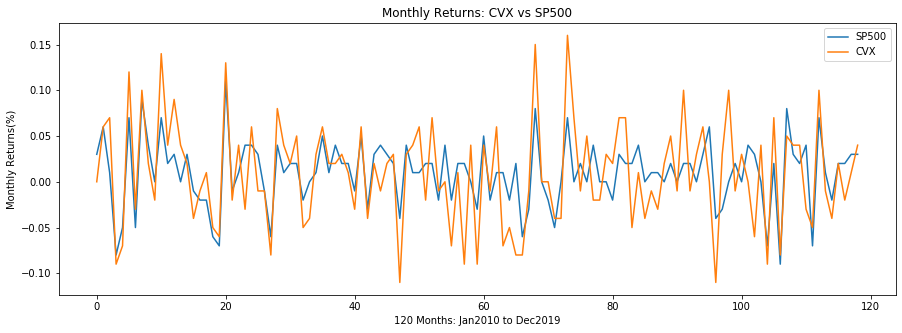

In [20]:
# Change the x_axis to be in Date format
rcParams['figure.figsize'] = 15, 5
x_axis = new_returns_df.index
y_axis = new_returns_df[['SP500', 'CVX']]
returns_plot = new_returns_df[["SP500","CVX"]].plot()
returns_plot
plt.title('Monthly Returns: CVX vs SP500')
plt.xlabel("120 Months: Jan2010 to Dec2019")
plt.ylabel("Monthly Returns(%)")
plt.savefig("Images/01_SP500-CVX_LinePlot_Date-Index.png")
plt.gcf()
plt.show()

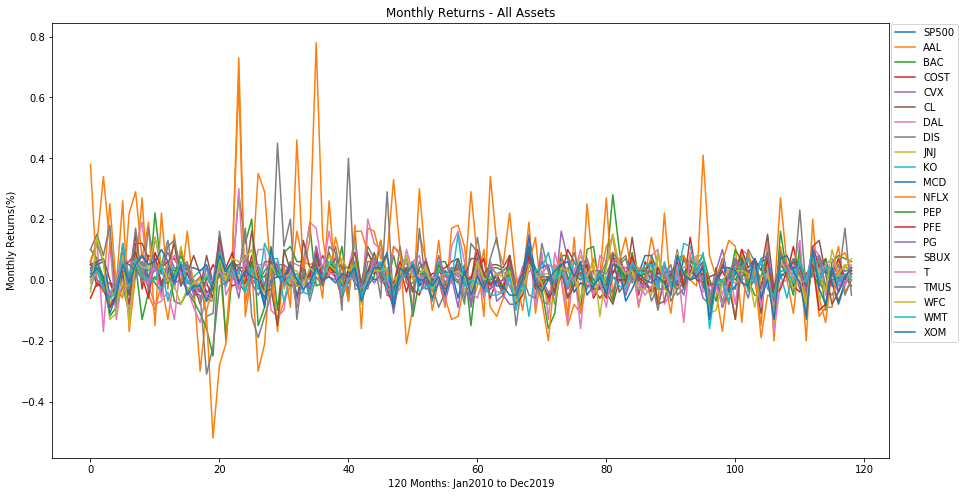

In [21]:
#Plot line plot of all returns to show monthly volatility and how they all swing on average between +-10% monthly 
rcParams['figure.figsize'] = 15, 8
all_returns_plot = new_returns_df[["SP500","AAL","BAC","COST","CVX","CL","DAL","DIS","JNJ","KO","MCD",
                               "NFLX","PEP","PFE","PG","SBUX","T","TMUS", "WFC","WMT","XOM"]].plot()
plt.title('Monthly Returns - All Assets')
all_returns_plot.legend(bbox_to_anchor=(1.001, 1), loc='upper left', borderaxespad=0.1)
plt.xlabel("120 Months: Jan2010 to Dec2019")
plt.ylabel("Monthly Returns(%)")
plt.savefig("Images/02_MonthReturns_AllAssets_Date-Index.png")
plt.gcf()
plt.show()

In [22]:
#Calculate the cummulative returns of the stocks over the 10 years period
sp500cumret = (sp500_returns + 1).cumprod()

aalcumret   = (aal_returns   + 1).cumprod()
baccumret   = (bac_returns   + 1).cumprod()
costcumret  = (cost_returns  + 1).cumprod()
cvxcumret   = (cvx_returns   + 1).cumprod()
clcumret    = (cl_returns    + 1).cumprod()

dalcumret   = (dal_returns   + 1).cumprod()
discumret   = (dis_returns   + 1).cumprod()
jnjcumret   = (jnj_returns   + 1).cumprod()
kocumret    = (ko_returns    + 1).cumprod()
mcdcumret   = (mcd_returns   + 1).cumprod()

nflxcumret  = (nflx_returns  + 1).cumprod()
pepcumret   = (pep_returns   + 1).cumprod()
pfecumret   = (pfe_returns   + 1).cumprod()
pgcumret    = (pg_returns    + 1).cumprod()
sbuxcumret  = (sbux_returns  + 1).cumprod()

tcumret     = (t_returns     + 1).cumprod()
tmuscumret  = (tmus_returns  + 1).cumprod()
wfccumret   = (wfc_returns   + 1).cumprod()
wmtcumret   = (wmt_returns   + 1).cumprod()
xomcumret   = (xom_returns   + 1).cumprod()

In [23]:
aalcumret

0           NaN
1      1.380000
2      1.380000
3      1.324800
4      1.656000
         ...   
115    5.087455
116    5.240079
117    5.816488
118    5.583828
119    5.583828
Name: AAL, Length: 120, dtype: float64

In [24]:
round(sp500cumret,2)

0       NaN
1      1.03
2      1.09
3      1.10
4      1.01
       ... 
115    2.66
116    2.72
117    2.77
118    2.85
119    2.94
Name: S&P500, Length: 120, dtype: float64

In [25]:
all_cumret_df = pd.DataFrame({"SP500": sp500cumret,"AAL": aalcumret,"BAC": baccumret,"COST": costcumret,"CVX": cvxcumret,
                              "CL": clcumret,"DAL": dalcumret,"DIS": discumret,"JNJ": jnjcumret,"KO": kocumret,
                              "MCD": mcdcumret, "NFLX": nflxcumret,"PEP": pepcumret,"PFE": pfecumret,"PG": pgcumret,
                              "SBUX": sbuxcumret, "T": tcumret, "TMUS": tmuscumret, "WFC": wfccumret, "WMT": wmtcumret, "XOM": xomcumret})
all_cumret_df.head()
len(all_cumret_df)

120

In [26]:
all_cumret_df.index += 1

In [27]:
len(all_cumret_df)

120

In [28]:
all_cumret_df

,SP500,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,NFLX,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.030000,1.380000,1.100000,1.060000,1.000000,1.050000,1.060000,1.060000,1.000000,0.970000,...,1.060000,1.050000,0.940000,1.040000,1.050000,0.990000,1.100000,0.960000,1.010000,1.010000
3,1.091800,1.380000,1.177000,1.038800,1.060000,1.081500,1.197800,1.187200,1.040000,1.008800,...,1.187200,1.113000,0.930600,1.040000,1.113000,1.029600,1.265000,1.094400,1.040300,1.050400
4,1.102718,1.324800,1.177000,1.028412,1.134200,1.070685,0.994174,1.258432,1.029600,0.998712,...,1.590848,1.101870,0.902682,1.019200,1.190910,1.039896,1.366200,1.160064,1.009091,1.060904
5,1.014501,1.656000,1.035760,1.018128,1.032122,1.006444,1.113475,1.145173,0.936936,0.958764,...,1.781750,1.057795,0.821441,1.009008,1.190910,0.987901,1.612116,1.009256,0.948546,0.944205
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,2.661996,5.087455,2.025500,6.384568,2.324138,2.665876,5.147584,5.178439,2.719418,3.149224,...,33.210098,3.128552,2.639903,2.661130,10.746593,2.370791,8.699294,2.022186,2.762055,1.500213
117,2.715236,5.240079,2.147030,6.256876,2.370621,2.639217,5.147584,4.919517,2.773806,3.117732,...,30.221189,3.128552,2.692701,2.740964,9.886866,2.536746,8.786287,2.224405,2.872537,1.560221
118,2.769540,5.816488,2.318793,6.444583,2.323209,2.454472,4.941681,4.919517,2.829282,3.148909,...,32.336673,3.159838,2.881190,2.740964,9.491391,2.587481,9.225601,2.268893,2.843811,1.497812
119,2.852627,5.583828,2.481108,6.509029,2.346441,2.429927,5.188765,5.755835,2.942453,3.085931,...,35.246973,3.128239,2.881190,2.713555,9.586305,2.535731,8.764321,2.382338,2.900688,1.512791


In [29]:
x_axis_cumret = []
for x in x_axis:
#     print(x)
#     if x == 'Feb-2010':
#         continue
#     else:    
    x_axis_cumret.append(x)
len(x_axis_cumret)

119

In [30]:
all_cumret_df2 = pd.DataFrame({"SP500": sp500cumret,"AAL": aalcumret,"BAC": baccumret,"COST": costcumret,"CVX": cvxcumret,
                              "CL": clcumret,"DAL": dalcumret,"DIS": discumret,"JNJ": jnjcumret,"KO": kocumret,
                              "MCD": mcdcumret, "NFLX": nflxcumret,"PEP": pepcumret,"PFE": pfecumret,"PG": pgcumret,
                              "SBUX": sbuxcumret, "T": tcumret, "TMUS": tmuscumret, "WFC": wfccumret, "WMT": wmtcumret, "XOM": xomcumret})
#all_cumret_df2['Date'] = combined_df['Date']
# Drop row by index
all_cumret_df2 = all_cumret_df2.drop([0])
all_cumret_df2.insert (0, "Date", combined_df['Date'])
all_cumret_df2 = all_cumret_df2.set_index('Date')
all_cumret_df2

,SP500,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,NFLX,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM
Date,,,,,,,,,,,,,,,,,,,,,
2010-02-01,1.030000,1.380000,1.100000,1.060000,1.000000,1.050000,1.060000,1.060000,1.000000,0.970000,...,1.060000,1.050000,0.940000,1.040000,1.050000,0.990000,1.100000,0.960000,1.010000,1.010000
2010-03-01,1.091800,1.380000,1.177000,1.038800,1.060000,1.081500,1.197800,1.187200,1.040000,1.008800,...,1.187200,1.113000,0.930600,1.040000,1.113000,1.029600,1.265000,1.094400,1.040300,1.050400
2010-04-01,1.102718,1.324800,1.177000,1.028412,1.134200,1.070685,0.994174,1.258432,1.029600,0.998712,...,1.590848,1.101870,0.902682,1.019200,1.190910,1.039896,1.366200,1.160064,1.009091,1.060904
2010-05-01,1.014501,1.656000,1.035760,1.018128,1.032122,1.006444,1.113475,1.145173,0.936936,0.958764,...,1.781750,1.057795,0.821441,1.009008,1.190910,0.987901,1.612116,1.009256,0.948546,0.944205
2010-06-01,0.963776,1.622880,0.942542,0.957040,0.959873,1.016508,0.968723,1.076463,0.955675,0.939588,...,1.746115,1.026061,0.780369,0.988828,1.119455,0.987901,1.467026,0.898238,0.910604,0.896994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,2.661996,5.087455,2.025500,6.384568,2.324138,2.665876,5.147584,5.178439,2.719418,3.149224,...,33.210098,3.128552,2.639903,2.661130,10.746593,2.370791,8.699294,2.022186,2.762055,1.500213
2019-09-01,2.715236,5.240079,2.147030,6.256876,2.370621,2.639217,5.147584,4.919517,2.773806,3.117732,...,30.221189,3.128552,2.692701,2.740964,9.886866,2.536746,8.786287,2.224405,2.872537,1.560221
2019-10-01,2.769540,5.816488,2.318793,6.444583,2.323209,2.454472,4.941681,4.919517,2.829282,3.148909,...,32.336673,3.159838,2.881190,2.740964,9.491391,2.587481,9.225601,2.268893,2.843811,1.497812


In [31]:
new_all_cumret_df2 = all_cumret_df2.reset_index()

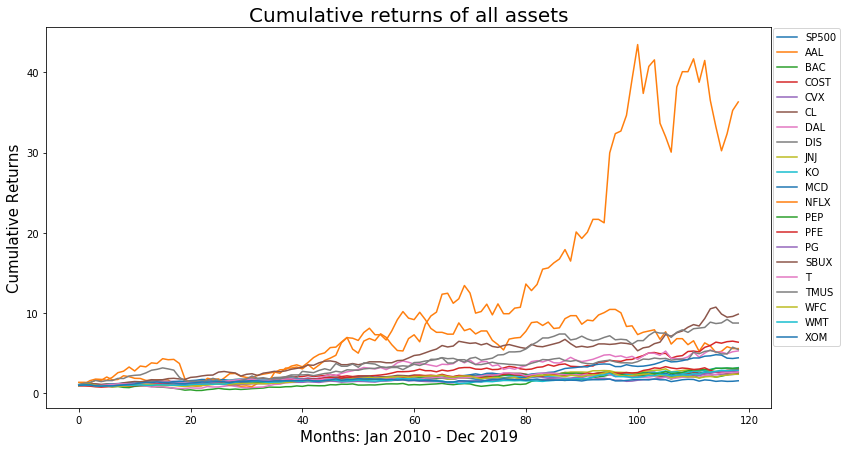

In [32]:
# print(x_axis_cumret)
rcParams['figure.figsize'] = 13, 7
new_all_cumret_plot2 = new_all_cumret_df2.plot()
plt.xlabel("Months: Jan 2010 - Dec 2019", size=15)
plt.ylabel("Cumulative Returns", size=15)
plt.title("Cumulative returns of all assets", size=20)
new_all_cumret_plot2.legend(bbox_to_anchor=(1.001, 1), loc='upper left', borderaxespad=0.1)
plt.savefig("Images/03_Cummulative_withLabels.png")
plt.show()

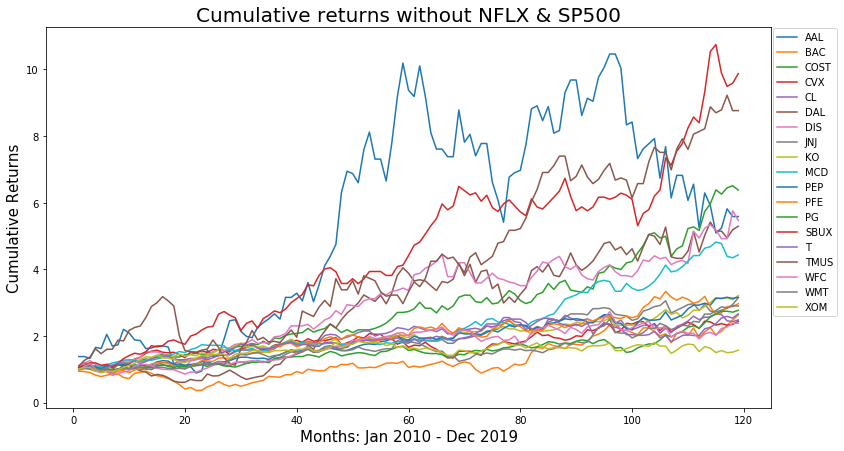

In [33]:
rcParams['figure.figsize'] = 13, 7
slct_cumret_df =pd.DataFrame({"AAL": aalcumret,"BAC": baccumret,"COST": costcumret,"CVX": cvxcumret,
                              "CL": clcumret,"DAL": dalcumret,"DIS": discumret,"JNJ": jnjcumret,"KO": kocumret,
                              "MCD": mcdcumret,"PEP": pepcumret,"PFE": pfecumret,"PG": pgcumret,
                              "SBUX": sbuxcumret, "T": tcumret, "TMUS": tmuscumret, "WFC": wfccumret, "WMT": wmtcumret, "XOM": xomcumret})
slct_cumret_plot = slct_cumret_df.plot()
plt.xlabel("Months: Jan 2010 - Dec 2019", size=15)
plt.ylabel("Cumulative Returns", size=15)
plt.title("Cumulative returns without NFLX & SP500", size=20)
slct_cumret_plot.legend(bbox_to_anchor=(1.001, 1), loc='upper left', borderaxespad=0.1)
plt.savefig("Images/CummPlot2.png")
plt.show()

In [34]:
# Check maximum for few assets' accumulative returns
Cumulative_monthly_returns_all = all_cumret_df2.describe()
max_average_all = all_cumret_df2.max()
Cumulative_monthly_returns_all.to_csv('Images/Cumulative_monthly_returns_all.csv')
Cumulative_monthly_returns_all

,SP500,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,NFLX,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,...,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1.831048,5.533728,1.265265,2.848326,1.801570,1.950916,2.862475,3.055377,1.902916,1.974005,...,13.004399,1.894883,1.980170,1.535335,4.588450,1.858493,4.314350,1.742496,1.629592,1.536565
std,0.530475,3.005319,0.576207,1.413375,0.375423,0.516310,1.580934,1.277745,0.672049,0.525036,...,12.963507,0.603469,0.661969,0.418356,2.380181,0.423830,2.357498,0.508463,0.487982,0.217291
min,0.963776,0.885952,0.361568,0.957040,0.959873,0.965683,0.608838,1.060000,0.917830,0.939588,...,0.854080,1.026061,0.780369,0.988432,1.050000,0.987901,1.100000,0.824582,0.910604,0.896994
25%,1.317126,2.228727,0.876333,1.703487,1.540602,1.559007,1.042693,1.771414,1.202939,1.665309,...,3.298816,1.321122,1.431418,1.170326,2.532566,1.629535,2.164667,1.220448,1.305378,1.455852
50%,1.850131,6.312118,1.100000,2.705349,1.809027,2.139097,3.249245,3.435910,1.874640,1.952560,...,6.979017,1.909900,2.022619,1.488522,4.412543,1.887524,3.720329,1.920325,1.557388,1.573721
75%,2.270515,7.871106,1.752271,3.440147,2.059388,2.360553,4.151698,4.067513,2.537760,2.321057,...,18.609285,2.392932,2.369900,1.746599,6.139398,2.199062,6.677241,2.153787,1.820336,1.694021
max,2.938205,10.462343,2.629975,6.509029,2.445432,2.665876,5.418510,5.755835,3.148425,3.209368,...,43.450163,3.159838,3.333790,2.767826,10.746593,2.662518,9.225601,2.727635,2.900688,1.836510


In [35]:
# Drop Netfix from the accumulative returns df
Cumulative_monthly_returns_dropNFLX = all_cumret_df2.drop('NFLX', axis=1)
Cumulative_monthly_returns_dropNFLX
cumret_noNFLX = Cumulative_monthly_returns_dropNFLX.describe()
# Cumulative_monthly_returns_dropNFLX = Cumulative_monthly_returns_dropNFLX.max()
#cumret_noNFLX.to_csv('Images/Cumulative_monthly_returns_dropNFLX.csv')
cumret_noNFLX

,SP500,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,MCD,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,1.831048,5.533728,1.265265,2.848326,1.801570,1.950916,2.862475,3.055377,1.902916,1.974005,2.341010,1.894883,1.980170,1.535335,4.588450,1.858493,4.314350,1.742496,1.629592,1.536565
std,0.530475,3.005319,0.576207,1.413375,0.375423,0.516310,1.580934,1.277745,0.672049,0.525036,1.022579,0.603469,0.661969,0.418356,2.380181,0.423830,2.357498,0.508463,0.487982,0.217291
min,0.963776,0.885952,0.361568,0.957040,0.959873,0.965683,0.608838,1.060000,0.917830,0.939588,1.020000,1.026061,0.780369,0.988432,1.050000,0.987901,1.100000,0.824582,0.910604,0.896994
25%,1.317126,2.228727,0.876333,1.703487,1.540602,1.559007,1.042693,1.771414,1.202939,1.665309,1.670602,1.321122,1.431418,1.170326,2.532566,1.629535,2.164667,1.220448,1.305378,1.455852
50%,1.850131,6.312118,1.100000,2.705349,1.809027,2.139097,3.249245,3.435910,1.874640,1.952560,1.862364,1.909900,2.022619,1.488522,4.412543,1.887524,3.720329,1.920325,1.557388,1.573721
75%,2.270515,7.871106,1.752271,3.440147,2.059388,2.360553,4.151698,4.067513,2.537760,2.321057,3.200593,2.392932,2.369900,1.746599,6.139398,2.199062,6.677241,2.153787,1.820336,1.694021
max,2.938205,10.462343,2.629975,6.509029,2.445432,2.665876,5.418510,5.755835,3.148425,3.209368,4.819550,3.159838,3.333790,2.767826,10.746593,2.662518,9.225601,2.727635,2.900688,1.836510


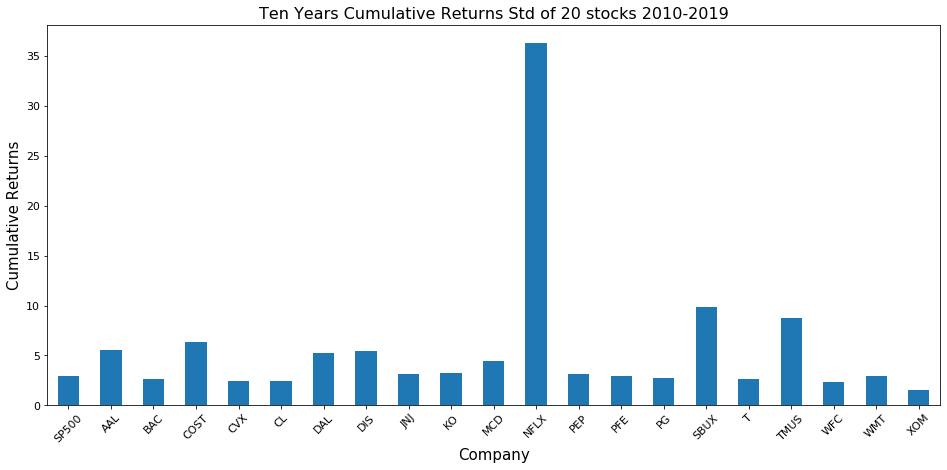

In [36]:
rcParams['figure.figsize'] = 16, 7
max_average_all2 = all_cumret_df2.iloc[-1]
max_average_all2.plot(kind='bar')
max_average_all_Bar = max_average_all2.plot(kind="bar", rot = 45, fontsize=11)
max_average_all_Bar.set_xlabel('Company', size=15)
max_average_all_Bar.set_ylabel('Cumulative Returns', size=15)
max_average_all_Bar.set_title('Ten Years Cumulative Returns Std of 20 stocks 2010-2019', size=16)
plt.savefig("Images/05b_CumReturns_All_BarChart.png")
plt.show()

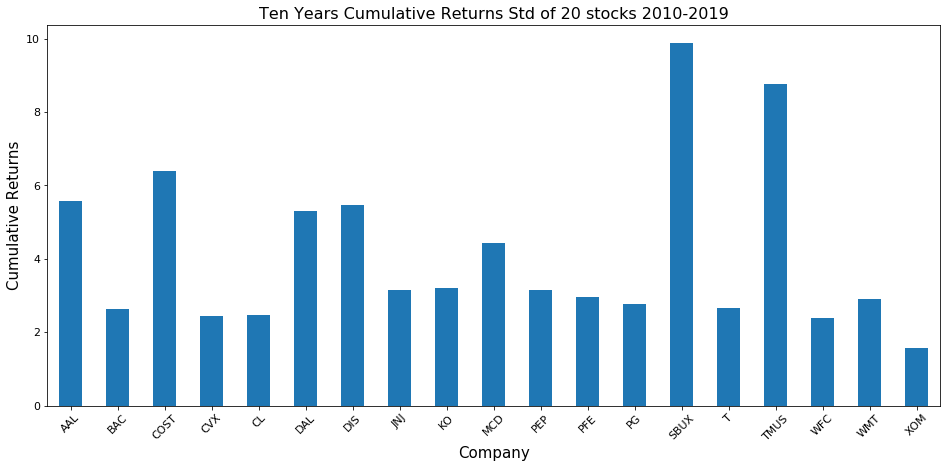

In [37]:
rcParams['figure.figsize'] = 16, 7
max_average_slct = slct_cumret_df.iloc[-1]
max_average_slct.plot(kind='bar')
max_average_slct_Bar = max_average_slct.plot(kind="bar", rot = 45, fontsize=11)
max_average_slct_Bar.set_xlabel('Company', size=15)
max_average_slct_Bar.set_ylabel('Cumulative Returns', size=15)
max_average_slct_Bar.set_title('Ten Years Cumulative Returns Std of 20 stocks 2010-2019', size=16)
plt.savefig("Images/CummBar.png")
plt.show()

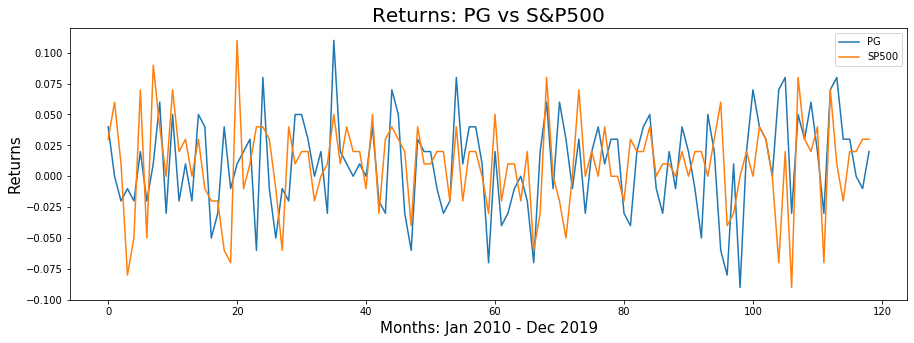

In [38]:
# Sample line of returns between PG vs S&P500
rcParams['figure.figsize'] = 15, 5
returns_plot2a = new_returns_df[["PG","SP500"]].plot()
plt.xlabel("Months: Jan 2010 - Dec 2019", size=15)
plt.ylabel("Returns", size=15)
plt.title('Returns: PG vs S&P500', size=20)
plt.savefig("Images/03a_PG-SP500_Returns.png")
plt.show()

In [39]:
# # returns_plot2a.legend(loc='best', borderaxespad=0.1, fontsize='x-large')
# fig = plt.figure()
# ax1 = fig.add_axes([0.1,0.1,0.8,0.8])

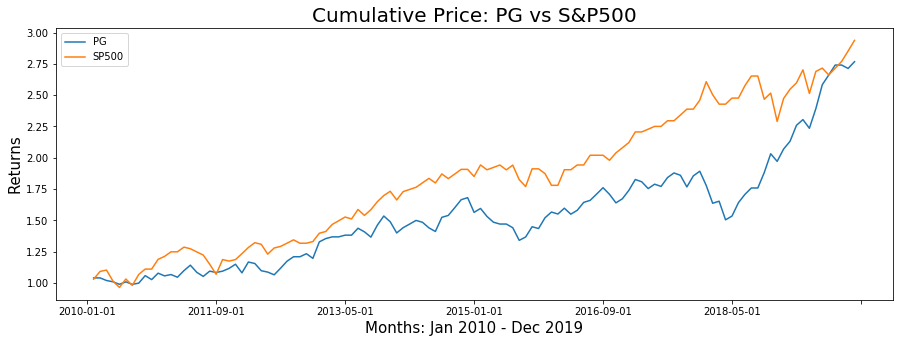

In [40]:
cumret_pg_vs_sp500_2 = pd.DataFrame({"PG": pgcumret, "SP500": sp500cumret})
cumret_pg_vs_sp500_2.insert (0, "Date", combined_df['Date'])
cumret_pg_vs_sp500_2 = cumret_pg_vs_sp500_2.set_index('Date')
cumret_pg_vs_sp500_plot = cumret_pg_vs_sp500_2.plot()
# ax1.plot(pgcumret)
# ax1.plot(sp500cumret)
plt.xlabel("Months: Jan 2010 - Dec 2019", size=15)
plt.ylabel("Returns", size=15)
plt.title('Cumulative Price: PG vs S&P500', size=20)
plt.savefig("Images/03b_PG-SP500_Cummulative.png")
plt.show()

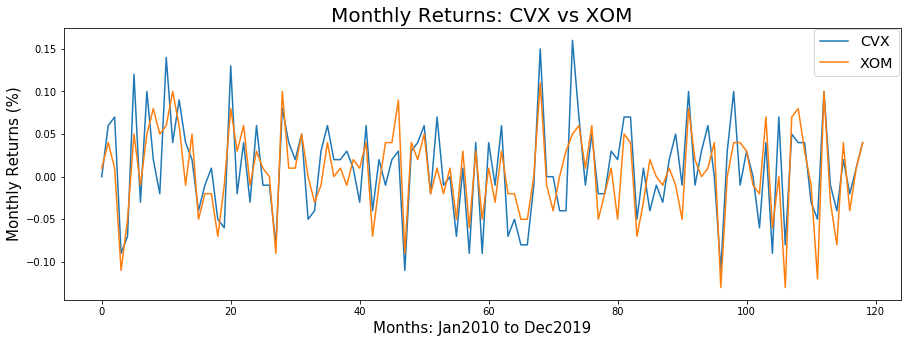

In [41]:
# Sample line with CVX and XOM
rcParams['figure.figsize'] = 15, 5
returns_plot2 = new_returns_df[["CVX","XOM"]].plot()
returns_plot2.legend(loc='best', borderaxespad=0.1, fontsize='x-large')
plt.xlabel("Months: Jan2010 to Dec2019", size=15)
plt.ylabel("Monthly Returns (%)", size=15)
plt.title("Monthly Returns: CVX vs XOM", size=20)
plt.savefig("Images/03b_CVX-XOM_MonthlyReturn.png")
plt.show()

In [42]:
#BarChart = returns_df[["CVX","XOM","CL","PG","PEP"]]

In [43]:
#Bar = BarChart.plot(kind="bar",figsize=(10,5), title="Retunrs 5 stocks",
#                                        color="green", fontsize=12 )

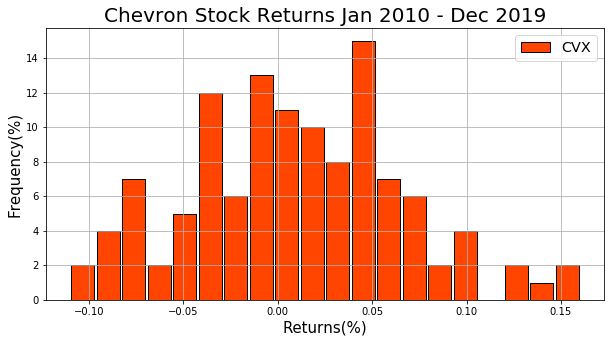

In [44]:
# Show the fluctuation in returns for one asset

rcParams['figure.figsize'] = 10, 5
returns_df["CVX"].plot.hist(grid=True, bins=20, rwidth=0.9, color='orangered', edgecolor='black')
plt.title("Chevron Stock Returns Jan 2010 - Dec 2019", size=20)
plt.legend(loc='upper right', fontsize='x-large')
plt.ylabel("Frequency(%)", size=15)
plt.xlabel("Returns(%)", size=15)
plt.savefig("Images/04_CVX_Returns.png")
plt.show()

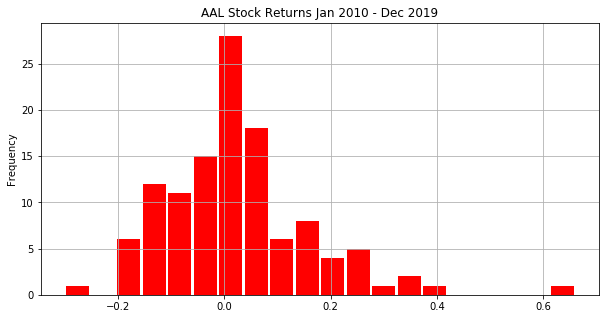

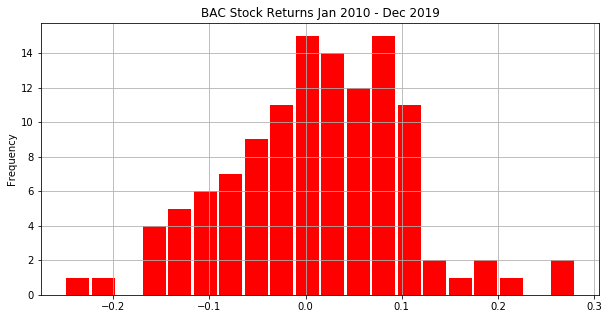

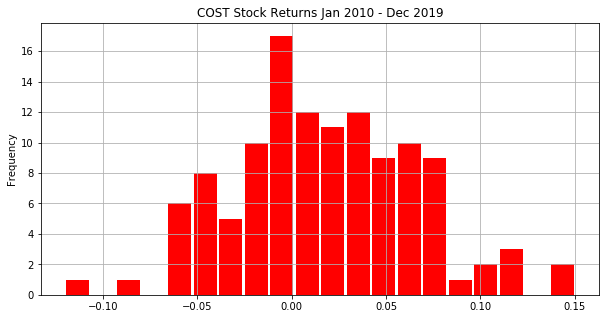

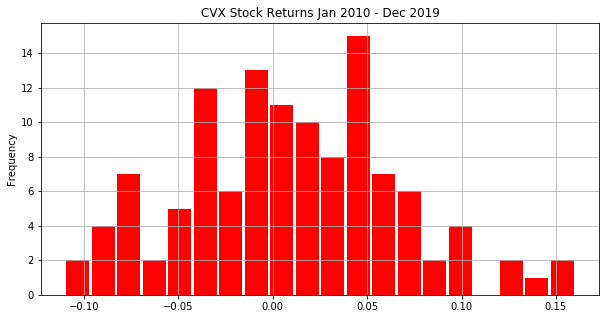

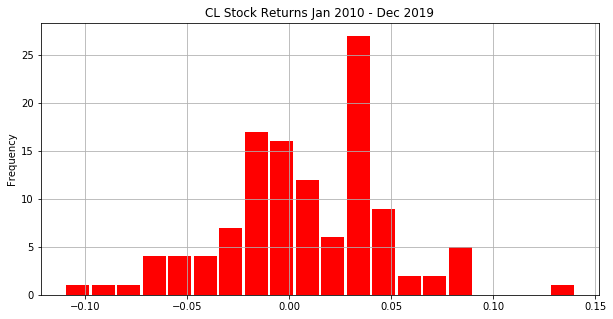

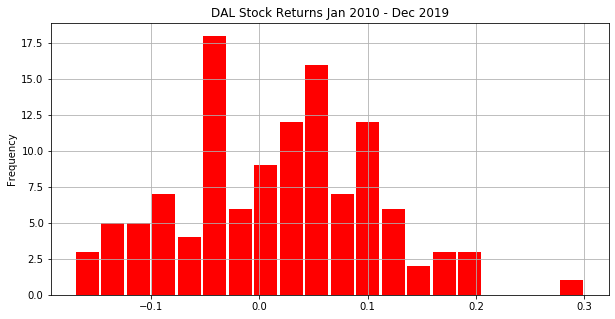

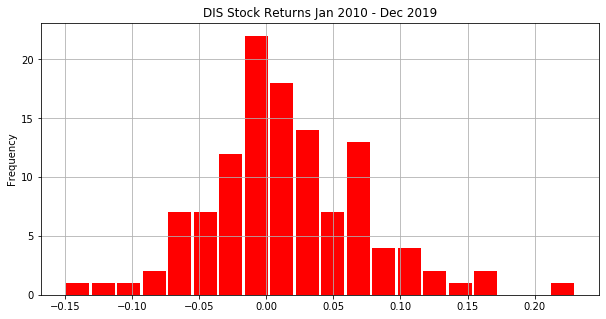

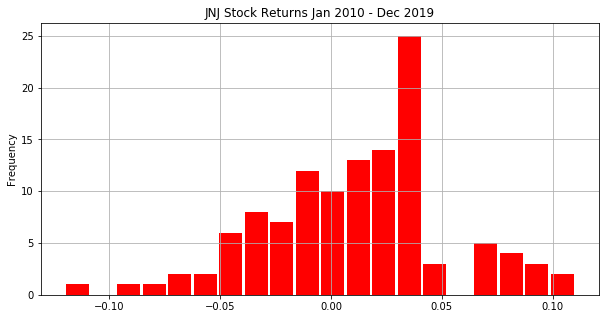

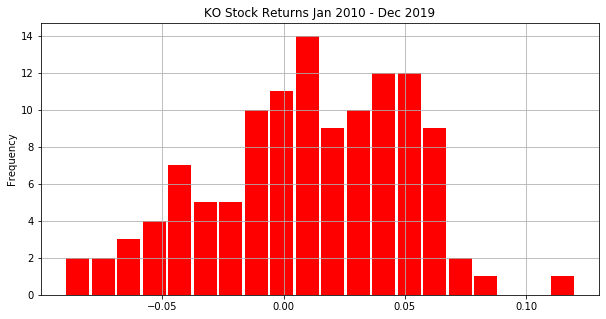

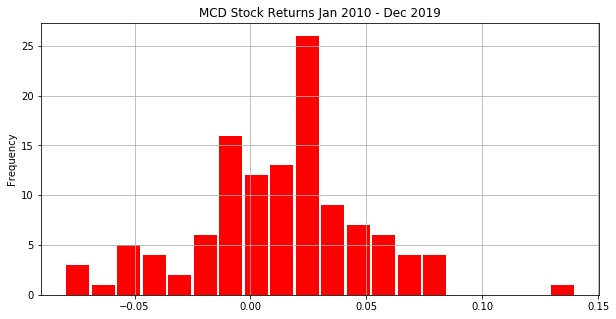

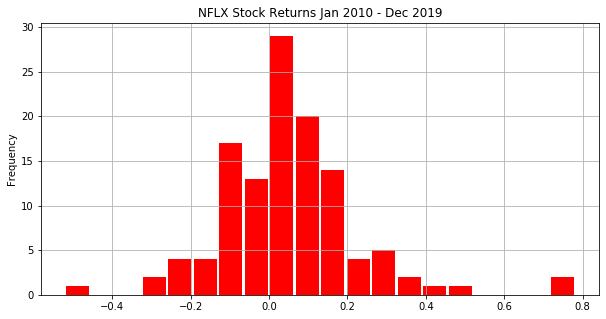

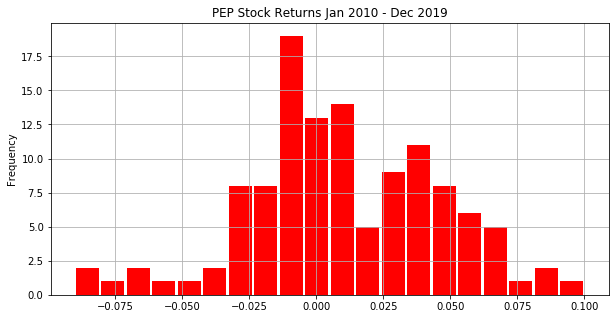

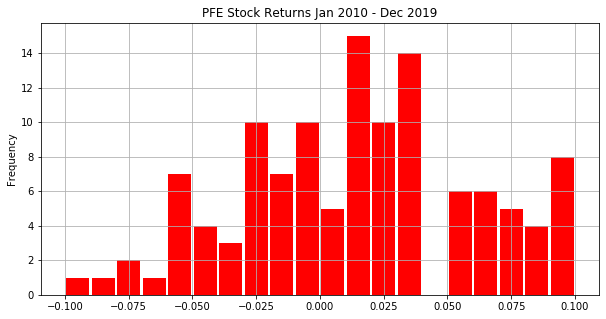

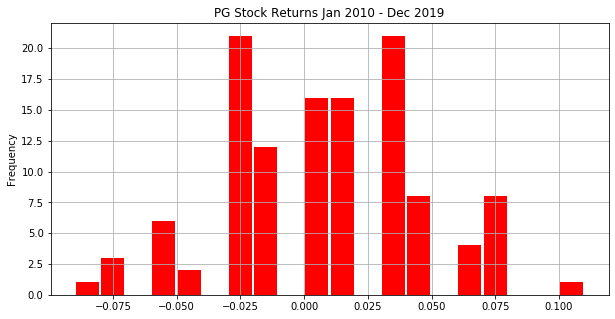

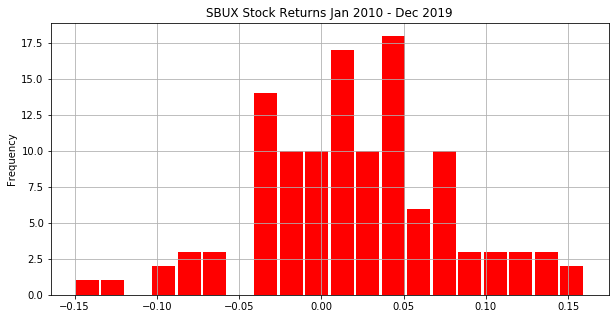

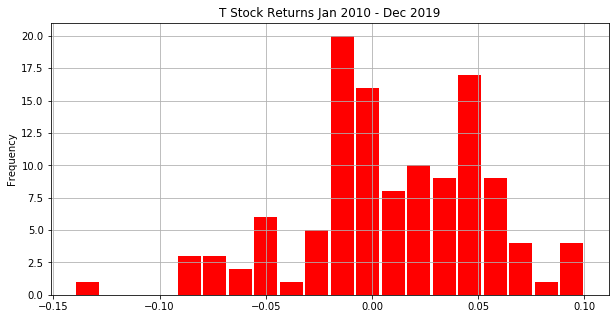

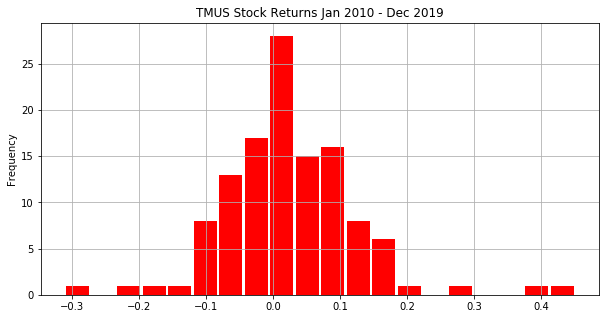

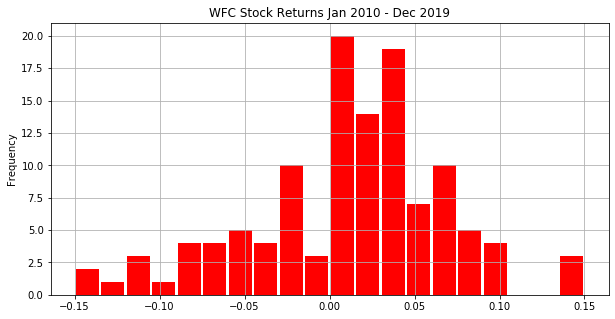

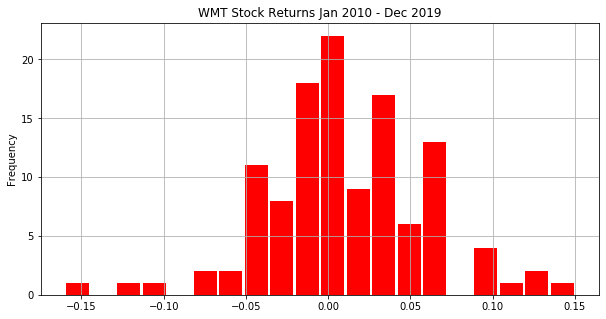

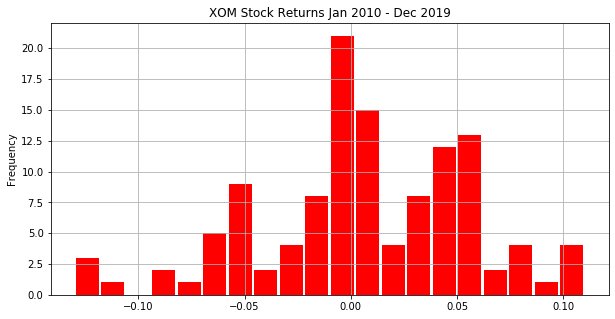

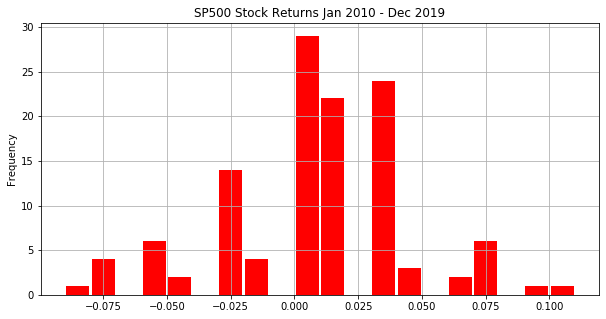

In [45]:
# Make plots for multiple data sets using iterrow method
#Show the fluctuation in returns for one asset
combined_list = []
ticker_list = combined_df.index.to_list()
columns_names_list = []
combined_dict = {}

for i in combined_df.columns: 
    columns_names_list.append(i)

# date_indexed_df
returns_df.reset_index()
returns_df
# date_indexed_df = returns_df.set_index('Date')
# date_indexed_df

for column in returns_df:
    columnSeriesObj = returns_df[column]
    columnSeriesObj.plot.hist(grid=True, bins=20, rwidth=0.9, color="red")
    plt.title(f"{column} Stock Returns Jan 2010 - Dec 2019")
    plt.savefig(f"Images/04_{column}_Returns.png")
    plt.show()

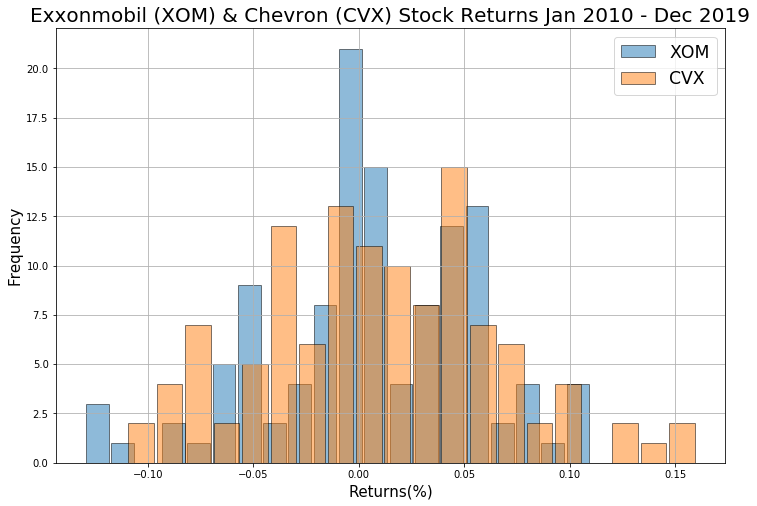

In [46]:
rcParams['figure.figsize'] = 12, 8
returns_df["XOM"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
returns_df["CVX"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
plt.title("Exxonmobil (XOM) & Chevron (CVX) Stock Returns Jan 2010 - Dec 2019", size=20)
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlabel("Returns(%)", size=15)
plt.ylabel("Frequency", size=15)
plt.savefig("Images/04_XOM-CVX_Returns.png")
plt.show()

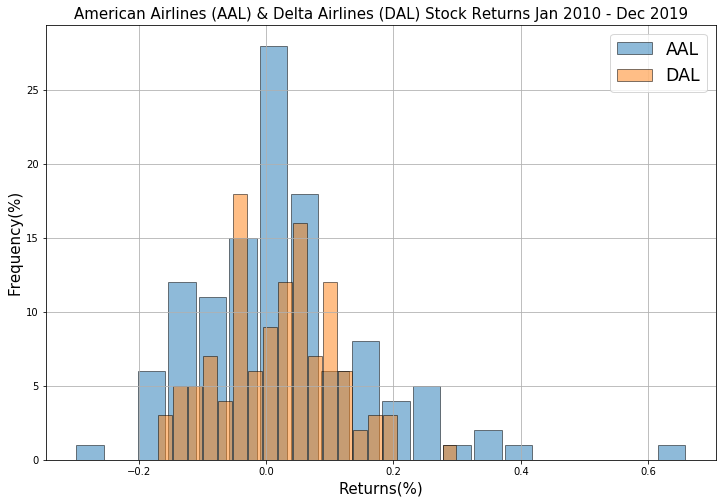

In [47]:
rcParams['figure.figsize'] = 12, 8
returns_df["AAL"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
returns_df["DAL"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
plt.title("American Airlines (AAL) & Delta Airlines (DAL) Stock Returns Jan 2010 - Dec 2019", size=15)
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlabel("Returns(%)", size=15)
plt.ylabel("Frequency(%)", size=15)
plt.savefig("Images/04_AAL-DAL_Returns_Histogram.png")
plt.show()

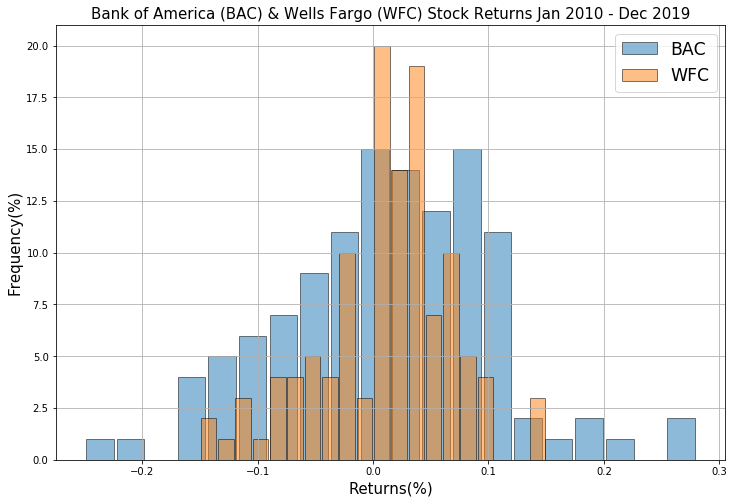

In [48]:
rcParams['figure.figsize'] = 12, 8
returns_df["BAC"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
returns_df["WFC"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
plt.title("Bank of America (BAC) & Wells Fargo (WFC) Stock Returns Jan 2010 - Dec 2019", size=15)
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlabel("Returns(%)", size=15)
plt.ylabel("Frequency(%)", size=15)
plt.savefig("Images/04_BAC-WFC_Returns_Histogram.png")
plt.show()

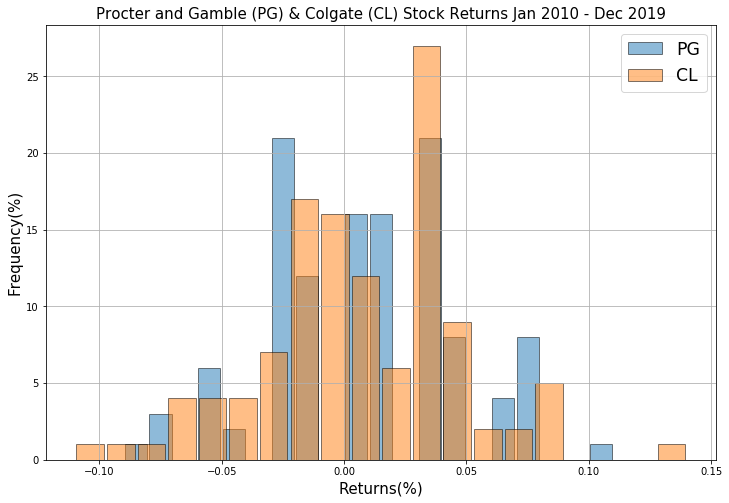

In [49]:
rcParams['figure.figsize'] = 12, 8
returns_df["PG"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
returns_df["CL"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
plt.title("Procter and Gamble (PG) & Colgate (CL) Stock Returns Jan 2010 - Dec 2019", size=15)
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlabel("Returns(%)", size=15)
plt.ylabel("Frequency(%)", size=15)
plt.savefig("Images/04_PG-CL_Returns_Histogram.png")
plt.show()

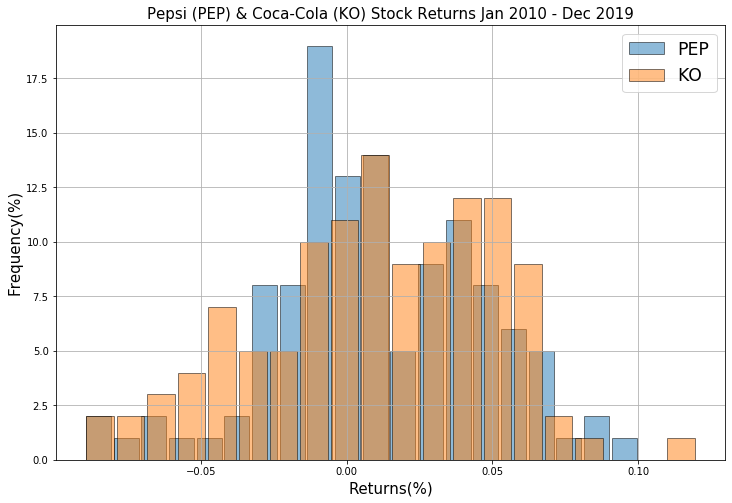

<Figure size 864x576 with 0 Axes>

In [50]:
rcParams['figure.figsize'] = 12, 8
returns_df["PEP"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
returns_df["KO"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
plt.title("Pepsi (PEP) & Coca-Cola (KO) Stock Returns Jan 2010 - Dec 2019", size=15)
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlabel("Returns(%)", size=15)
plt.ylabel("Frequency(%)", size=15)
plt.show()
plt.savefig("Images/04_PEP-KO_Returns_Histogram.png")

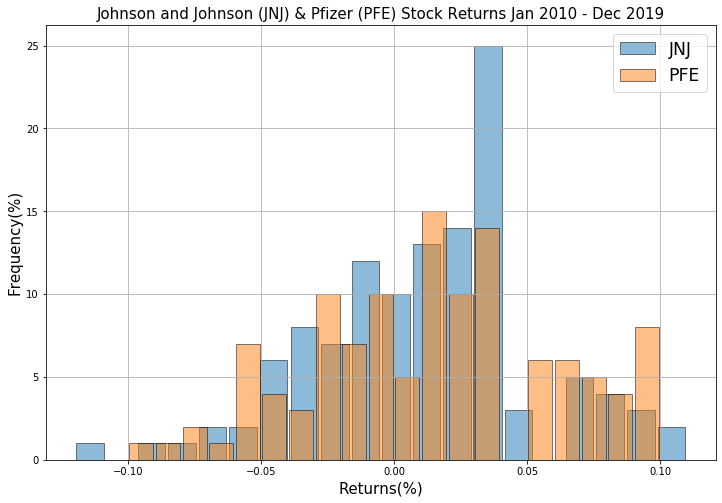

In [51]:
rcParams['figure.figsize'] = 12, 8
returns_df["JNJ"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
returns_df["PFE"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
plt.title("Johnson and Johnson (JNJ) & Pfizer (PFE) Stock Returns Jan 2010 - Dec 2019", size=15)
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlabel("Returns(%)", size=15)
plt.ylabel("Frequency(%)", size=15)
plt.savefig("Images/04_JNJ-PPE_Returns_Histogram.png")
plt.show()

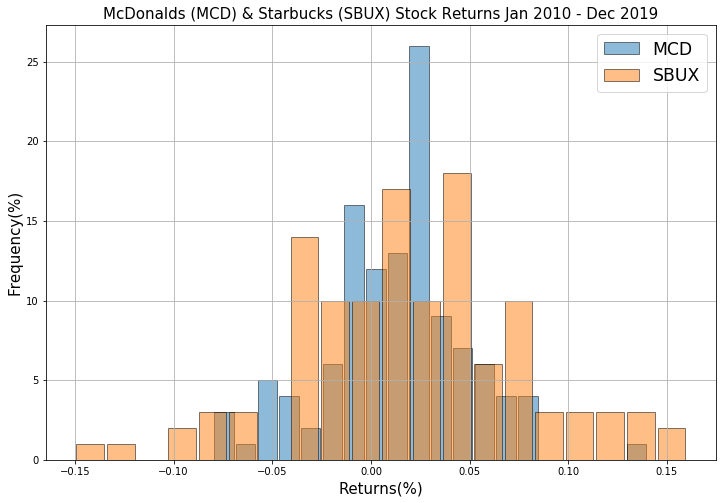

In [52]:
rcParams['figure.figsize'] = 12, 8
returns_df["MCD"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
returns_df["SBUX"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
plt.title("McDonalds (MCD) & Starbucks (SBUX) Stock Returns Jan 2010 - Dec 2019", size=15)
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlabel("Returns(%)", size=15)
plt.ylabel("Frequency(%)", size=15)
plt.savefig("Images/04_MCD-SBUX_Returns_Histogram.png")
plt.show()

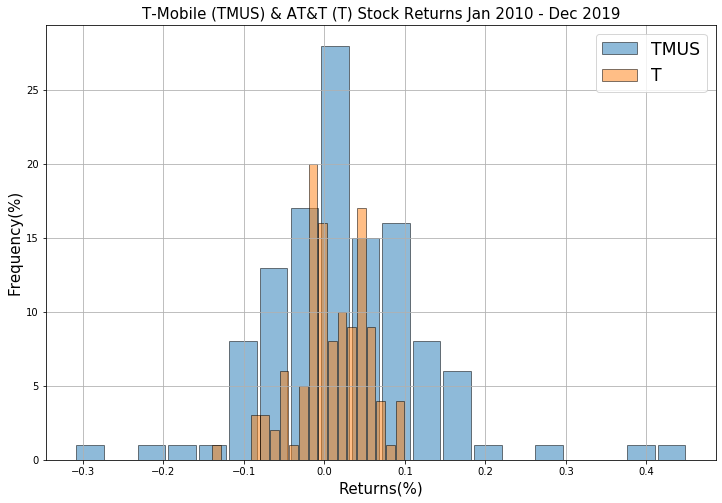

In [53]:
rcParams['figure.figsize'] = 12, 8
returns_df["TMUS"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
returns_df["T"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
plt.title("T-Mobile (TMUS) & AT&T (T) Stock Returns Jan 2010 - Dec 2019", size=15)
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlabel("Returns(%)", size=15)
plt.ylabel("Frequency(%)", size=15)
plt.savefig("Images/04_TMUS-T_Returns_Histogram.png")
plt.show()

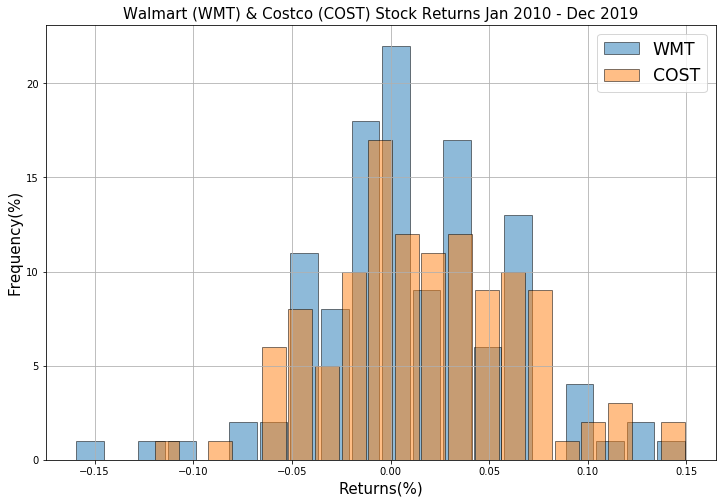

In [54]:
rcParams['figure.figsize'] = 12, 8
returns_df["WMT"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
returns_df["COST"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
plt.title("Walmart (WMT) & Costco (COST) Stock Returns Jan 2010 - Dec 2019", size=15)
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlabel("Returns(%)", size=15)
plt.ylabel("Frequency(%)", size=15)
plt.savefig("Images/04_WMT-COST_Returns_Histogram.png")
plt.show()

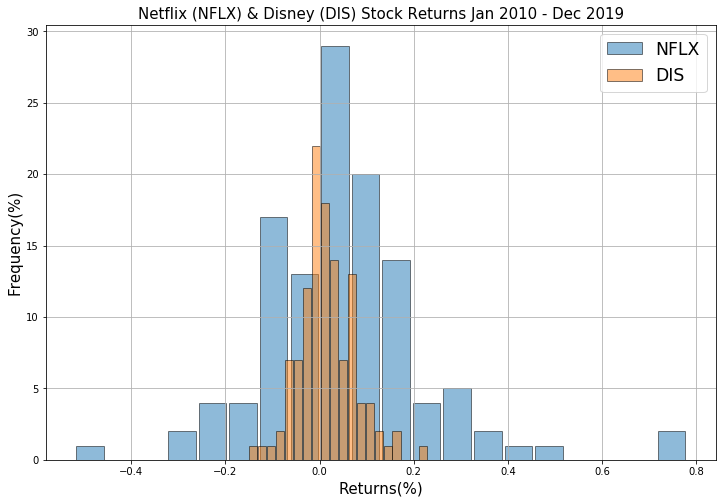

In [55]:
rcParams['figure.figsize'] = 12, 8
returns_df["NFLX"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
returns_df["DIS"].plot.hist(grid=True, bins=20, rwidth=.9, alpha=0.5, edgecolor='black')
plt.title("Netflix (NFLX) & Disney (DIS) Stock Returns Jan 2010 - Dec 2019", size=15)
plt.legend(loc='upper right', fontsize='xx-large')
plt.xlabel("Returns(%)", size=15)
plt.ylabel("Frequency(%)", size=15)
plt.savefig("Images/04_NFLX-DIS_Returns_Histogram.png")
plt.show()

In [56]:
# Standard deviations of returns
sp500std = round(returns_df["SP500"].std(),3)

aalstd   = round(returns_df["AAL"].std(),3)
bacstd   = round(returns_df["BAC"].std(),3)
coststd  = round(returns_df["COST"].std(),3)
cvxstd   = round(returns_df["CVX"].std(),3)
clstd    = round(returns_df["CL"].std(),3)

dalstd   = round(returns_df["DAL"].std(),3)
disstd   = round(returns_df["DIS"].std(),3)
jnjstd   = round(returns_df["JNJ"].std(),3)
kostd    = round(returns_df["KO"].std(),3)
mcdstd   = round(returns_df["MCD"].std(),3)

nflxstd  = round(returns_df["NFLX"].std(),3)
pepstd   = round(returns_df["PEP"].std(),3)
pfestd   = round(returns_df["PFE"].std(),3)
pgstd    = round(returns_df["PG"].std(),3)
sbuxstd  = round(returns_df["SBUX"].std(),3)

tstd     = round(returns_df["T"].std(),3)
wfcstd   = round(returns_df["WFC"].std(),3)
wmtstd   = round(returns_df["WMT"].std(),3)
xomstd   = round(returns_df["XOM"].std(),3)
tmusstd   = round(returns_df["TMUS"].std(),3)

In [57]:
# Standard deviation of prices 
sp500stdP = round(combined_df["S&P500"].std(),3)

aalstdP   = round(combined_df["AAL"].std(),3)
bacstdP   = round(combined_df["BAC"].std(),3)
coststdP  = round(combined_df["COST"].std(),3)
cvxstdP   = round(combined_df["CVX"].std(),3)
clstdP    = round(combined_df["CL"].std(),3)

dalstdP   = round(combined_df["DAL"].std(),3)
disstdP   = round(combined_df["DIS"].std(),3)
jnjstdP   = round(combined_df["JNJ"].std(),3)
kostdP    = round(combined_df["KO"].std(),3)
mcdstdP   = round(combined_df["MCD"].std(),3)

nflxstdP  = round(combined_df["NFLX"].std(),3)
pepstdP   = round(combined_df["PEP"].std(),3)
pfestdP   = round(combined_df["PFE"].std(),3)
pgstdP    = round(combined_df["PG"].std(),3)
sbuxstdP  = round(combined_df["SBUX"].std(),3)

tstdP     = round(combined_df["T"].std(),3)
wfcstdP   = round(combined_df["WFC"].std(),3)
wmtstdP   = round(combined_df["WMT"].std(),3)
xomstdP   = round(combined_df["XOM"].std(),3)
tmusstdP   = round(combined_df["TMUS"].std(),3)

In [58]:
# std of returns into dataframe
stddevR = pd.DataFrame({"SP500": sp500std, "AAL": aalstd, "BAC": bacstd, "COST": coststd, "CVX": cvxstd,
             "CL": clstd, "DAL": dalstd, "DIS": disstd, "JNJ": jnjstd, "KO": kostd,
             "MCD": mcdstd, "NFLX": nflxstd, "PEP": pepstd, "PFE": pfestd, "PG": pgstd,
             "SBUX": sbuxstd, "T": tstd, "TMUS": tmusstd, "WFC": wfcstd, "WMT": wmtstd, "XOM": xomstd}, index=[0])
stddevR

,SP500,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,NFLX,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM
0,0.036,0.137,0.093,0.048,0.056,0.041,0.09,0.059,0.041,0.039,...,0.173,0.038,0.047,0.039,0.057,0.044,0.101,0.058,0.049,0.049


In [59]:
# Pass on std of returns into series for bar chart
data_stdR = {"SP500": sp500std, "AAL": aalstd, "BAC": bacstd, "COST": coststd, "CVX": cvxstd,
             "CL": clstd, "DAL": dalstd, "DIS": disstd, "JNJ": jnjstd, "KO": kostd,
             "MCD": mcdstd, "NFLX": nflxstd, "PEP": pepstd, "PFE": pfestd, "PG": pgstd,
             "SBUX": sbuxstd, "T": tstd, "TMUS": tmusstd, "WFC": wfcstd, "WMT": wmtstd, "XOM": xomstd}
Ret_Std = pd.Series(data_stdR)
Ret_Std

SP500    0.036
AAL      0.137
BAC      0.093
COST     0.048
CVX      0.056
CL       0.041
DAL      0.090
DIS      0.059
JNJ      0.041
KO       0.039
MCD      0.037
NFLX     0.173
PEP      0.038
PFE      0.047
PG       0.039
SBUX     0.057
T        0.044
TMUS     0.101
WFC      0.058
WMT      0.049
XOM      0.049
dtype: float64

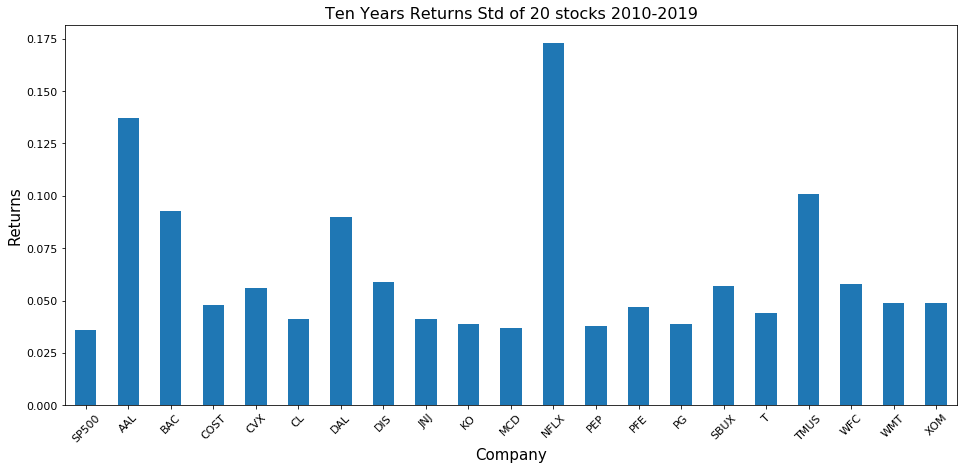

In [60]:
rcParams['figure.figsize'] = 16, 7
RetStd_Bar = Ret_Std.plot(kind="bar", rot = 45, fontsize=11)
RetStd_Bar.set_xlabel('Company', size=15)
RetStd_Bar.set_ylabel('Returns', size=15)
RetStd_Bar.set_title('Ten Years Returns Std of 20 stocks 2010-2019', size=16)
plt.savefig("Images/05_Returns_All_BarChart.png")
plt.show()

In [61]:
#The next cells are Return Std of paired up stocks with their bar charts
#I chose the pairs due the similarities that they have in the real world 
#eg Airlines with oil companies cause Oil companies provide fuel for airlines etc.

In [62]:
# Pass on std of returns into series for bar chart
data_stdR1 = {"AAL": aalstd, "DAL": dalstd, "CVX": cvxstd, "XOM": xomstd}
Ret_Std1 = pd.Series(data_stdR1)
Ret_Std1

AAL    0.137
DAL    0.090
CVX    0.056
XOM    0.049
dtype: float64

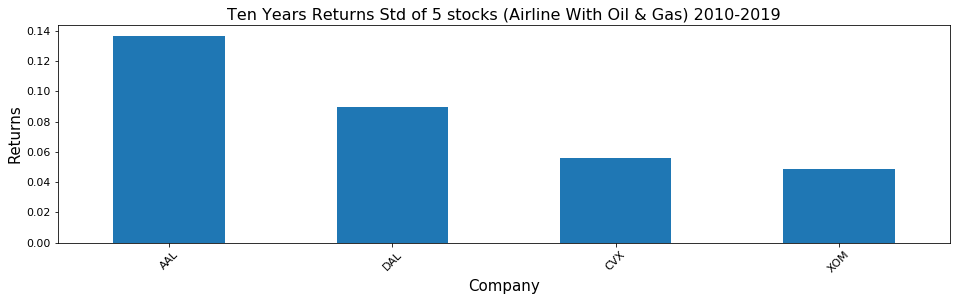

In [63]:
rcParams['figure.figsize'] = 16, 4
RetStd1_Bar = Ret_Std1.plot(kind="bar", rot = 45, fontsize=11)
RetStd1_Bar.set_xlabel('Company', size=15)
RetStd1_Bar.set_ylabel('Returns', size=15)
RetStd1_Bar.set_title('Ten Years Returns Std of 5 stocks (Airline With Oil & Gas) 2010-2019', size=16)
plt.savefig("Images/05_Returns_AAL-DAL-CVX-XOM_BarChart.png")
plt.show()

In [64]:
data_stdR2 = {"BAC": bacstd, "WFC": wfcstd, "WMT": wmtstd, "COST": coststd}
Ret_Std2 = pd.Series(data_stdR2)
Ret_Std2

BAC     0.093
WFC     0.058
WMT     0.049
COST    0.048
dtype: float64

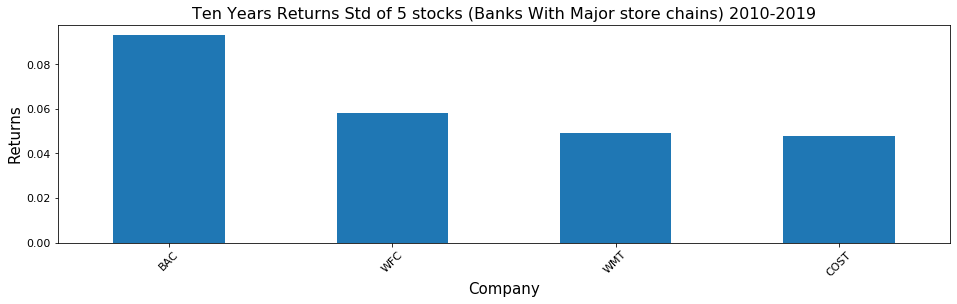

In [65]:
rcParams['figure.figsize'] = 16, 4
RetStd2_Bar = Ret_Std2.plot(kind="bar", rot = 45, fontsize=11)
RetStd2_Bar.set_xlabel('Company', size=15)
RetStd2_Bar.set_ylabel('Returns', size=15)
RetStd2_Bar.set_title('Ten Years Returns Std of 5 stocks (Banks With Major store chains) 2010-2019', size=16)
plt.savefig("Images/05_Returns_BAC-WFC-WMT-COST_BarChart.png")
plt.show()

In [66]:
data_stdR3 = {"PG": pgstd, "CL": clstd, "JNJ": jnjstd, "PFE": pfestd}
Ret_Std3 = pd.Series(data_stdR3)
Ret_Std3

PG     0.039
CL     0.041
JNJ    0.041
PFE    0.047
dtype: float64

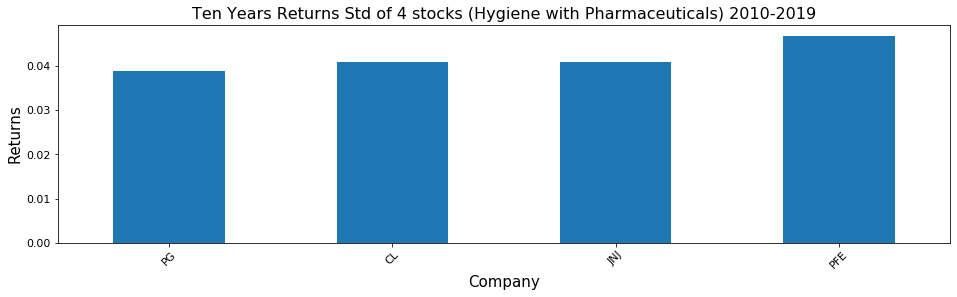

In [67]:
rcParams['figure.figsize'] = 16, 4
RetStd3_Bar = Ret_Std3.plot(kind="bar", rot = 45, fontsize=11)
RetStd3_Bar.set_xlabel('Company', size=15)
RetStd3_Bar.set_ylabel('Returns', size=15)
RetStd3_Bar.set_title('Ten Years Returns Std of 4 stocks (Hygiene with Pharmaceuticals) 2010-2019', size=16)
plt.savefig("Images/05_Returns_PG-CL-JNJ-PFE_BarChart.png")
plt.show()

In [68]:
data_stdR4 = {"PEP": pepstd, "KO": kostd, "MCD": mcdstd, "SBUX": sbuxstd}
Ret_Std4 = pd.Series(data_stdR4)
Ret_Std4

PEP     0.038
KO      0.039
MCD     0.037
SBUX    0.057
dtype: float64

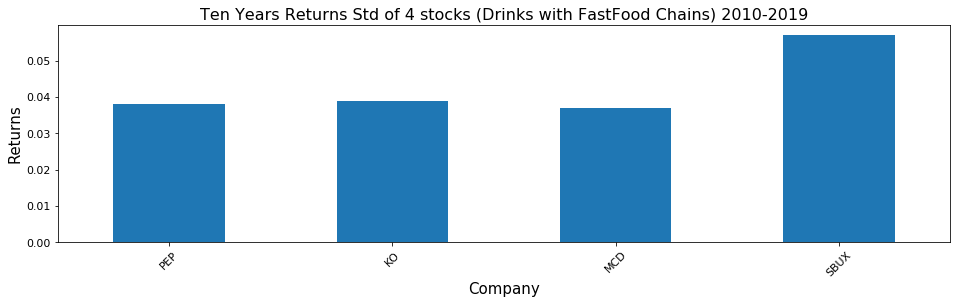

In [69]:
rcParams['figure.figsize'] = 16, 4
RetStd4_Bar = Ret_Std4.plot(kind="bar", rot = 45, fontsize=11)
RetStd4_Bar.set_xlabel('Company', size=15)
RetStd4_Bar.set_ylabel('Returns', size=15)
RetStd4_Bar.set_title('Ten Years Returns Std of 4 stocks (Drinks with FastFood Chains) 2010-2019', size=16)
plt.savefig("Images/05_Returns_PEP-KO-MCD-SBUX_BarChart.png")
plt.show()

In [70]:
data_stdR5 = {"T": tstd, "TMUS": tmusstd, "NFLX": nflxstd, "DIS": disstd}
Ret_Std5 = pd.Series(data_stdR5)
Ret_Std5

T       0.044
TMUS    0.101
NFLX    0.173
DIS     0.059
dtype: float64

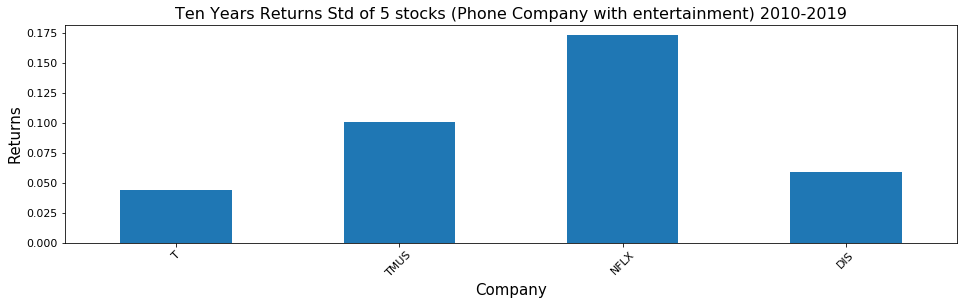

In [71]:
rcParams['figure.figsize'] = 16, 4
RetStd5_Bar = Ret_Std5.plot(kind="bar", rot = 45, fontsize=11)
RetStd5_Bar.set_xlabel('Company', size=15)
RetStd5_Bar.set_ylabel('Returns', size=15)
RetStd5_Bar.set_title('Ten Years Returns Std of 5 stocks (Phone Company with entertainment) 2010-2019', size=16)
plt.savefig("Images/05_Returns_T-TMUX-NFLX-DIS_BarChart.png")
plt.show()

In [72]:
# Std of prices 
stddevP = pd.DataFrame({"SP500": sp500stdP, "AAL": aalstdP, "BAC": bacstdP, "COST": coststdP, "CSV": cvxstdP,
                        "CL": clstdP, "DAL": dalstdP, "DIS": disstdP, "JNJ": jnjstdP, "KO": kostdP,
                        "MCD": mcdstdP, "NFLX": nflxstdP, "PEP": pepstdP, "PFE": pfestdP, "PG": pgstdP,
                        "SBUX": sbuxstdP, "T": tstdP, "TMUS": tmusstdP, "WFC": wfcstdP, "WMT": wmtstdP, "XOM": xomstdP}, index=[0])
stddevP

,SP500,AAL,BAC,COST,CSV,CL,DAL,DIS,JNJ,KO,...,NFLX,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM
0,593.974,15.207,7.493,65.232,18.088,13.781,17.593,33.669,30.986,8.63,...,115.706,25.429,8.775,18.832,20.847,5.924,21.501,11.35,19.715,8.956


In [73]:
# Make a series for std of prices 
#data_stdP = {"CVX": cvxstdP,"XOM": xomstdP,"PG": pgstdP,"CL":clstdP,"PEP":pepstdP,"SP500":sp500stdP}
data_stdP = {"SP500": sp500stdP, "AAL": aalstdP, "BAC": bacstdP, "COST": coststdP, "CSV": cvxstdP,
             "CL": clstdP, "DAL": dalstdP, "DIS": disstdP, "JNJ": jnjstdP, "KO": kostdP,
             "MCD": mcdstdP, "NFLX": nflxstdP, "PEP": pepstdP, "PFE": pfestdP, "PG": pgstdP,
             "SBUX": sbuxstdP, "T": tstdP, "TMUS": tmusstdP, "WFC": wfcstdP, "WMT": wmtstdP, "XOM": xomstdP}
Price_Std = pd.Series(data_stdP)
Price_Std

SP500    593.974
AAL       15.207
BAC        7.493
COST      65.232
CSV       18.088
CL        13.781
DAL       17.593
DIS       33.669
JNJ       30.986
KO         8.630
MCD       44.531
NFLX     115.706
PEP       25.429
PFE        8.775
PG        18.832
SBUX      20.847
T          5.924
TMUS      21.501
WFC       11.350
WMT       19.715
XOM        8.956
dtype: float64

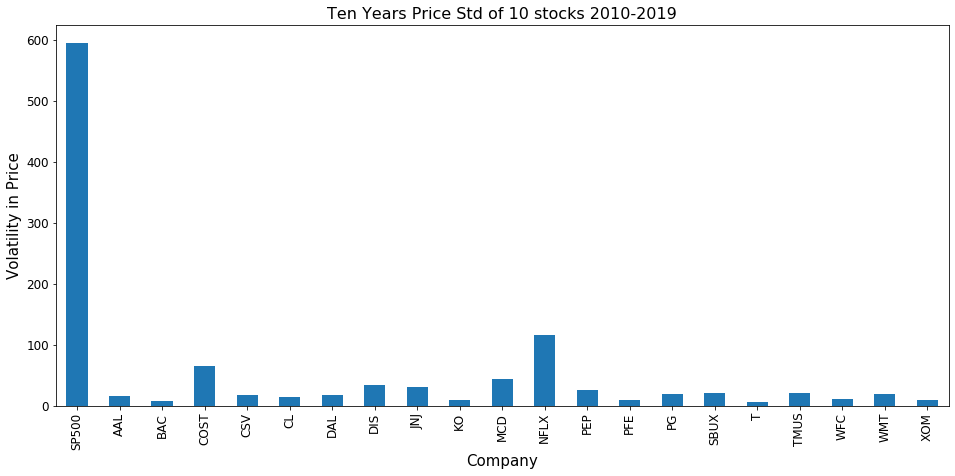

In [74]:
# Should we consider removing S&P500 from this chart?
rcParams['figure.figsize'] = 16, 7
PriceStd_Bar = Price_Std.plot(kind="bar", fontsize=12 )
PriceStd_Bar.set_title('Ten Years Price Std of 10 stocks 2010-2019', size=16)
PriceStd_Bar.set_xlabel('Company', size=15)
PriceStd_Bar.set_ylabel('Volatility in Price', size=15)
plt.savefig("Images/06_All_Volatility-PriceStd_withSP500.png")
plt.show()

In [75]:
data_stdP = {"AAL": aalstdP, "BAC": bacstdP, "COST": coststdP, "CSV": cvxstdP,
             "CL": clstdP, "DAL": dalstdP, "DIS": disstdP, "JNJ": jnjstdP, "KO": kostdP,
             "MCD": mcdstdP, "NFLX": nflxstdP, "PEP": pepstdP, "PFE": pfestdP, "PG": pgstdP,
             "SBUX": sbuxstdP, "T": tstdP, "TMUS": tmusstdP, "WFC": wfcstdP, "WMT": wmtstdP, "XOM": xomstdP}
Price_Std = pd.Series(data_stdP)
Price_Std

AAL      15.207
BAC       7.493
COST     65.232
CSV      18.088
CL       13.781
DAL      17.593
DIS      33.669
JNJ      30.986
KO        8.630
MCD      44.531
NFLX    115.706
PEP      25.429
PFE       8.775
PG       18.832
SBUX     20.847
T         5.924
TMUS     21.501
WFC      11.350
WMT      19.715
XOM       8.956
dtype: float64

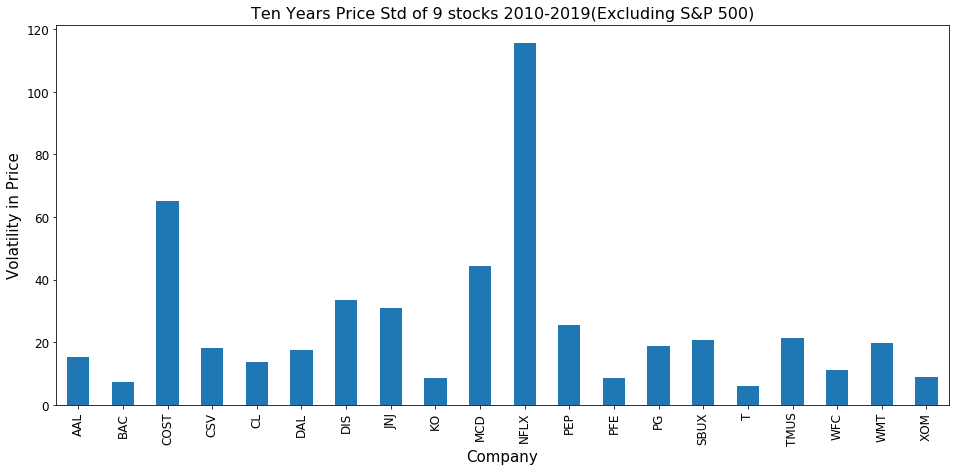

In [76]:
#Remade graph excluding S&P 500. I understood what clay asked in the above graph
#Because S&P500 has such a high price it's hard to see the comparison with the other Tickers
rcParams['figure.figsize'] = 16, 7
PriceStd_Bar = Price_Std.plot(kind="bar", fontsize=12 )
PriceStd_Bar.set_title('Ten Years Price Std of 9 stocks 2010-2019(Excluding S&P 500)', size=16)
PriceStd_Bar.set_xlabel('Company', size=15)
PriceStd_Bar.set_ylabel('Volatility in Price', size=15)
plt.savefig("Images/06_All_Volatility-PriceStd.png")
plt.show()

In [77]:
data_stdP1 = {"AAL": aalstdP, "DAL": dalstdP, "CVX": cvxstdP, "XOM": xomstdP}
Price_Std1 = pd.Series(data_stdP1)
Price_Std1

AAL    15.207
DAL    17.593
CVX    18.088
XOM     8.956
dtype: float64

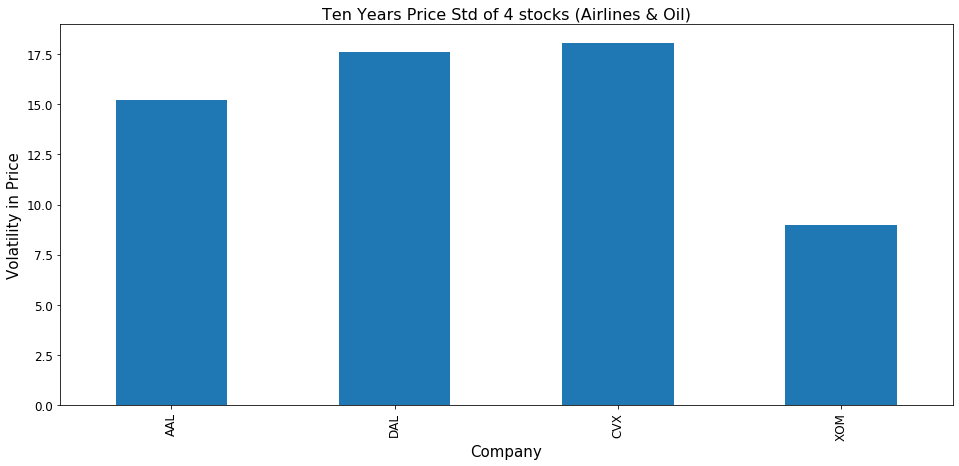

In [78]:
rcParams['figure.figsize'] = 16, 7
PriceStd_Bar1 = Price_Std1.plot(kind="bar", fontsize=12 )
PriceStd_Bar1.set_title('Ten Years Price Std of 4 stocks (Airlines & Oil)', size=16)
PriceStd_Bar1.set_xlabel('Company', size=15)
PriceStd_Bar1.set_ylabel('Volatility in Price', size=15)
plt.savefig("Images/06_AAL-DAL-CVX-XOM_Volatility-PriceStd.png")
plt.show()

In [79]:
data_stdP2 = {"BAC": bacstdP, "WFC": wfcstdP, "WMT": wmtstdP, "COST": coststdP}
Price_Std2 = pd.Series(data_stdP2)
Price_Std2

BAC      7.493
WFC     11.350
WMT     19.715
COST    65.232
dtype: float64

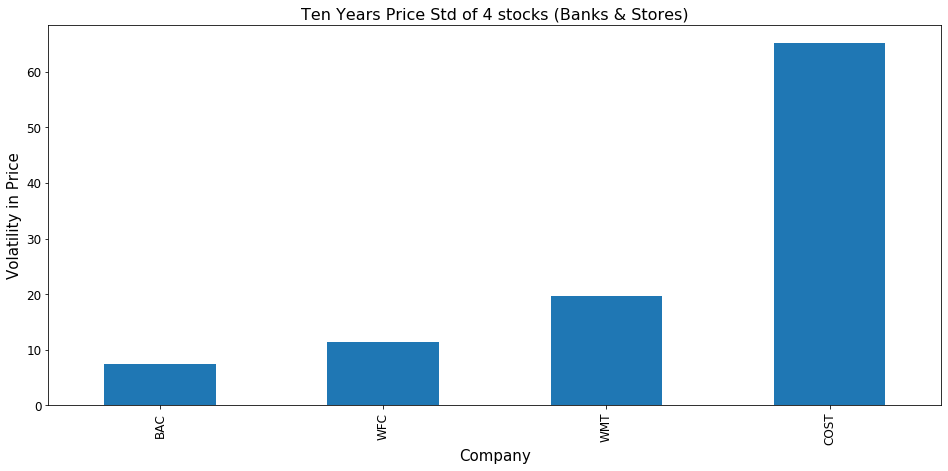

In [80]:
rcParams['figure.figsize'] = 16, 7
PriceStd_Bar2 = Price_Std2.plot(kind="bar", fontsize=12 )
PriceStd_Bar2.set_title('Ten Years Price Std of 4 stocks (Banks & Stores)', size=16)
PriceStd_Bar2.set_xlabel('Company', size=15)
PriceStd_Bar2.set_ylabel('Volatility in Price', size=15)
plt.savefig("Images/06_BAC-WFC-WMT-COST_Volatility-PriceStd.png")
plt.show()

In [81]:
data_stdP3 = {"PG": pgstdP, "CL": clstdP, "JNJ": jnjstdP, "PFE": pfestdP}
Price_Std3 = pd.Series(data_stdP3)
Price_Std3

PG     18.832
CL     13.781
JNJ    30.986
PFE     8.775
dtype: float64

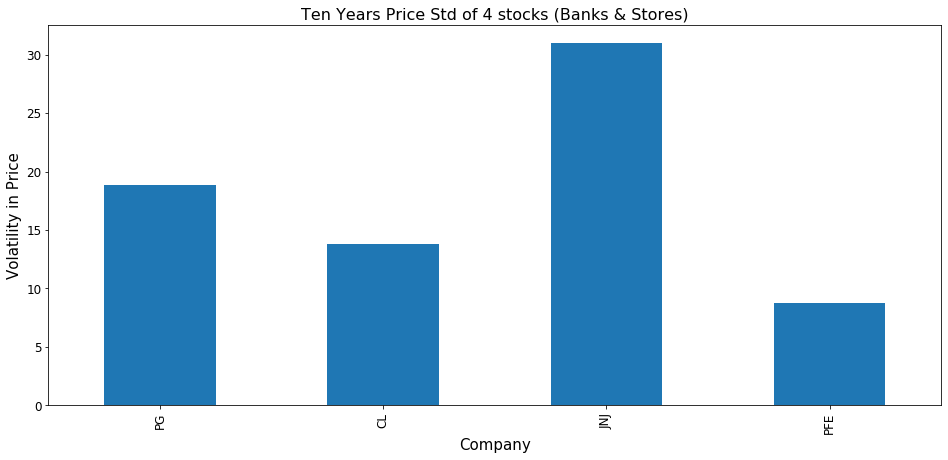

In [82]:
rcParams['figure.figsize'] = 16, 7
PriceStd_Bar3 = Price_Std3.plot(kind="bar", fontsize=12 )
PriceStd_Bar3.set_title('Ten Years Price Std of 4 stocks (Banks & Stores)', size=16)
PriceStd_Bar3.set_xlabel('Company', size=15)
PriceStd_Bar3.set_ylabel('Volatility in Price', size=15)
plt.savefig("Images/06_PG-CL-JNJ-PFE_Volatility-PriceStd.png")
plt.show()

In [83]:
data_stdP4 = {"PEP": pepstdP, "KO": kostdP, "MCD": mcdstdP, "SBUX": sbuxstdP}
Price_Std4 = pd.Series(data_stdP4)
Price_Std4

PEP     25.429
KO       8.630
MCD     44.531
SBUX    20.847
dtype: float64

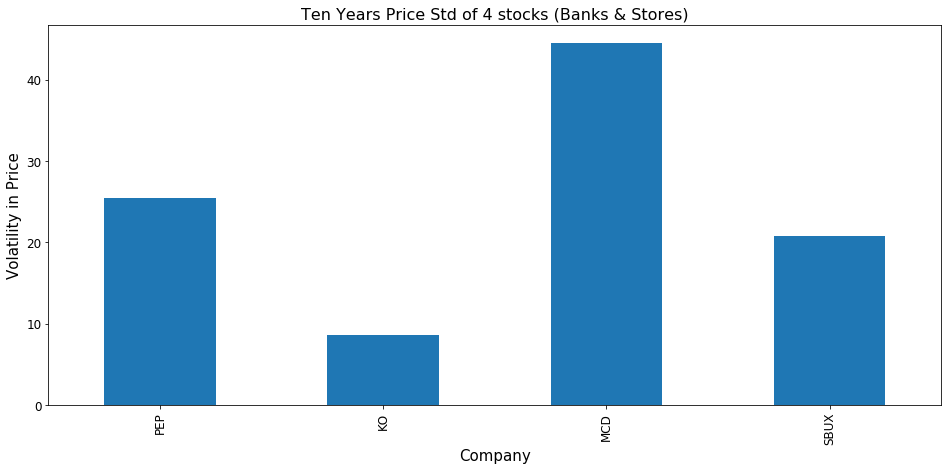

In [84]:
rcParams['figure.figsize'] = 16, 7
PriceStd_Bar4 = Price_Std4.plot(kind="bar", fontsize=12 )
PriceStd_Bar4.set_title('Ten Years Price Std of 4 stocks (Banks & Stores)', size=16)
PriceStd_Bar4.set_xlabel('Company', size=15)
PriceStd_Bar4.set_ylabel('Volatility in Price', size=15)
plt.savefig("Images/06_PEP-KO-MCD-SBUX_Volatility-PriceStd.png")
plt.show()

In [85]:
data_stdP5 = {"T": tstdP, "TMUS": tmusstdP, "NFLX": nflxstdP, "DIS": disstdP}
Price_Std5 = pd.Series(data_stdP5)
Price_Std5

T         5.924
TMUS     21.501
NFLX    115.706
DIS      33.669
dtype: float64

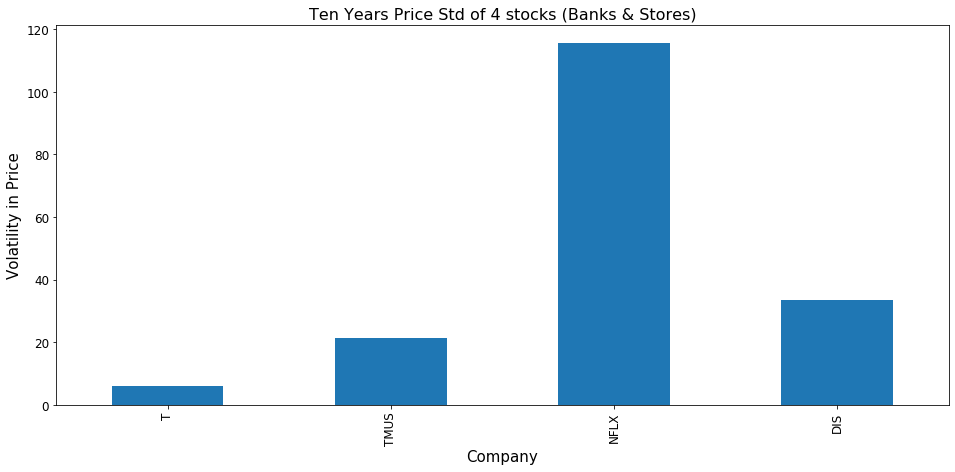

In [86]:
rcParams['figure.figsize'] = 16, 7
PriceStd_Bar5 = Price_Std5.plot(kind="bar", fontsize=12 )
PriceStd_Bar5.set_title('Ten Years Price Std of 4 stocks (Banks & Stores)', size=16)
PriceStd_Bar5.set_xlabel('Company', size=15)
PriceStd_Bar5.set_ylabel('Volatility in Price', size=15)
plt.savefig("Images/06_T-TMUS-NFLX-DIS_Volatility-PriceStd.png")
plt.show()

In [87]:
#Correlation Matrix ...a measure linear relationship between 2 variable..the effect of a change in one 
#variable on the other variable 
CorrelationMat = returns_df[["SP500", "AAL", "BAC", "COST", "CVX", 
                             "CL", "DAL", "DIS", "JNJ", "KO",
                             "MCD", "NFLX", "PEP", "PFE", "PG",
                             "SBUX","T", "TMUS", "WFC","WMT","XOM"]].corr()
CorrelationMat

,SP500,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,NFLX,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM
SP500,1.000000,0.296410,0.621256,0.495398,0.686653,0.480125,0.397322,0.646480,0.555185,0.438069,...,0.249002,0.456676,0.516324,0.344167,0.414075,0.358957,0.254415,0.696531,0.304007,0.677061
AAL,0.296410,1.000000,0.330107,0.118145,0.014423,0.124721,0.718378,0.185667,0.146625,0.005558,...,0.213282,0.193013,0.057515,-0.003280,0.185279,0.028393,-0.054279,0.207643,0.122373,0.080710
BAC,0.621256,0.330107,1.000000,0.204515,0.380809,0.110155,0.350174,0.420849,0.252673,0.018673,...,0.298442,0.080872,0.295660,0.064170,0.246543,0.049786,0.098906,0.679793,0.065423,0.301315
COST,0.495398,0.118145,0.204515,1.000000,0.312302,0.468540,0.232451,0.273430,0.411159,0.331285,...,0.069392,0.485637,0.348335,0.391720,0.308405,0.284348,0.107244,0.254135,0.346959,0.312577
CVX,0.686653,0.014423,0.380809,0.312302,1.000000,0.319163,0.075538,0.451050,0.411013,0.378215,...,0.026386,0.302752,0.430874,0.264548,0.228988,0.404747,0.162168,0.519527,0.119148,0.771913
CL,0.480125,0.124721,0.110155,0.468540,0.319163,1.000000,0.172512,0.257822,0.566608,0.493389,...,-0.064712,0.669013,0.321492,0.554765,0.301221,0.454762,0.064035,0.187570,0.321690,0.298218
DAL,0.397322,0.718378,0.350174,0.232451,0.075538,0.172512,1.000000,0.276136,0.277151,0.088087,...,0.168718,0.227244,0.120407,0.163072,0.307741,0.006422,-0.041979,0.291651,0.196805,0.135159
DIS,0.646480,0.185667,0.420849,0.273430,0.451050,0.257822,0.276136,1.000000,0.278296,0.329992,...,0.169160,0.341779,0.359159,0.208618,0.342984,0.227468,0.274617,0.504576,0.202507,0.453179
JNJ,0.555185,0.146625,0.252673,0.411159,0.411013,0.566608,0.277151,0.278296,1.000000,0.464942,...,0.029282,0.626278,0.537442,0.395705,0.163971,0.309076,0.036332,0.312197,0.409543,0.498969
KO,0.438069,0.005558,0.018673,0.331285,0.378215,0.493389,0.088087,0.329992,0.464942,1.000000,...,-0.037766,0.586890,0.315263,0.383700,0.256682,0.342697,0.130641,0.277811,0.395674,0.327510


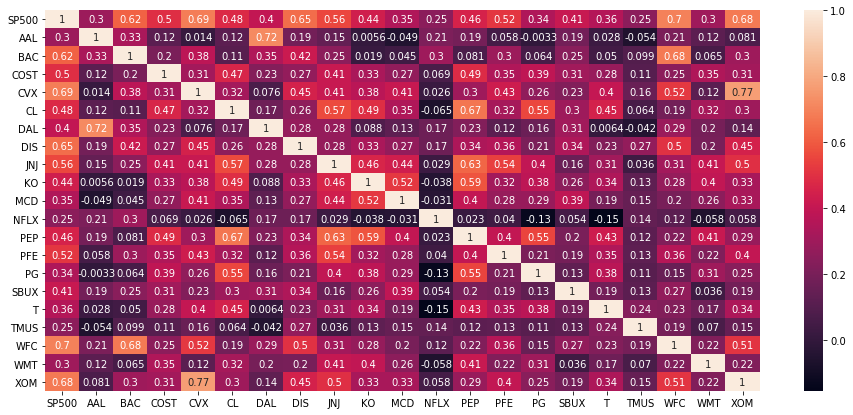

In [88]:
#Corelation matrix visual 
sn.heatmap(CorrelationMat, annot=True) #, cbar_kws={'orientation': 'horizontal'})        # , square=True
#plt.savefig("Images/CorrMatrix.png")
ax1 = sn.heatmap(CorrelationMat, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.savefig("Images/07_All_CorrMatrix.png")
plt.show()

In [89]:
CorrelationMat0 = returns_df[["SP500", "CVX", "XOM", "AAL", "DAL",  
                              "BAC", "WFC", "PEP", "KO",
                             "PG", "CL", "JNJ", "PFE", "MCD", "SBUX",
                            "WMT", "COST", "T","TMUS", "NFLX","DIS"]].corr()
CorrelationMat0 = round(CorrelationMat0, 1)
CorrelationMat0

,SP500,CVX,XOM,AAL,DAL,BAC,WFC,PEP,KO,PG,...,JNJ,PFE,MCD,SBUX,WMT,COST,T,TMUS,NFLX,DIS
SP500,1.0,0.7,0.7,0.3,0.4,0.6,0.7,0.5,0.4,0.3,...,0.6,0.5,0.3,0.4,0.3,0.5,0.4,0.3,0.2,0.6
CVX,0.7,1.0,0.8,0.0,0.1,0.4,0.5,0.3,0.4,0.3,...,0.4,0.4,0.4,0.2,0.1,0.3,0.4,0.2,0.0,0.5
XOM,0.7,0.8,1.0,0.1,0.1,0.3,0.5,0.3,0.3,0.2,...,0.5,0.4,0.3,0.2,0.2,0.3,0.3,0.1,0.1,0.5
AAL,0.3,0.0,0.1,1.0,0.7,0.3,0.2,0.2,0.0,-0.0,...,0.1,0.1,-0.0,0.2,0.1,0.1,0.0,-0.1,0.2,0.2
DAL,0.4,0.1,0.1,0.7,1.0,0.4,0.3,0.2,0.1,0.2,...,0.3,0.1,0.1,0.3,0.2,0.2,0.0,-0.0,0.2,0.3
BAC,0.6,0.4,0.3,0.3,0.4,1.0,0.7,0.1,0.0,0.1,...,0.3,0.3,0.0,0.2,0.1,0.2,0.0,0.1,0.3,0.4
WFC,0.7,0.5,0.5,0.2,0.3,0.7,1.0,0.2,0.3,0.2,...,0.3,0.4,0.2,0.3,0.2,0.3,0.2,0.2,0.1,0.5
PEP,0.5,0.3,0.3,0.2,0.2,0.1,0.2,1.0,0.6,0.6,...,0.6,0.4,0.4,0.2,0.4,0.5,0.4,0.1,0.0,0.3
KO,0.4,0.4,0.3,0.0,0.1,0.0,0.3,0.6,1.0,0.4,...,0.5,0.3,0.5,0.3,0.4,0.3,0.3,0.1,-0.0,0.3
PG,0.3,0.3,0.2,-0.0,0.2,0.1,0.2,0.6,0.4,1.0,...,0.4,0.2,0.3,0.1,0.3,0.4,0.4,0.1,-0.1,0.2


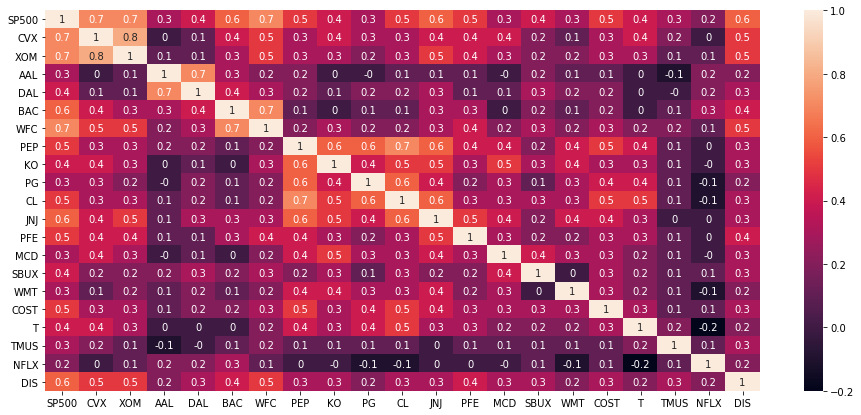

In [90]:
#Corelation matrix visual 
sn.heatmap(CorrelationMat0, annot=True) #, cbar_kws={'orientation': 'horizontal'})        # , square=True
#plt.savefig("Images/CorrMatrix.png")
ax1 = sn.heatmap(CorrelationMat0, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
plt.savefig("Images/07_All_CorrMatrix_Re-Arranged.png")
#sn.set(font_scale=10)
plt.show()

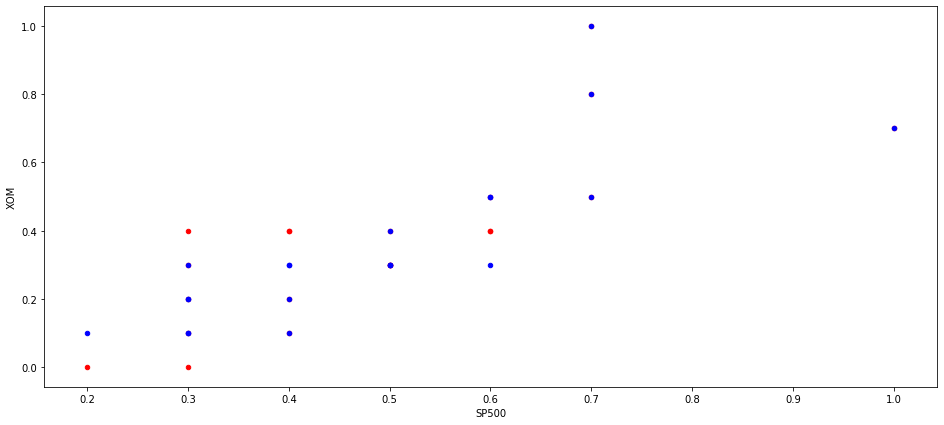

In [91]:
ax0 = CorrelationMat0.plot(kind='scatter', x='SP500', y='CVX', color ='r')
ax1 = CorrelationMat0.plot(kind='scatter', x='SP500', y='XOM', color ='b', ax=ax0)
plt.savefig("Images/07_SP500-XOM_CorrMat_ScatterPlot.png")

In [92]:
CorrelationMat1 = returns_df[["SP500", "AAL", "DAL", "CVX", "XOM"]].corr()
CorrelationMat1

,SP500,AAL,DAL,CVX,XOM
SP500,1.000000,0.296410,0.397322,0.686653,0.677061
AAL,0.296410,1.000000,0.718378,0.014423,0.080710
DAL,0.397322,0.718378,1.000000,0.075538,0.135159
CVX,0.686653,0.014423,0.075538,1.000000,0.771913
XOM,0.677061,0.080710,0.135159,0.771913,1.000000


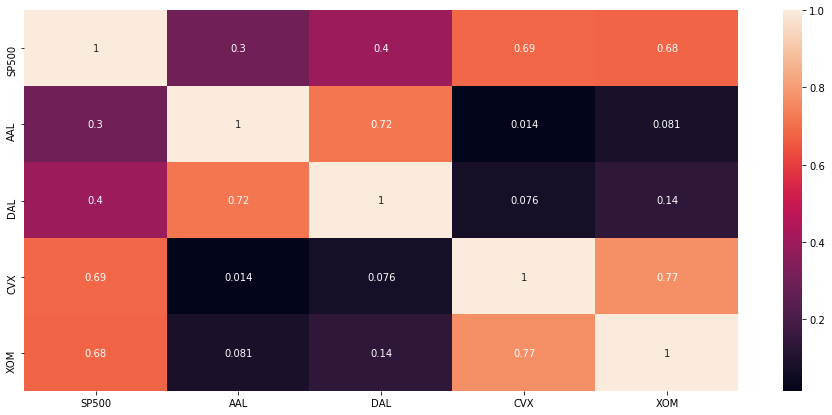

In [93]:
#Corelation matrix visual for Airlines & Oil Company
sn.heatmap(CorrelationMat1, annot=True) #, cbar_kws={'orientation': 'horizontal'})        # , square=True
#plt.savefig("Images/CorrMatrix.png")
ax2 = sn.heatmap(CorrelationMat1, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.savefig("Images/07_SP500-AAL-DAL-CSV-XOM_CorrMatrix.png")
plt.show()

In [94]:
CorrelationMat2 = returns_df[["SP500", "BAC", "WFC", "WMT", "COST"]].corr()
CorrelationMat2

,SP500,BAC,WFC,WMT,COST
SP500,1.000000,0.621256,0.696531,0.304007,0.495398
BAC,0.621256,1.000000,0.679793,0.065423,0.204515
WFC,0.696531,0.679793,1.000000,0.224560,0.254135
WMT,0.304007,0.065423,0.224560,1.000000,0.346959
COST,0.495398,0.204515,0.254135,0.346959,1.000000


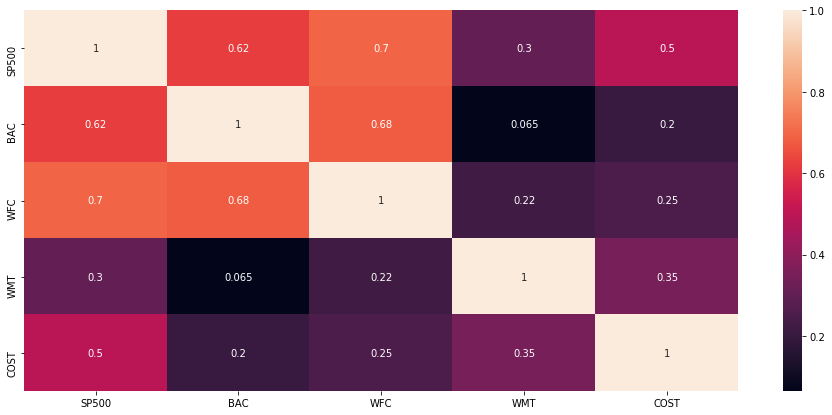

In [95]:
#Corelation matrix visual for Banks & Store Chains 
sn.heatmap(CorrelationMat2, annot=True) #, cbar_kws={'orientation': 'horizontal'})        # , square=True
#plt.savefig("Images/CorrMatrix.png")
ax3 = sn.heatmap(CorrelationMat2, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.savefig("Images/07_SP500-BAC-WFC-WMT-COST_CorrMatrix.png")
plt.show()

In [96]:
CorrelationMat3 = returns_df[["SP500", "PG", "CL", "JNJ", "PFE"]].corr()
CorrelationMat3

,SP500,PG,CL,JNJ,PFE
SP500,1.000000,0.344167,0.480125,0.555185,0.516324
PG,0.344167,1.000000,0.554765,0.395705,0.210594
CL,0.480125,0.554765,1.000000,0.566608,0.321492
JNJ,0.555185,0.395705,0.566608,1.000000,0.537442
PFE,0.516324,0.210594,0.321492,0.537442,1.000000


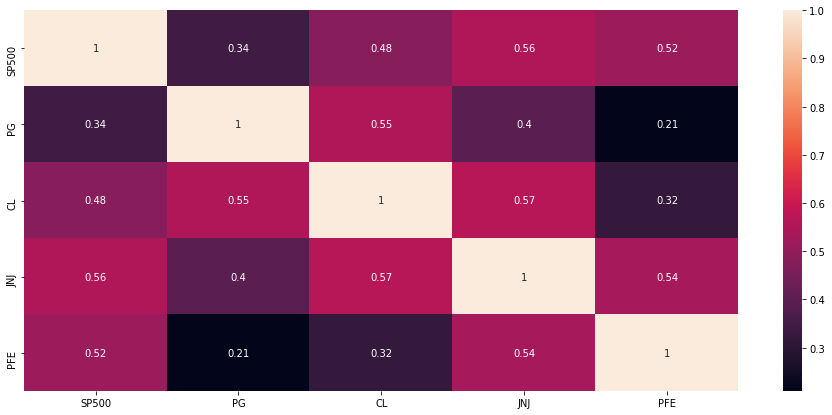

In [97]:
#Corelation matrix visual for Hygenics & Pharmaceuticals 
sn.heatmap(CorrelationMat3, annot=True) #, cbar_kws={'orientation': 'horizontal'})        # , square=True
#plt.savefig("Images/CorrMatrix.png")
ax4 = sn.heatmap(CorrelationMat3, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.savefig("Images/07_SP500-PG-CL-JNJ-PFE_CorrMatrix.png")
plt.show()

In [98]:
CorrelationMat4 = returns_df[["SP500", "PEP", "KO", "MCD", "SBUX"]].corr()
CorrelationMat4

,SP500,PEP,KO,MCD,SBUX
SP500,1.000000,0.456676,0.438069,0.349859,0.414075
PEP,0.456676,1.000000,0.586890,0.396768,0.204995
KO,0.438069,0.586890,1.000000,0.519913,0.256682
MCD,0.349859,0.396768,0.519913,1.000000,0.389635
SBUX,0.414075,0.204995,0.256682,0.389635,1.000000


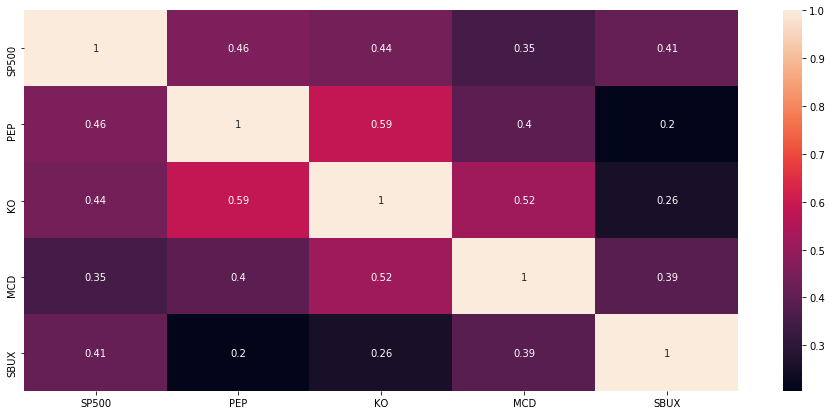

In [99]:
#Corelation matrix visual for Drink Beverages & FastFood Chains 
sn.heatmap(CorrelationMat4, annot=True) #, cbar_kws={'orientation': 'horizontal'})        # , square=True
#plt.savefig("Images/CorrMatrix.png")
ax5 = sn.heatmap(CorrelationMat4, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.savefig("Images/07_SP500-PEP-KO-SBUX_CorrMatrix.png")
plt.show()

In [100]:
CorrelationMat5 = returns_df[["SP500", "T", "TMUS", "NFLX", "DIS"]].corr()
CorrelationMat5

,SP500,T,TMUS,NFLX,DIS
SP500,1.000000,0.358957,0.254415,0.249002,0.646480
T,0.358957,1.000000,0.235160,-0.152825,0.227468
TMUS,0.254415,0.235160,1.000000,0.141593,0.274617
NFLX,0.249002,-0.152825,0.141593,1.000000,0.169160
DIS,0.646480,0.227468,0.274617,0.169160,1.000000


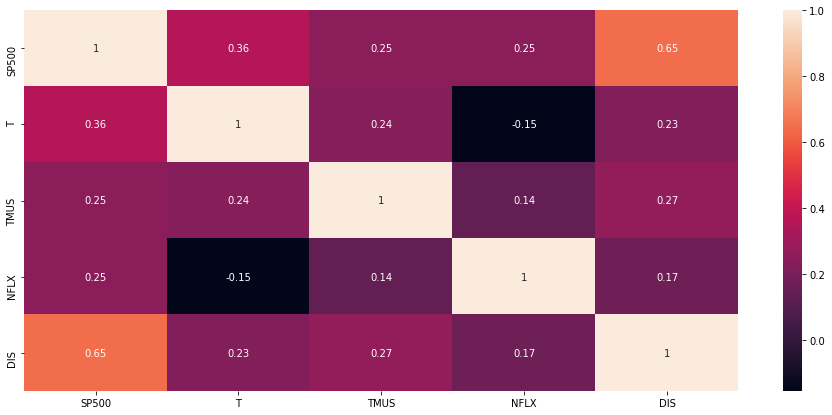

In [101]:
#Corelation matrix visual for Phone & Streaming Entertainment 
sn.heatmap(CorrelationMat5, annot=True) #, cbar_kws={'orientation': 'horizontal'})        # , square=True
#plt.savefig("Images/CorrMatrix.png")
ax6 = sn.heatmap(CorrelationMat5, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.savefig("Images/07_SP500-T-TMUS-NFLX-DIS_CorrMatrix.png")
plt.show()

In [102]:
#Covariance Matrix
Covariance = returns_df[["SP500", "AAL", "BAC", "COST", "CVX",
                         "CL", "DAL", "DIS", "JNJ", "KO",
                         "MCD", "NFLX", "PEP", "PFE", "PG",
                         "SBUX","T", "TMUS", "WFC","WMT","XOM"]].cov()
Covariance

,SP500,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,NFLX,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM
SP500,0.001311,0.001473,0.002092,0.000858,0.001399,0.000712,0.001296,0.001376,0.000819,0.000614,...,0.001559,0.000626,0.000871,0.000481,0.000851,0.000576,0.000934,0.001455,0.000537,0.001212
AAL,0.001473,0.018833,0.004214,0.000775,0.000111,0.000701,0.008882,0.001498,0.000820,0.000030,...,0.005061,0.001002,0.000368,-0.000017,0.001443,0.000173,-0.000755,0.001644,0.000820,0.000548
BAC,0.002092,0.004214,0.008651,0.000910,0.001993,0.000420,0.002934,0.002301,0.000957,0.000067,...,0.004799,0.000285,0.001282,0.000230,0.001302,0.000205,0.000933,0.003647,0.000297,0.001386
COST,0.000858,0.000775,0.000910,0.002286,0.000840,0.000918,0.001001,0.000769,0.000801,0.000613,...,0.000574,0.000878,0.000776,0.000723,0.000837,0.000603,0.000520,0.000701,0.000810,0.000739
CVX,0.001399,0.000111,0.001993,0.000840,0.003166,0.000736,0.000383,0.001492,0.000942,0.000823,...,0.000257,0.000644,0.001130,0.000575,0.000731,0.001009,0.000925,0.001686,0.000327,0.002148
CL,0.000712,0.000701,0.000420,0.000918,0.000736,0.001679,0.000637,0.000621,0.000946,0.000782,...,-0.000458,0.001037,0.000614,0.000878,0.000701,0.000826,0.000266,0.000443,0.000643,0.000604
DAL,0.001296,0.008882,0.002934,0.001001,0.000383,0.000637,0.008117,0.001463,0.001017,0.000307,...,0.002628,0.000775,0.000506,0.000567,0.001574,0.000026,-0.000383,0.001516,0.000866,0.000602
DIS,0.001376,0.001498,0.002301,0.000769,0.001492,0.000621,0.001463,0.003456,0.000666,0.000751,...,0.001719,0.000760,0.000984,0.000474,0.001145,0.000593,0.001637,0.001711,0.000581,0.001318
JNJ,0.000819,0.000820,0.000957,0.000801,0.000942,0.000946,0.001017,0.000666,0.001659,0.000733,...,0.000206,0.000965,0.001020,0.000622,0.000379,0.000558,0.000150,0.000734,0.000814,0.001005
KO,0.000614,0.000030,0.000067,0.000613,0.000823,0.000782,0.000307,0.000751,0.000733,0.001497,...,-0.000253,0.000859,0.000568,0.000573,0.000564,0.000588,0.000512,0.000620,0.000747,0.000627


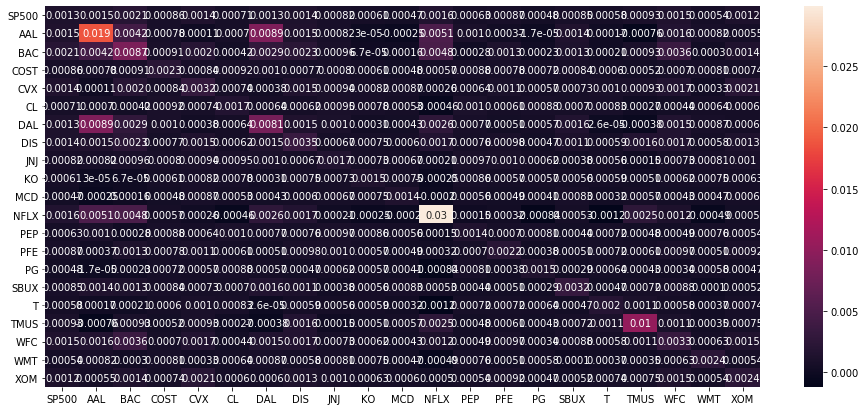

In [103]:
sn.heatmap(Covariance, annot=True)

ax0 = sn.heatmap(Covariance, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.savefig("Images/08_All_CovarianceMatrix.png")
plt.show()

In [104]:
Covariance1 = returns_df[["SP500", "AAL", "DAL", "CVX", "XOM"]].cov()
Covariance1 

,SP500,AAL,DAL,CVX,XOM
SP500,0.001311,0.001473,0.001296,0.001399,0.001212
AAL,0.001473,0.018833,0.008882,0.000111,0.000548
DAL,0.001296,0.008882,0.008117,0.000383,0.000602
CVX,0.001399,0.000111,0.000383,0.003166,0.002148
XOM,0.001212,0.000548,0.000602,0.002148,0.002446


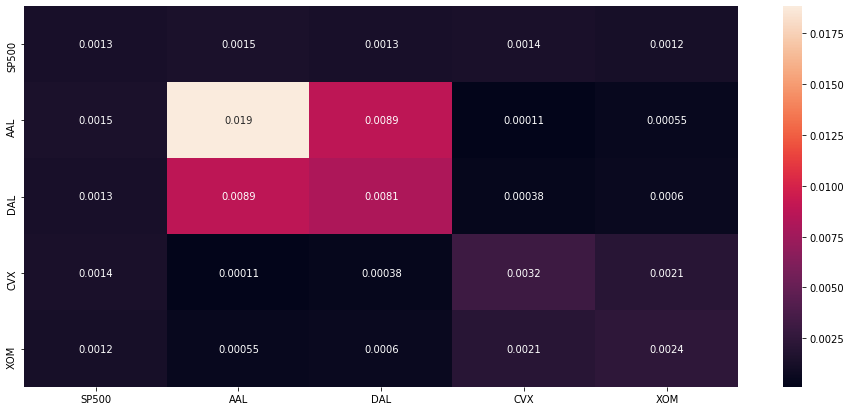

In [105]:
#Covariance Heatmap of Airlines & Oil
sn.heatmap(Covariance1, annot=True)

ax1c = sn.heatmap(Covariance1, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.savefig("Images/08_SP500-AAL-BAC-WFC-WMT-COST_CovarianceMatrix.png")
plt.show()

In [106]:
Covariance2 = returns_df[["SP500", "BAC", "WFC", "WMT", "COST"]].cov()
Covariance2 

,SP500,BAC,WFC,WMT,COST
SP500,0.001311,0.002092,0.001455,0.000537,0.000858
BAC,0.002092,0.008651,0.003647,0.000297,0.000910
WFC,0.001455,0.003647,0.003328,0.000632,0.000701
WMT,0.000537,0.000297,0.000632,0.002383,0.000810
COST,0.000858,0.000910,0.000701,0.000810,0.002286


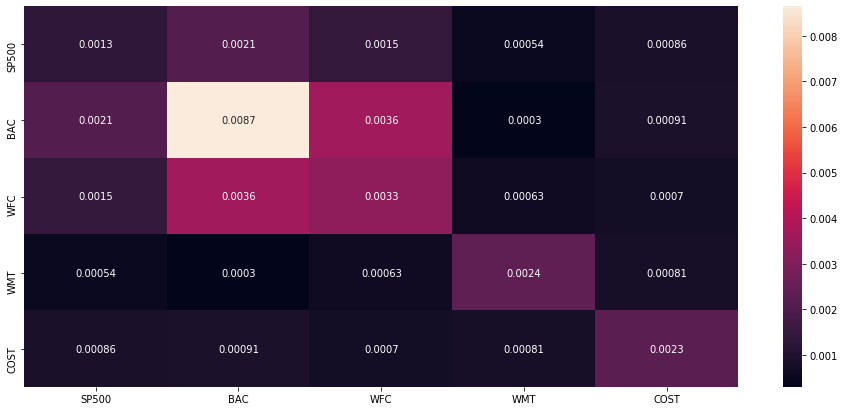

In [107]:
#Covariance Heatmap of Banks & Store Chains
sn.heatmap(Covariance2, annot=True)

ax2c = sn.heatmap(Covariance2, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.savefig("Images/08_SP500-BAC-WFC-WMT-COST_CovarianceMatrix.png")
plt.show()

In [108]:
Covariance3 = returns_df[["SP500", "PG", "CL", "JNJ", "PFE"]].cov()
Covariance3 

,SP500,PG,CL,JNJ,PFE
SP500,0.001311,0.000481,0.000712,0.000819,0.000871
PG,0.000481,0.001491,0.000878,0.000622,0.000379
CL,0.000712,0.000878,0.001679,0.000946,0.000614
JNJ,0.000819,0.000622,0.000946,0.001659,0.001020
PFE,0.000871,0.000379,0.000614,0.001020,0.002172


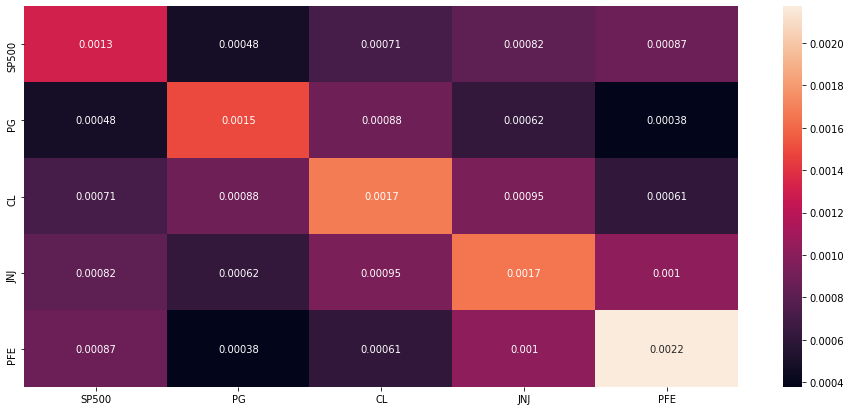

In [109]:
#Covariance Heatmap of Hygene & Pharmaceuticals
sn.heatmap(Covariance3, annot=True)

ax3c = sn.heatmap(Covariance3, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.savefig("Images/08_SP500-PG-CL-JNJ-PFE_CovarianceMatrix.png")
plt.show()

In [110]:
Covariance4 = returns_df[["SP500", "PEP", "KO", "MCD", "SBUX"]].cov()
Covariance4

,SP500,PEP,KO,MCD,SBUX
SP500,0.001311,0.000626,0.000614,0.000474,0.000851
PEP,0.000626,0.001431,0.000859,0.000561,0.000440
KO,0.000614,0.000859,0.001497,0.000752,0.000564
MCD,0.000474,0.000561,0.000752,0.001398,0.000827
SBUX,0.000851,0.000440,0.000564,0.000827,0.003223


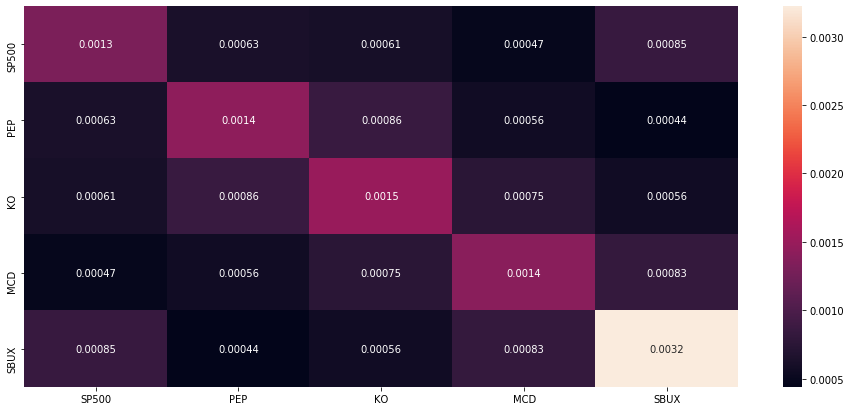

In [111]:
#Covariance Heatmap of Drinks & FastFood Chains
sn.heatmap(Covariance4, annot=True)

ax3c = sn.heatmap(Covariance4, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.savefig("Images/08_SP500-PEP-KO-MCD-SBUX_CovarianceMatrix.png")
plt.show()

In [112]:
Covariance5 = returns_df[["SP500", "T", "TMUS", "NFLX", "DIS"]].cov()
Covariance5

,SP500,T,TMUS,NFLX,DIS
SP500,0.001311,0.000576,0.000934,0.001559,0.001376
T,0.000576,0.001965,0.001057,-0.001171,0.000593
TMUS,0.000934,0.001057,0.010278,0.002482,0.001637
NFLX,0.001559,-0.001171,0.002482,0.029893,0.001719
DIS,0.001376,0.000593,0.001637,0.001719,0.003456


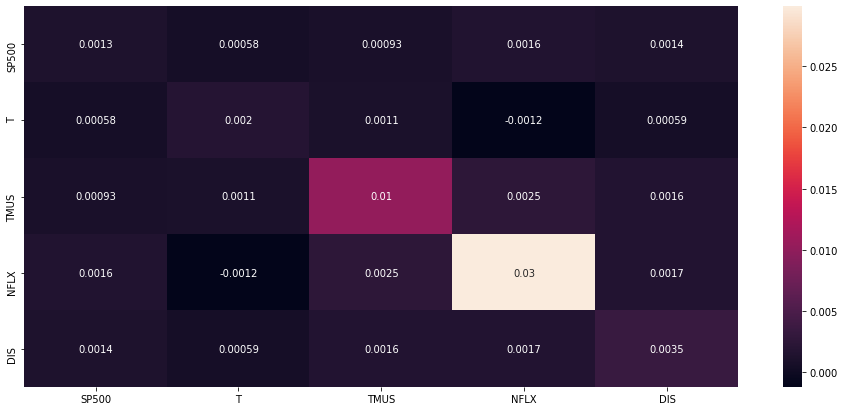

In [113]:
#Covariance Heatmap of Phones & Streaming Entertainment
sn.heatmap(Covariance5, annot=True)

ax3c = sn.heatmap(Covariance5, cbar=0, cmap="YlGnBu",linewidths=2,
                 ax=PriceStd_Bar, vmax=3000, vmin=0, square=True) #  fmt="d",
#sn.set(font_scale=10)
plt.savefig("Images/08_SP500-T-TMUS-NFLX-DIS_CovarianceMatrix.png")
plt.show()

In [114]:
#Perform regression analysis to predict the stocks of 2 stocks with lowest correlation 

In [115]:
cvx_combined_df = combined_df[["Date", "CVX"]]
cvx_combined_df.head()

,Date,CVX
0,2010-01-01,48.390926
1,2010-02-01,48.511700
2,2010-03-01,51.367226
3,2010-04-01,55.167446
4,2010-05-01,50.039509


In [116]:
cvx_combined_df = (cvx_combined_df.drop(['Date'], axis=1)).reset_index()
cvx_combined_df.head()

,index,CVX
0,0,48.390926
1,1,48.511700
2,2,51.367226
3,3,55.167446
4,4,50.039509


In [117]:
len(cvx_combined_df)

120

In [118]:
#cvx_reg_df = combined_df['CVX']

#cvx_dropped_reg_df = cvx_reg_df.drop(cvx_reg_df["Date"]).reset_index()
#cvx_reg_df

In [119]:
# regression1_df = regression_df.rename(columns={"Index","Months"}, inplace=True)
len(cvx_combined_df)

120

The r-squared is: 0.7211201233688641


<function matplotlib.pyplot.show(*args, **kw)>

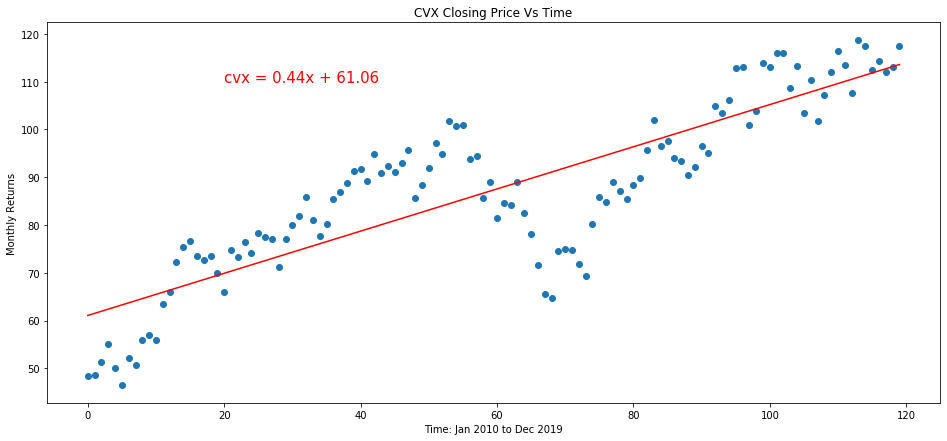

In [120]:
#CVX Regression 
#Define x and y variables for scatter plot
x_values = cvx_combined_df["index"]
y_values = cvx_combined_df["CVX"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "cvx = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,110),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("Monthly Returns")
plt.title("CVX Closing Price Vs Time")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/09_CVX_ScatterPlot.png")
plt.show

In [121]:
CVX_Jan2020 = (0.44*121) + 61.06
CVX_Feb2020 = (0.44*122) + 61.06
print(f"The forcasted monthly closing price of CVX in Jan 2020 is {CVX_Jan2020}")
print(f"The forcasted monthly closing price of CVX in Feb 2020 is {CVX_Feb2020}")

The forcasted monthly closing price of CVX in Jan 2020 is 114.30000000000001
The forcasted monthly closing price of CVX in Feb 2020 is 114.74000000000001


In [122]:
#the actual closing price of CVX in Jan is 104.37
#the actual closing price of CVX in Feb is  90.93...the std of cvx price is +/-18.1

In [123]:
pg_reg_df = combined_df[["Date", "PG"]]
pg_reg_df.head()

pg_reg_df = pg_reg_df.drop(["Date"], axis=1).reset_index()

In [124]:
nflx_reg_df = combined_df[["Date", "NFLX"]]
nflx_reg_df.head()

nflx_reg_df = nflx_reg_df.drop(["Date"], axis=1).reset_index()

In [125]:
nflx_reg_df.head()

,index,NFLX
0,0,8.892858
1,1,9.435715
2,2,10.534286
3,3,14.128572
4,4,15.878572


The r-squared is: 0.8344911100716595


<function matplotlib.pyplot.show(*args, **kw)>

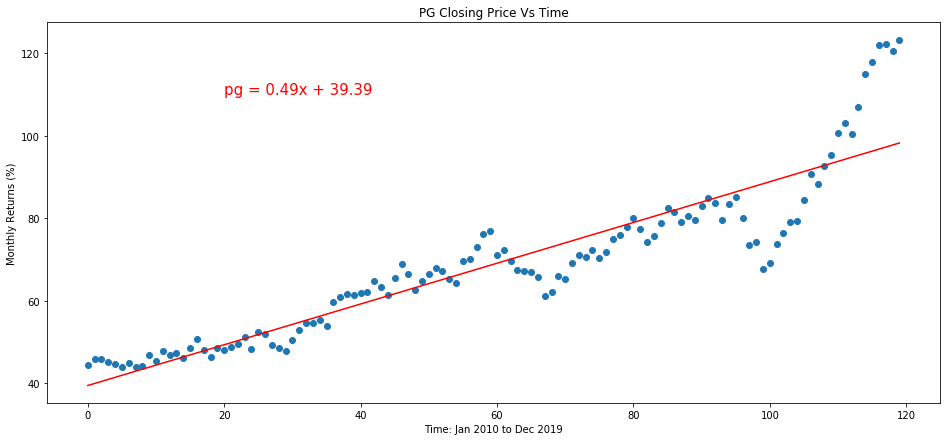

In [126]:
#PEP Regression 
#Define x and y variables for scatter plot
x_values = pg_reg_df["index"]
y_values = pg_reg_df["PG"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "pg = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,110),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("Monthly Returns (%)")
plt.title("PG Closing Price Vs Time")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/09_PG_ScatterPlot.png")
plt.show

The r-squared is: 0.7847576500695972


<function matplotlib.pyplot.show(*args, **kw)>

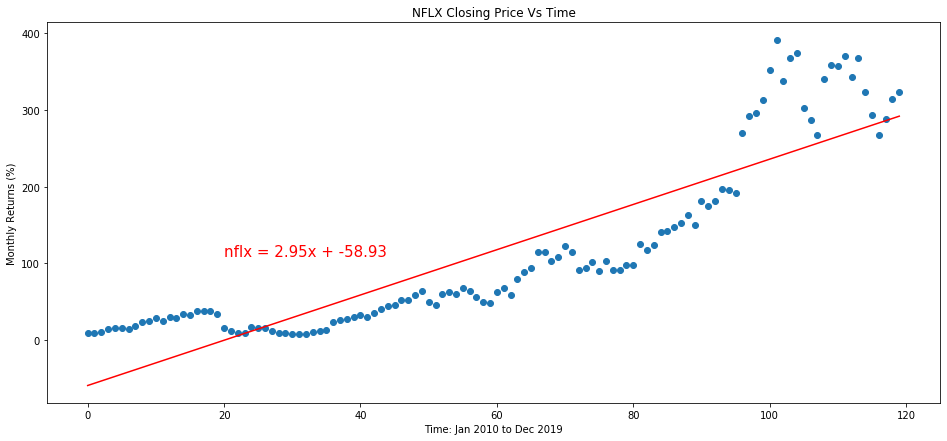

In [127]:
#NFLX Regression 
#Define x and y variables for scatter plot
x_values = nflx_reg_df["index"]
y_values = nflx_reg_df["NFLX"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "nflx = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,110),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("Monthly Returns (%)")
plt.title("NFLX Closing Price Vs Time")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/09_NFLX_ScatterPlot.png")
plt.show

In [128]:
NFLX_Jan2020 = (2.95*121) + (-58.93)
NFLX_Feb2020 = (2.95*121) + (-58.93)
print(f"The forcasted monthly closing price of NFLX in Jan 2020 is {NFLX_Jan2020}")
print(f"The forcasted monthly closing price of NFLX in Feb 2020 is {NFLX_Feb2020}")

The forcasted monthly closing price of NFLX in Jan 2020 is 298.02000000000004
The forcasted monthly closing price of NFLX in Feb 2020 is 298.02000000000004


In [129]:
PG_Jan2020 = (0.49*121) + 39.39
PG_Feb2020 = (0.49*122) + 39.39
print(f"The forcasted monthly closing price of PG in Jan 2020 is {PG_Jan2020}")
print(f"The forcasted monthly closing price of PG in Feb 2020 is {PG_Feb2020}")

The forcasted monthly closing price of PG in Jan 2020 is 98.68
The forcasted monthly closing price of PG in Feb 2020 is 99.17


In [130]:
#the actual closing price of PG in Jan is 123.06
#the actual closing price of PG in Feb is  112.48...
#forecasted price for Jan is outside of std 18.83, while Feb is within

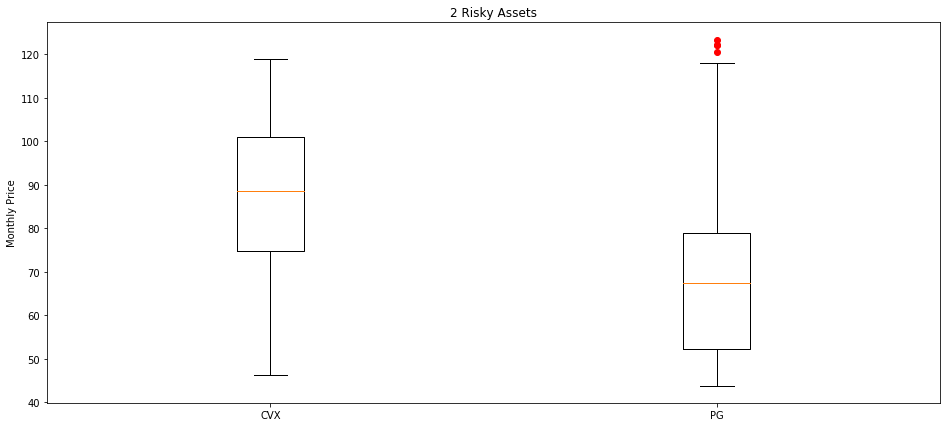

In [131]:
#Are there outliers in the data of the 2 assets due to news especially quaterly reports and dividend payout?
BoxPlot_Data = []
BoxPlot_Data.append(combined_df["CVX"])
# BoxPlot_Data.append(Tunde_finalMerged_df["XOM"])
BoxPlot_Data.append(combined_df["PG"])
# BoxPlot_Data.append(Tunde_finalMerged_df["CL"])
# BoxPlot_Data.append(Tunde_finalMerged_df["PEP"])
# BoxPlot_Data.append(Tunde_finalMerged_df["SP500"])
Risky_Assets =["CVX","PG"]
fig1, ax1=plt.subplots()
ax1.set_title("2 Risky Assets")
ax1.set_ylabel("Monthly Price")
#plot boxplots and add color to show outliers 
ax1.boxplot(BoxPlot_Data, sym="r")
plt.xticks([1,2], Risky_Assets)
plt.savefig("Images/09_CVX-PG_Boxplots.pdf")
plt.show()

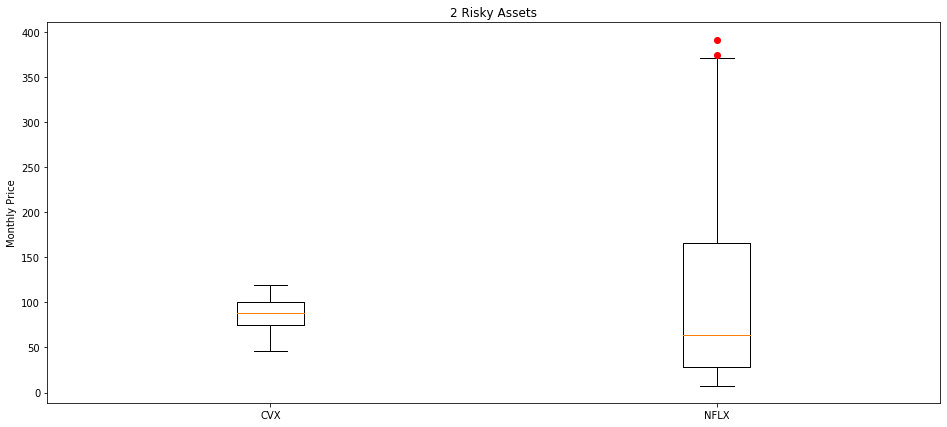

In [132]:
#Are there outliers in the data of the 2 assets due to news especially quaterly reports and dividend payout?
BoxPlot_Data = []
BoxPlot_Data.append(combined_df["CVX"])
# BoxPlot_Data.append(Tunde_finalMerged_df["XOM"])
BoxPlot_Data.append(combined_df["NFLX"])
# BoxPlot_Data.append(Tunde_finalMerged_df["CL"])
# BoxPlot_Data.append(Tunde_finalMerged_df["PEP"])
# BoxPlot_Data.append(Tunde_finalMerged_df["SP500"])
Risky_Assets =["CVX","NFLX"]
fig1, ax1=plt.subplots()
ax1.set_title("2 Risky Assets")
ax1.set_ylabel("Monthly Price")
#plot boxplots and add color to show outliers 
ax1.boxplot(BoxPlot_Data, sym="r")
plt.xticks([1,2], Risky_Assets)
plt.savefig("Images/09_CVX-NFLX_Boxplots.pdf")
plt.show()

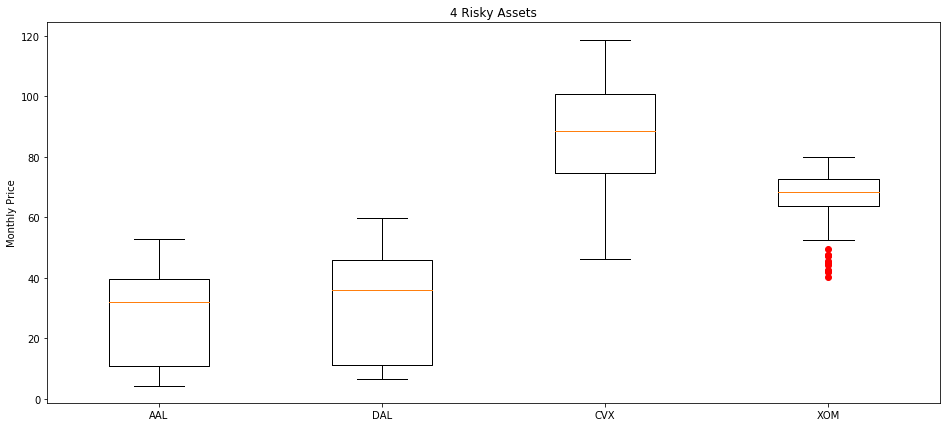

In [133]:
#BoxPlot for AAL, DAL, CVX, XOM
BoxPlot_Data = []
BoxPlot_Data.append(combined_df["AAL"])
BoxPlot_Data.append(combined_df["DAL"])
BoxPlot_Data.append(combined_df["CVX"])
BoxPlot_Data.append(combined_df["XOM"])
Risky_Assets =["AAL","DAL", "CVX", "XOM"]
fig1, ax1=plt.subplots()
ax1.set_title("4 Risky Assets")
ax1.set_ylabel("Monthly Price")
#plot boxplots and add color to show outliers 
ax1.boxplot(BoxPlot_Data, sym="r")
plt.xticks([1,2,3,4], Risky_Assets)
plt.savefig("Images/09_AAL-DAL-CVX-XOM_Boxplots.pdf")
plt.show()

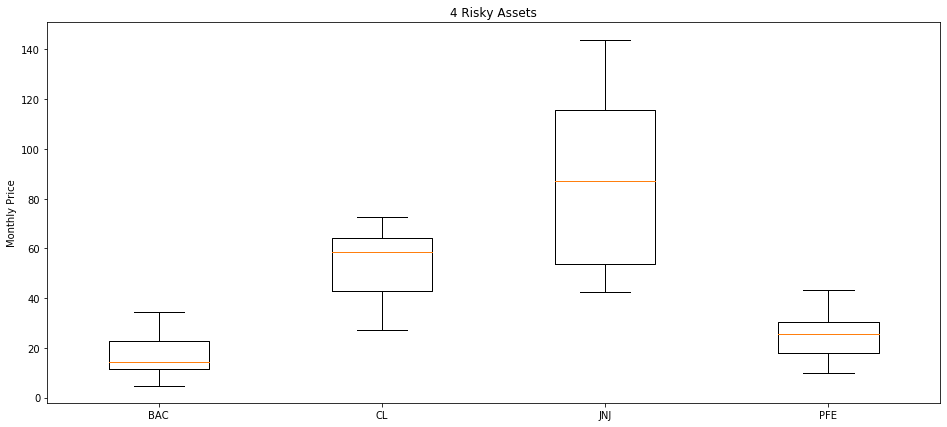

In [134]:
#BoxPlot for BAC, CL, JNJ, PFE
BoxPlot_Data = []
BoxPlot_Data.append(combined_df["BAC"])
BoxPlot_Data.append(combined_df["CL"])
BoxPlot_Data.append(combined_df["JNJ"])
BoxPlot_Data.append(combined_df["PFE"])
Risky_Assets =["BAC","CL", "JNJ", "PFE"]
fig1, ax1=plt.subplots()
ax1.set_title("4 Risky Assets")
ax1.set_ylabel("Monthly Price")
#plot boxplots and add color to show outliers 
ax1.boxplot(BoxPlot_Data, sym="r")
plt.xticks([1,2,3,4], Risky_Assets)
plt.savefig("Images/09_BAC-CL-JNJ-PFE_Boxplots.pdf")
plt.show()

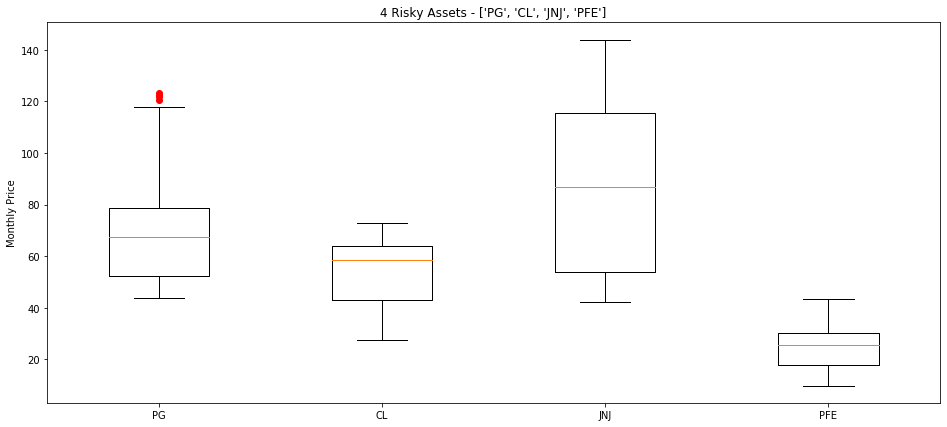

In [135]:
#BoxPlot for PG, CL, JNJ, PFE
BoxPlot_Data = []
BoxPlot_Data.append(combined_df["PG"])
BoxPlot_Data.append(combined_df["CL"])
BoxPlot_Data.append(combined_df["JNJ"])
BoxPlot_Data.append(combined_df["PFE"])
Risky_Assets =["PG","CL", "JNJ", "PFE"]
fig1, ax1=plt.subplots()
ax1.set_title(f"4 Risky Assets - {Risky_Assets}")
ax1.set_ylabel("Monthly Price")
#plot boxplots and add color to show outliers 
ax1.boxplot(BoxPlot_Data, sym="r")
plt.xticks([1,2,3,4], Risky_Assets)
plt.savefig(f"Images/09_{Risky_Assets}_Boxplots.pdf")
plt.show()

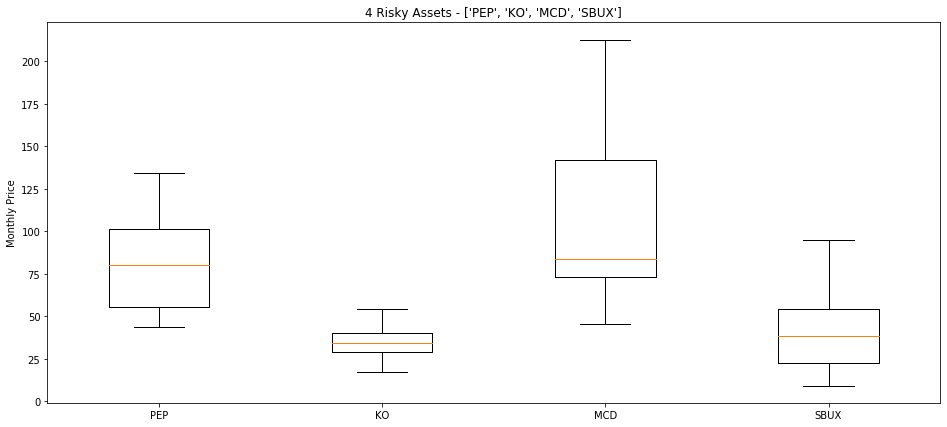

In [136]:
#BoxPlot for PEP, KO, MCD, SBUX
BoxPlot_Data = []
BoxPlot_Data.append(combined_df["PEP"])
BoxPlot_Data.append(combined_df["KO"])
BoxPlot_Data.append(combined_df["MCD"])
BoxPlot_Data.append(combined_df["SBUX"])
Risky_Assets =["PEP","KO", "MCD", "SBUX"]
fig1, ax1=plt.subplots()
ax1.set_title(f"4 Risky Assets - {Risky_Assets}")
ax1.set_ylabel("Monthly Price")
#plot boxplots and add color to show outliers 
ax1.boxplot(BoxPlot_Data, sym="r")
plt.xticks([1,2,3,4], Risky_Assets)
plt.savefig(f"Images/09_{Risky_Assets}_Boxplots.pdf")
plt.show()

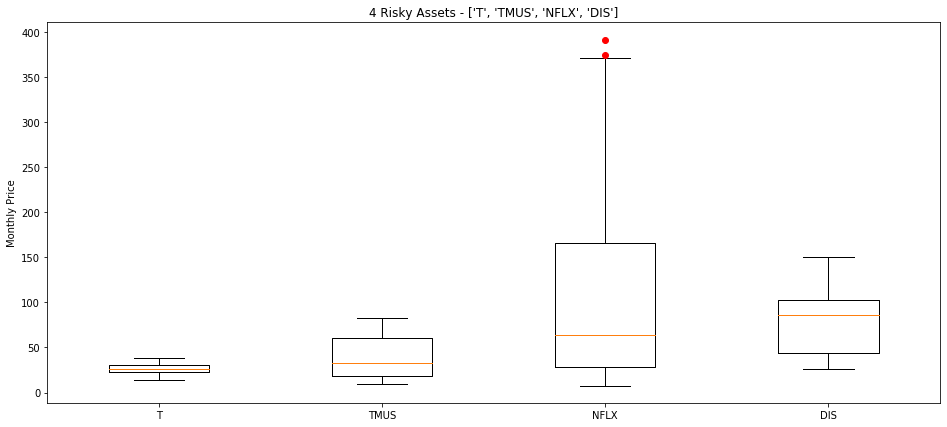

In [137]:
#BoxPlot for T, TMUS, NFLX, DIS
BoxPlot_Data = []
BoxPlot_Data.append(combined_df["T"])
BoxPlot_Data.append(combined_df["TMUS"])
BoxPlot_Data.append(combined_df["NFLX"])
BoxPlot_Data.append(combined_df["DIS"])
Risky_Assets =["T","TMUS", "NFLX", "DIS"]
fig1, ax1=plt.subplots()
ax1.set_title(f"4 Risky Assets - {Risky_Assets}")
ax1.set_ylabel("Monthly Price")
#plot boxplots and add color to show outliers 
ax1.boxplot(BoxPlot_Data, sym="r")
plt.xticks([1,2,3,4], Risky_Assets)
plt.savefig(f"Images/09_{Risky_Assets}_Boxplots.pdf")
plt.show()

In [138]:
# Unstack unemployment data
TXUnFin_df = TXUnemp1_df.unstack().reset_index(drop=True)
USUnFin_df = USUnemp1_df.unstack().reset_index(drop=True)

In [139]:
TXUnFin_df

0      8.3
1      8.3
2      8.3
3      8.2
4      8.1
      ... 
115    3.5
116    3.5
117    3.5
118    3.5
119    3.5
Length: 120, dtype: float64

In [140]:
USUnFin_df

0      9.8
1      9.8
2      9.9
3      9.9
4      9.6
      ... 
115    3.7
116    3.5
117    3.6
118    3.5
119    3.5
Length: 120, dtype: float64

In [141]:
# Create a data frame
Unemp_df = pd.DataFrame({"US":USUnFin_df,"TX":TXUnFin_df})
Unemp_df

,US,TX
0,9.8,8.3
1,9.8,8.3
2,9.9,8.3
3,9.9,8.2
4,9.6,8.1
...,...,...
115,3.7,3.5
116,3.5,3.5
117,3.6,3.5
118,3.5,3.5


In [142]:
UnEmp1_df = Unemp_df.copy()
UnEmp1_df

,US,TX
0,9.8,8.3
1,9.8,8.3
2,9.9,8.3
3,9.9,8.2
4,9.6,8.1
...,...,...
115,3.7,3.5
116,3.5,3.5
117,3.6,3.5
118,3.5,3.5


In [143]:
UnEmp1_df.drop(0, inplace = True)
UnEmp1_df

,US,TX
1,9.8,8.3
2,9.9,8.3
3,9.9,8.2
4,9.6,8.1
5,9.4,8.0
...,...,...
115,3.7,3.5
116,3.5,3.5
117,3.6,3.5
118,3.5,3.5


In [144]:
UnEmp1_df = UnEmp1_df.reset_index()
UnEmp1_df

,index,US,TX
0,1,9.8,8.3
1,2,9.9,8.3
2,3,9.9,8.2
3,4,9.6,8.1
4,5,9.4,8.0
...,...,...,...
114,115,3.7,3.5
115,116,3.5,3.5
116,117,3.6,3.5
117,118,3.5,3.5


In [145]:
Unemp_df

,US,TX
0,9.8,8.3
1,9.8,8.3
2,9.9,8.3
3,9.9,8.2
4,9.6,8.1
...,...,...
115,3.7,3.5
116,3.5,3.5
117,3.6,3.5
118,3.5,3.5


In [146]:
UnEmp1_df

,index,US,TX
0,1,9.8,8.3
1,2,9.9,8.3
2,3,9.9,8.2
3,4,9.6,8.1
4,5,9.4,8.0
...,...,...,...
114,115,3.7,3.5
115,116,3.5,3.5
116,117,3.6,3.5
117,118,3.5,3.5


In [147]:
# Import linear regression from sklearn module
from sklearn.linear_model import LinearRegression

In [148]:
cvx_clean_df = combined_df[['Date','CVX']]
cvx_clean_df.head()

,Date,CVX
0,2010-01-01,48.390926
1,2010-02-01,48.511700
2,2010-03-01,51.367226
3,2010-04-01,55.167446
4,2010-05-01,50.039509


In [149]:
cvx_reg_df = (cvx_clean_df.drop(["Date"], axis=1)).reset_index()
cvx_reg_df

,index,CVX
0,0,48.390926
1,1,48.511700
2,2,51.367226
3,3,55.167446
4,4,50.039509
...,...,...
115,115,112.402039
116,116,114.406403
117,117,112.033386
118,118,112.988373


In [150]:
len(cvx_reg_df)

120

The r-squared is: 0.7211201233688641


<function matplotlib.pyplot.show(*args, **kw)>

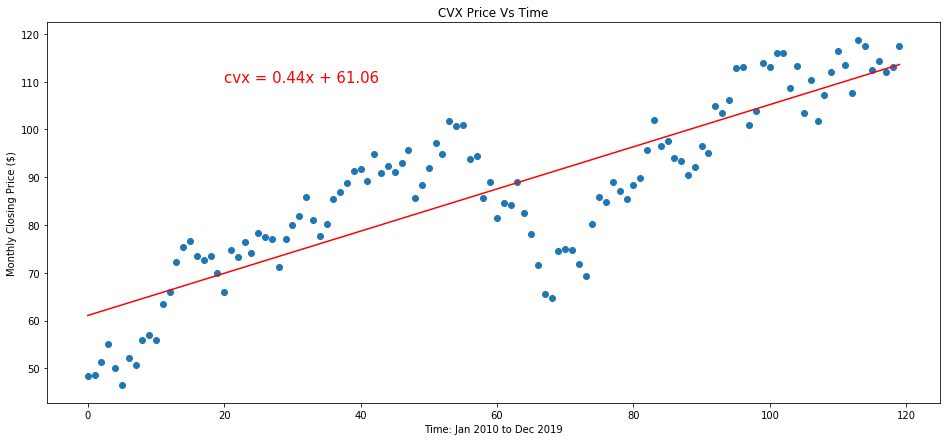

In [151]:
#CVX Regression 
#Define x and y variables for scatter plot
x_values = cvx_reg_df["index"]
y_values = cvx_reg_df["CVX"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "cvx = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,110),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("Monthly Closing Price ($)")
plt.title("CVX Price Vs Time")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/CVX_ScatterPlot.png")
plt.show

In [152]:
CVX_Jan2020 = (0.44*121) + 61.06
CVX_Feb2020 = (0.44*122) + 61.06
print(f"The forcasted monthly closing price of CVX in Jan 2020 is {CVX_Jan2020}")
print(f"The forcasted monthly closing price of CVX in Feb 2020 is {CVX_Feb2020}")

The forcasted monthly closing price of CVX in Jan 2020 is 114.30000000000001
The forcasted monthly closing price of CVX in Feb 2020 is 114.74000000000001


In [153]:
#the actual closing price of CVX in Jan is 104.37
#the actual closing price of CVX in Feb is  90.93...the std of cvx price is +/-18.1

The r-squared is: 0.8344911100716595


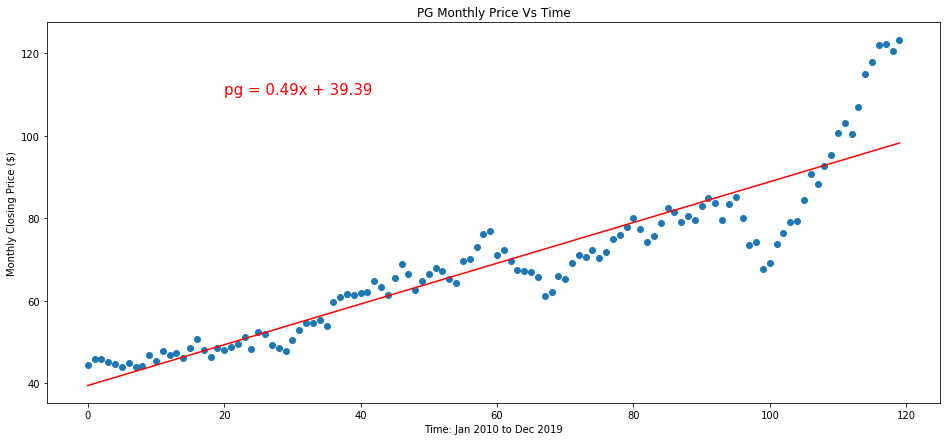

The forcasted monthly closing price of PG in Jan 2020 is 98.68
The forcasted monthly closing price of PG in Feb 2020 is 99.17


In [154]:
#PG Regression 
pg_clean_df = combined_df[['Date', 'PG']]
pg_reg_df = (pg_clean_df.drop(["Date"], axis=1)).reset_index()
#Define x and y variables for scatter plot
x_values = pg_reg_df["index"]
y_values = pg_reg_df["PG"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "pg = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,110),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("Monthly Closing Price ($)")
plt.title("PG Monthly Price Vs Time")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/PG_ScatterPlot.png")
plt.show()
PG_Jan2020 = (0.49*121) + 39.39
PG_Feb2020 = (0.49*122) + 39.39
print(f"The forcasted monthly closing price of PG in Jan 2020 is {PG_Jan2020}")
print(f"The forcasted monthly closing price of PG in Feb 2020 is {PG_Feb2020}")
#the actual closing price of PG in Jan is 123.06
#the actual closing price of PG in Feb is  112.48...
#forecasted price for Jan is outside of std 18.83, while Feb is within

The r-squared is: 0.7847576500695972


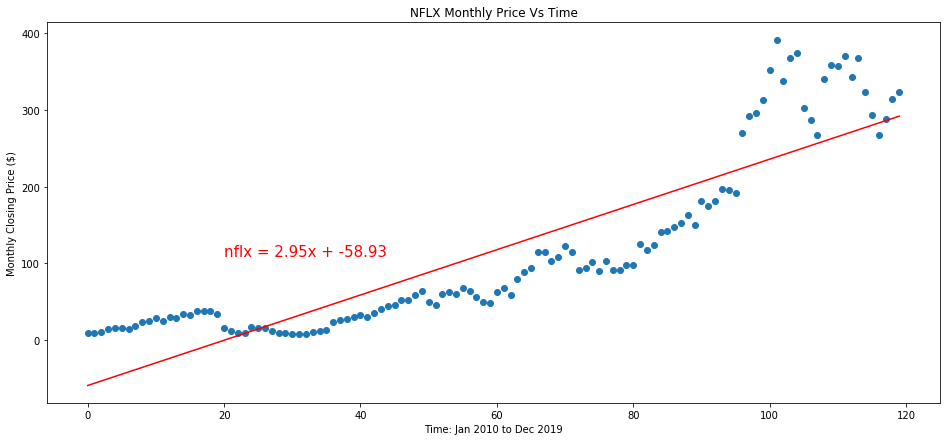

The forcasted monthly closing price of PG in Jan 2020 is 298.02000000000004
The forcasted monthly closing price of PG in Feb 2020 is 300.97


In [155]:
#NFLX Regression 
nflx_clean_df = combined_df[['Date', 'NFLX']]
nflx_reg_df = (nflx_clean_df.drop(["Date"], axis=1)).reset_index()
#Define x and y variables for scatter plot
x_values = nflx_reg_df["index"]
y_values = nflx_reg_df["NFLX"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "nflx = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,110),fontsize=15,color="red")
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("Monthly Closing Price ($)")
plt.title("NFLX Monthly Price Vs Time")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/NFLX_ScatterPlot.png")
plt.show()
NFLX_Jan2020 = (2.95*121) + (-58.93)
NFLX_Feb2020 = (2.95*122) + (-58.93)
print(f"The forcasted monthly closing price of PG in Jan 2020 is {NFLX_Jan2020}")
print(f"The forcasted monthly closing price of PG in Feb 2020 is {NFLX_Feb2020}")
#the actual closing price of PG in Jan is 123.06
#the actual closing price of PG in Feb is  112.48...
#forecasted price for Jan is outside of std 18.83, while Feb is within

In [156]:
# Create a function for f_regression
def f_regression(x_values,y_values,i,j):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,6))
    a= plt.scatter(x_values,y_values)
    b= plt.plot(x_values,regress_values,"r-")
    c= print(f"The r-squared is: {rvalue**2}")
    d= plt.annotate(line_eq, (i,j),fontsize=15,color="red")
    return (a,b,c,d)

In [157]:
combined_df

,Date,AAL,BAC,DAL,S&P500,WFC,JNJ,KO,MCD,PFE,...,WMT,TMUS,COST,NFLX,DIS,CVX,XOM,CL,PG,PEP
0,2010-01-01,5.005957,13.460909,10.863926,1073.869995,21.231312,45.894260,18.183428,45.350845,12.654274,...,41.107609,9.155951,44.383762,8.892858,25.738926,48.390926,45.100105,28.585510,44.368778,43.419220
1,2010-02-01,6.910295,14.773309,11.476853,1104.489990,20.417307,45.996483,17.670601,46.382374,11.901525,...,41.599998,10.034142,47.119598,9.435715,27.210964,48.511700,45.499088,29.957729,45.943375,45.494766
2,2010-03-01,6.929150,15.828542,12.960317,1169.430054,23.280611,47.966923,18.434809,48.879177,11.740099,...,42.777157,11.514055,46.287605,10.534286,30.407646,51.367226,47.190937,30.795710,45.936111,48.182087
3,2010-04-01,6.665183,15.820416,10.730680,1186.689941,24.769310,47.304802,18.210958,51.714325,11.445740,...,41.501411,12.408509,45.799232,14.128572,32.088741,55.167446,47.747517,30.376711,45.130230,47.834911
4,2010-05-01,8.324407,13.965980,12.063131,1089.410034,21.462746,42.890663,17.512501,48.989056,10.425756,...,39.118404,14.620247,45.155804,15.878572,29.109810,50.039509,42.597256,28.563391,44.694584,46.125996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,2019-08-01,26.036852,26.822077,57.039650,2926.459961,44.234646,124.861420,53.279835,212.684952,34.189899,...,112.200409,78.050003,292.186859,293.750000,136.442535,112.402039,64.633873,72.796333,117.974602,132.911026
116,2019-09-01,26.783880,28.440565,56.783333,2976.739990,48.449970,126.796684,52.699020,210.611786,34.878647,...,117.114395,78.769997,286.226624,267.619995,129.543869,114.406403,67.472893,72.168015,122.046753,133.270691
117,2019-10-01,29.852554,30.688997,54.299065,3037.560059,49.593021,129.403564,53.074566,192.945541,37.247250,...,115.713135,82.660004,295.167816,287.410004,129.146255,112.033386,64.567955,67.347649,122.174316,134.260178
118,2019-11-01,28.541664,32.700905,56.917168,3140.979980,52.311367,134.744766,52.070221,190.767914,37.392860,...,117.518990,78.550003,298.497253,314.660004,150.677261,112.988373,65.103073,67.003723,120.535347,132.948608


In [158]:
# Make a copy of the Returns df
ReturnsReg_df = returns_df.copy()
ReturnsReg_df = ReturnsReg_df.reset_index()
ReturnsReg_df.head()

,Date,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM,SP500
0,Feb-2010,0.38,0.10,0.06,0.00,0.05,0.06,0.06,0.00,-0.03,...,0.05,-0.06,0.04,0.05,-0.01,0.10,-0.04,0.01,0.01,0.03
1,Mar-2010,0.00,0.07,-0.02,0.06,0.03,0.13,0.12,0.04,0.04,...,0.06,-0.01,-0.00,0.06,0.04,0.15,0.14,0.03,0.04,0.06
2,Apr-2010,-0.04,-0.00,-0.01,0.07,-0.01,-0.17,0.06,-0.01,-0.01,...,-0.01,-0.03,-0.02,0.07,0.01,0.08,0.06,-0.03,0.01,0.01
3,May-2010,0.25,-0.12,-0.01,-0.09,-0.06,0.12,-0.09,-0.09,-0.04,...,-0.04,-0.09,-0.01,0.00,-0.05,0.18,-0.13,-0.06,-0.11,-0.08
4,Jun-2010,-0.02,-0.09,-0.06,-0.07,0.01,-0.13,-0.06,0.02,-0.02,...,-0.03,-0.05,-0.02,-0.06,-0.00,-0.09,-0.11,-0.04,-0.05,-0.05


In [159]:
ReturnsReg_df

,Date,AAL,BAC,COST,CVX,CL,DAL,DIS,JNJ,KO,...,PEP,PFE,PG,SBUX,T,TMUS,WFC,WMT,XOM,SP500
0,Feb-2010,0.38,0.10,0.06,0.00,0.05,0.06,0.06,0.00,-0.03,...,0.05,-0.06,0.04,0.05,-0.01,0.10,-0.04,0.01,0.01,0.03
1,Mar-2010,0.00,0.07,-0.02,0.06,0.03,0.13,0.12,0.04,0.04,...,0.06,-0.01,-0.00,0.06,0.04,0.15,0.14,0.03,0.04,0.06
2,Apr-2010,-0.04,-0.00,-0.01,0.07,-0.01,-0.17,0.06,-0.01,-0.01,...,-0.01,-0.03,-0.02,0.07,0.01,0.08,0.06,-0.03,0.01,0.01
3,May-2010,0.25,-0.12,-0.01,-0.09,-0.06,0.12,-0.09,-0.09,-0.04,...,-0.04,-0.09,-0.01,0.00,-0.05,0.18,-0.13,-0.06,-0.11,-0.08
4,Jun-2010,-0.02,-0.09,-0.06,-0.07,0.01,-0.13,-0.06,0.02,-0.02,...,-0.03,-0.05,-0.02,-0.06,-0.00,-0.09,-0.11,-0.04,-0.05,-0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114,Aug-2019,-0.14,-0.10,0.07,-0.04,0.04,-0.05,-0.03,-0.01,0.05,...,0.07,-0.08,0.03,0.02,0.05,-0.02,-0.04,0.04,-0.08,-0.02
115,Sep-2019,0.03,0.06,-0.02,0.02,-0.01,-0.00,-0.05,0.02,-0.01,...,0.00,0.02,0.03,-0.08,0.07,0.01,0.10,0.04,0.04,0.02
116,Oct-2019,0.11,0.08,0.03,-0.02,-0.07,-0.04,-0.00,0.02,0.01,...,0.01,0.07,0.00,-0.04,0.02,0.05,0.02,-0.01,-0.04,0.02
117,Nov-2019,-0.04,0.07,0.01,0.01,-0.01,0.05,0.17,0.04,-0.02,...,-0.01,0.00,-0.01,0.01,-0.02,-0.05,0.05,0.02,0.01,0.03


In [160]:
ReturnsReg_df.index

RangeIndex(start=0, stop=119, step=1)

The r-squared is: 0.003963662229590785
The forcasted return of CVX by end of Jan 2020 is 0.0276
The forcasted return of CVX by end of Feb 2020 is 0.0277
The forcasted return of CVX by end of Dec 2020 is 0.0287


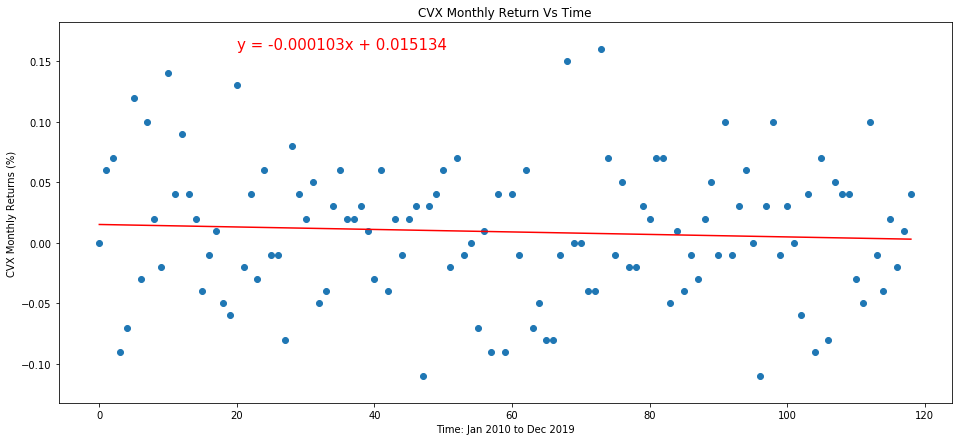

In [161]:
f_regression(ReturnsReg_df.index, ReturnsReg_df["CVX"],20,0.16)
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("CVX Monthly Returns (%)")
plt.title("CVX Monthly Return Vs Time")
# print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/CVXRet_ScatterPlot.png")
plt.show
CVXRet_Jan2020 = round((0.000103*121) + 0.015134,4)
CVXRet_Feb2020 = round((0.000103*122) + 0.015134,4)
CVXRet_Dec2020 = round((0.000103*132) + 0.015134,4)
print(f"The forcasted return of CVX by end of Jan 2020 is {CVXRet_Jan2020}")
print(f"The forcasted return of CVX by end of Feb 2020 is {CVXRet_Feb2020}")
print(f"The forcasted return of CVX by end of Dec 2020 is {CVXRet_Dec2020}")

The r-squared is: 0.005411031972097451
The forcasted return of NFLX by end of Jan 2020 is 0.0216
The forcasted return of NFLX by end of Feb 2020 is 0.0212
The forcasted return of NFLX by end of Dec 2020 is 0.0175


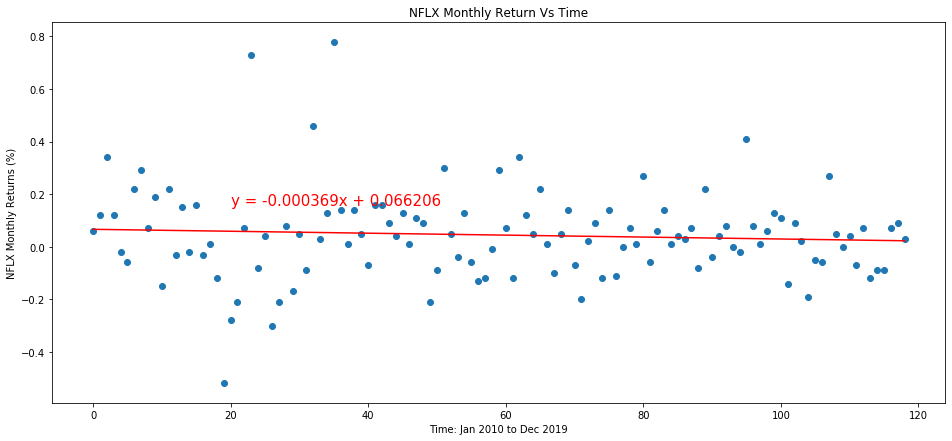

In [162]:
f_regression(ReturnsReg_df.index, ReturnsReg_df["NFLX"],20,0.16)
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("NFLX Monthly Returns (%)")
plt.title("NFLX Monthly Return Vs Time")
# print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/NFLXRet_ScatterPlot.png")
plt.show
NFLXRet_Jan2020 = round(((-0.000369)*121) + 0.066206,4)
NFLXRet_Feb2020 = round(((-0.000369)*122) + 0.066206,4)
NFLXRet_Dec2020 = round(((-0.000369)*132) + 0.066206,4)
print(f"The forcasted return of NFLX by end of Jan 2020 is {NFLXRet_Jan2020}")
print(f"The forcasted return of NFLX by end of Feb 2020 is {NFLXRet_Feb2020}")
print(f"The forcasted return of NFLX by end of Dec 2020 is {NFLXRet_Dec2020}")

The r-squared is: 0.005411031972097451


<function matplotlib.pyplot.show(*args, **kw)>

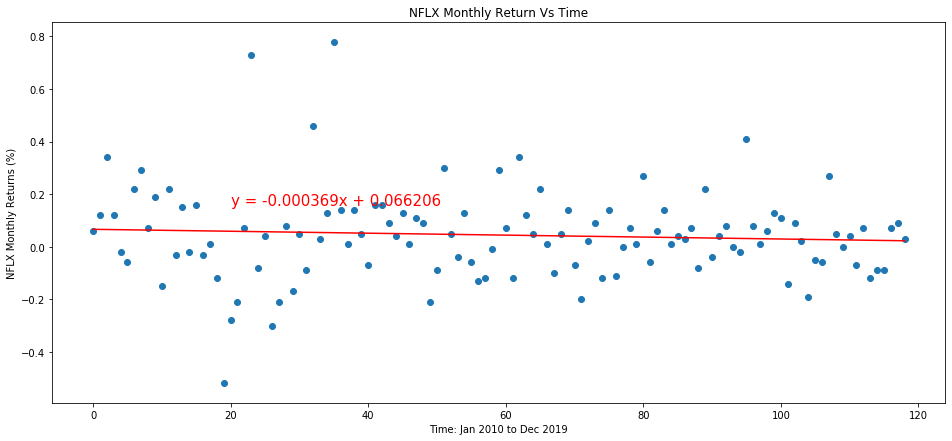

In [163]:
f_regression(ReturnsReg_df.index, ReturnsReg_df["NFLX"],20,0.16)
plt.xlabel("Time: Jan 2010 to Dec 2019")
plt.ylabel("NFLX Monthly Returns (%)")
plt.title("NFLX Monthly Return Vs Time")
# print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/NFLXRet_ScatterPlot.png")
plt.show

In [164]:
#pass the Cumreturns into a df
CumReturns_df = pd.DataFrame({"Date": dates,"NFLX": nflxcumret, "CVX":cvxcumret,"XOM":xomcumret,
                              "CL":clcumret,"PG":pgcumret,"PEP":pepcumret, "SP500":sp500cumret})
CumReturns_df

,Date,NFLX,CVX,XOM,CL,PG,PEP,SP500
0,2010-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-02-01,1.060000,1.000000,1.010000,1.050000,1.040000,1.050000,1.030000
2,2010-03-01,1.187200,1.060000,1.050400,1.081500,1.040000,1.113000,1.091800
3,2010-04-01,1.590848,1.134200,1.060904,1.070685,1.019200,1.101870,1.102718
4,2010-05-01,1.781750,1.032122,0.944205,1.006444,1.009008,1.057795,1.014501
...,...,...,...,...,...,...,...,...
115,2019-08-01,33.210098,2.324138,1.500213,2.665876,2.661130,3.128552,2.661996
116,2019-09-01,30.221189,2.370621,1.560221,2.639217,2.740964,3.128552,2.715236
117,2019-10-01,32.336673,2.323209,1.497812,2.454472,2.740964,3.159838,2.769540
118,2019-11-01,35.246973,2.346441,1.512791,2.429927,2.713555,3.128239,2.852627


In [165]:
CumRet_df= CumReturns_df.dropna()
CumRet_df.head()

,Date,NFLX,CVX,XOM,CL,PG,PEP,SP500
1,2010-02-01,1.060000,1.000000,1.010000,1.050000,1.040000,1.050000,1.030000
2,2010-03-01,1.187200,1.060000,1.050400,1.081500,1.040000,1.113000,1.091800
3,2010-04-01,1.590848,1.134200,1.060904,1.070685,1.019200,1.101870,1.102718
4,2010-05-01,1.781750,1.032122,0.944205,1.006444,1.009008,1.057795,1.014501
5,2010-06-01,1.746115,0.959873,0.896994,1.016508,0.988828,1.026061,0.963776


In [166]:
CumRet_reg_df = (CumRet_df.drop(["Date"], axis=1)).reset_index()
CumRet_reg_df

,index,NFLX,CVX,XOM,CL,PG,PEP,SP500
0,1,1.060000,1.000000,1.010000,1.050000,1.040000,1.050000,1.030000
1,2,1.187200,1.060000,1.050400,1.081500,1.040000,1.113000,1.091800
2,3,1.590848,1.134200,1.060904,1.070685,1.019200,1.101870,1.102718
3,4,1.781750,1.032122,0.944205,1.006444,1.009008,1.057795,1.014501
4,5,1.746115,0.959873,0.896994,1.016508,0.988828,1.026061,0.963776
...,...,...,...,...,...,...,...,...
114,115,33.210098,2.324138,1.500213,2.665876,2.661130,3.128552,2.661996
115,116,30.221189,2.370621,1.560221,2.639217,2.740964,3.128552,2.715236
116,117,32.336673,2.323209,1.497812,2.454472,2.740964,3.159838,2.769540
117,118,35.246973,2.346441,1.512791,2.429927,2.713555,3.128239,2.852627


In [167]:
CumRet_MulReg = pd.merge(UnEmp1_df,CumRet_reg_df, on="index")
CumRet_MulReg

,index,US,TX,NFLX,CVX,XOM,CL,PG,PEP,SP500
0,1,9.8,8.3,1.060000,1.000000,1.010000,1.050000,1.040000,1.050000,1.030000
1,2,9.9,8.3,1.187200,1.060000,1.050400,1.081500,1.040000,1.113000,1.091800
2,3,9.9,8.2,1.590848,1.134200,1.060904,1.070685,1.019200,1.101870,1.102718
3,4,9.6,8.1,1.781750,1.032122,0.944205,1.006444,1.009008,1.057795,1.014501
4,5,9.4,8.0,1.746115,0.959873,0.896994,1.016508,0.988828,1.026061,0.963776
...,...,...,...,...,...,...,...,...,...,...
114,115,3.7,3.5,33.210098,2.324138,1.500213,2.665876,2.661130,3.128552,2.661996
115,116,3.5,3.5,30.221189,2.370621,1.560221,2.639217,2.740964,3.128552,2.715236
116,117,3.6,3.5,32.336673,2.323209,1.497812,2.454472,2.740964,3.159838,2.769540
117,118,3.5,3.5,35.246973,2.346441,1.512791,2.429927,2.713555,3.128239,2.852627


In [168]:
y = CumRet_MulReg["NFLX"]
x = CumRet_MulReg[["index","US"]]
linear_regression = LinearRegression()
linear_regression.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
y_pred =linear_regression.predict(x)
#y_pred

In [170]:
Coefficients = linear_regression.coef_
Coefficients

array([ 0.94787986, 10.55184675])

In [171]:
Intercepts = linear_regression.intercept_
Intercepts

-109.16570321463988

The r-squared is: 0.6653229273436488


<function matplotlib.pyplot.show(*args, **kw)>

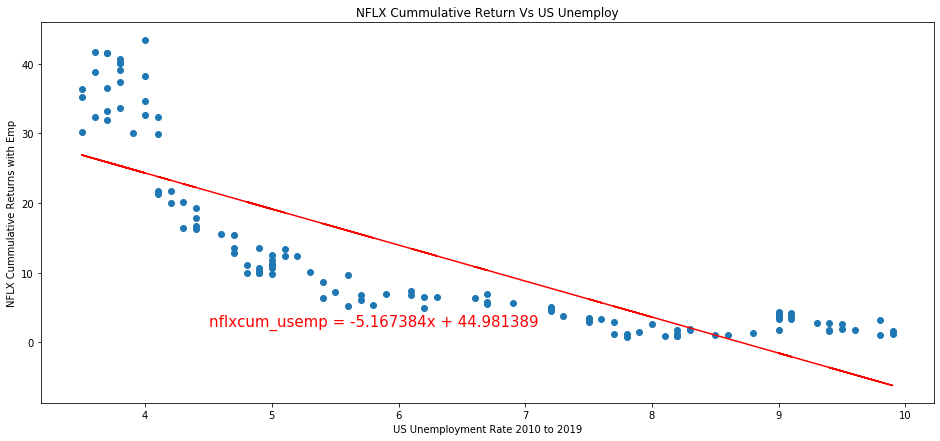

In [172]:
x_values =CumRet_MulReg["US"]
y_values = CumRet_MulReg["NFLX"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "nflxcum_usemp = " + str(round(slope,6)) + "x + " + str(round(intercept,6))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (4.5,2.4),fontsize=15,color="red")
plt.xlabel("US Unemployment Rate 2010 to 2019")
plt.ylabel("NFLX Cummulative Returns with Emp")
plt.title("NFLX Cummulative Return Vs US Unemploy")
print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/NFLXCumUSemp_ScatterPlot.png")
plt.show

In [173]:
PriOnly_df = (combined_df.drop(["Date"], axis=1)).reset_index()
PriOnly_df.head()

,index,AAL,BAC,DAL,S&P500,WFC,JNJ,KO,MCD,PFE,...,WMT,TMUS,COST,NFLX,DIS,CVX,XOM,CL,PG,PEP
0,0,5.005957,13.460909,10.863926,1073.869995,21.231312,45.894260,18.183428,45.350845,12.654274,...,41.107609,9.155951,44.383762,8.892858,25.738926,48.390926,45.100105,28.585510,44.368778,43.419220
1,1,6.910295,14.773309,11.476853,1104.489990,20.417307,45.996483,17.670601,46.382374,11.901525,...,41.599998,10.034142,47.119598,9.435715,27.210964,48.511700,45.499088,29.957729,45.943375,45.494766
2,2,6.929150,15.828542,12.960317,1169.430054,23.280611,47.966923,18.434809,48.879177,11.740099,...,42.777157,11.514055,46.287605,10.534286,30.407646,51.367226,47.190937,30.795710,45.936111,48.182087
3,3,6.665183,15.820416,10.730680,1186.689941,24.769310,47.304802,18.210958,51.714325,11.445740,...,41.501411,12.408509,45.799232,14.128572,32.088741,55.167446,47.747517,30.376711,45.130230,47.834911
4,4,8.324407,13.965980,12.063131,1089.410034,21.462746,42.890663,17.512501,48.989056,10.425756,...,39.118404,14.620247,45.155804,15.878572,29.109810,50.039509,42.597256,28.563391,44.694584,46.125996


In [174]:
Unemp_df["index"]=Unemp_df.index
Unemp_df = Unemp_df[["index","US","TX"]]
Unemp_df

,index,US,TX
0,0,9.8,8.3
1,1,9.8,8.3
2,2,9.9,8.3
3,3,9.9,8.2
4,4,9.6,8.1
...,...,...,...
115,115,3.7,3.5
116,116,3.5,3.5
117,117,3.6,3.5
118,118,3.5,3.5


In [175]:
PriAndUnem_df = pd.merge(Unemp_df,PriOnly_df, on="index")

In [176]:
PriAndUnem_df= PriAndUnem_df.rename(columns={"index":"Time","US":"US_Unemp","TX":"TX_Unemp"})
PriAndUnem_df

,Time,US_Unemp,TX_Unemp,AAL,BAC,DAL,S&P500,WFC,JNJ,KO,...,WMT,TMUS,COST,NFLX,DIS,CVX,XOM,CL,PG,PEP
0,0,9.8,8.3,5.005957,13.460909,10.863926,1073.869995,21.231312,45.894260,18.183428,...,41.107609,9.155951,44.383762,8.892858,25.738926,48.390926,45.100105,28.585510,44.368778,43.419220
1,1,9.8,8.3,6.910295,14.773309,11.476853,1104.489990,20.417307,45.996483,17.670601,...,41.599998,10.034142,47.119598,9.435715,27.210964,48.511700,45.499088,29.957729,45.943375,45.494766
2,2,9.9,8.3,6.929150,15.828542,12.960317,1169.430054,23.280611,47.966923,18.434809,...,42.777157,11.514055,46.287605,10.534286,30.407646,51.367226,47.190937,30.795710,45.936111,48.182087
3,3,9.9,8.2,6.665183,15.820416,10.730680,1186.689941,24.769310,47.304802,18.210958,...,41.501411,12.408509,45.799232,14.128572,32.088741,55.167446,47.747517,30.376711,45.130230,47.834911
4,4,9.6,8.1,8.324407,13.965980,12.063131,1089.410034,21.462746,42.890663,17.512501,...,39.118404,14.620247,45.155804,15.878572,29.109810,50.039509,42.597256,28.563391,44.694584,46.125996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,115,3.7,3.5,26.036852,26.822077,57.039650,2926.459961,44.234646,124.861420,53.279835,...,112.200409,78.050003,292.186859,293.750000,136.442535,112.402039,64.633873,72.796333,117.974602,132.911026
116,116,3.5,3.5,26.783880,28.440565,56.783333,2976.739990,48.449970,126.796684,52.699020,...,117.114395,78.769997,286.226624,267.619995,129.543869,114.406403,67.472893,72.168015,122.046753,133.270691
117,117,3.6,3.5,29.852554,30.688997,54.299065,3037.560059,49.593021,129.403564,53.074566,...,115.713135,82.660004,295.167816,287.410004,129.146255,112.033386,64.567955,67.347649,122.174316,134.260178
118,118,3.5,3.5,28.541664,32.700905,56.917168,3140.979980,52.311367,134.744766,52.070221,...,117.518990,78.550003,298.497253,314.660004,150.677261,112.988373,65.103073,67.003723,120.535347,132.948608


In [177]:
# NFLX price vs US unemployment
nflx_price_time_usemp = LinearRegression()
nflx_price_time_usemp.fit(PriAndUnem_df[["Time", "US_Unemp"]], PriAndUnem_df["NFLX"])
print(nflx_price_time_usemp.intercept_)
print(nflx_price_time_usemp.coef_)

-945.0750550498519
[ 8.28553905 91.42047607]


The r-squared is: 0.6731346391916948


<function matplotlib.pyplot.show(*args, **kw)>

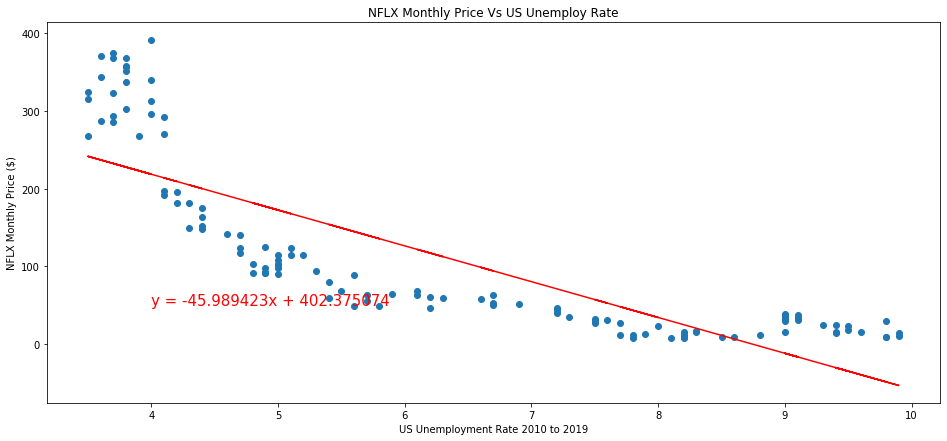

In [178]:
f_regression(PriAndUnem_df["US_Unemp"], PriAndUnem_df["NFLX"],4,50)
plt.xlabel("US Unemployment Rate 2010 to 2019")
plt.ylabel("NFLX Monthly Price ($)")
plt.title("NFLX Monthly Price Vs US Unemploy Rate")
# print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/NFLXPrice_USuemp_ScatterPlot.png")
plt.show

In [179]:
nflx_price_time_usemp = LinearRegression()
nflx_price_time_usemp.fit(PriAndUnem_df[["Time", "US_Unemp"]], PriAndUnem_df["NFLX"])
print(nflx_price_time_usemp.intercept_)
print(nflx_price_time_usemp.coef_)

-945.0750550498519
[ 8.28553905 91.42047607]


In [180]:
Jan = -945.075 + (8.286*121) + (91.42*0.036)
Feb = -945.075 + (8.286*122) + (91.42*0.035)

In [181]:
print(f"{Jan}")
print(f"{Feb}")

60.82211999999995
69.0166999999999


In [182]:
# CVS price vs US unemployment
cvx_price_time_usemp = LinearRegression()
cvx_price_time_usemp.fit(PriAndUnem_df[["Time", "US_Unemp"]], PriAndUnem_df["CVX"])
print(cvx_price_time_usemp.intercept_)
print(cvx_price_time_usemp.coef_)

-9.567894331153
[0.86705591 7.28598621]


The r-squared is: 0.6553337700976753


<function matplotlib.pyplot.show(*args, **kw)>

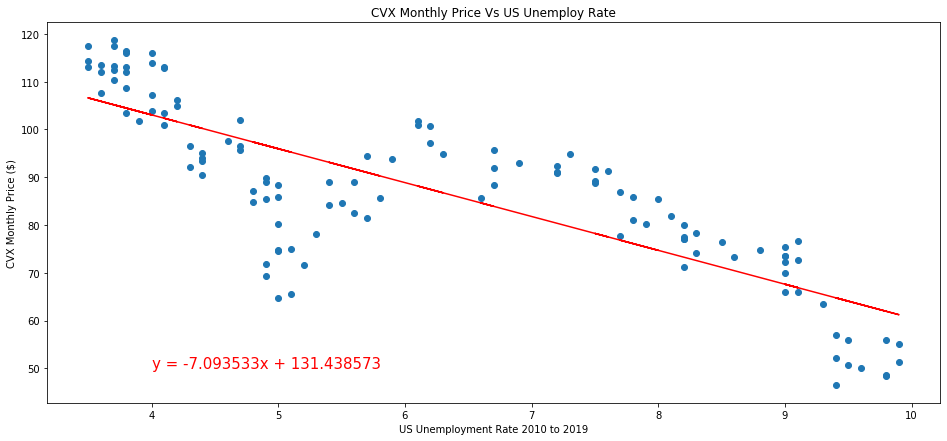

In [183]:
f_regression(PriAndUnem_df["US_Unemp"], PriAndUnem_df["CVX"],4,50)
plt.xlabel("US Unemployment Rate 2010 to 2019")
plt.ylabel("CVX Monthly Price ($)")
plt.title("CVX Monthly Price Vs US Unemploy Rate")
# print(f"The r-squared is: {rvalue**2}")
plt.savefig("Images/CVXPrice_USuemp_ScatterPlot.png")
plt.show

In [184]:
cvx_price_time_usemp = LinearRegression()
cvx_price_time_usemp.fit(PriAndUnem_df[["Time", "US_Unemp"]], PriAndUnem_df["CVX"])
print(cvx_price_time_usemp.intercept_)
print(cvx_price_time_usemp.coef_)

-9.567894331153
[0.86705591 7.28598621]


In [185]:
Jan = -9.568 + (0.867*121) + (7.286*0.036)
Feb = -9.568 + (0.867*122) + (7.286*0.035)

In [186]:
print(f"{Jan}")
print(f"{Feb}")

95.601296
96.46101
